In [1]:
import os,glob
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole

## get the number of NPs and the number of synthetic compounds

In [2]:
npInputDir = '/home/ychen/projects/nps_ringsys/20210618_preprocessing/refinedCoconut/ringSystems_stereoID'
csv_files = glob.glob(os.path.join(npInputDir, "*.csv"))
frames = []
for f in csv_files:
    df = pd.read_csv(f)
    frames.append(df)
npDF = pd.concat(frames)

In [3]:
nNPs_noStereo = len(set(npDF.MoleculeConID))

In [4]:
nNPs_noStereo

230913

In [5]:
idSet = set()
for i in list(npDF.mol_stereoIDs):
    if '[' in i:
        ids = i.replace('[','').replace(']','').replace("'","").replace(' ','')
        id_list = ids.split(',')
        for item in id_list:
            idSet.add(item)
    else:
        idSet.add(i)

In [6]:
nNPs_Stereo = len(idSet)
nNPs_Stereo

253384

In [7]:
#the no ring part of molecules
npInputDir_noRing = '/data/local/ringsys/202111_molecules_noRing/refinedCoconut/smilesNoRing_ids'
csv_files = glob.glob(os.path.join(npInputDir_noRing, "*.csv"))
frames = []
for f in csv_files:
    df = pd.read_csv(f)
    frames.append(df)
npDF_noRing = pd.concat(frames)

In [8]:
nNPs_noStereo = len(set(npDF.MoleculeConID)) + len(set(npDF_noRing.conID))
# nNPs_noStereo = 246320
nNPs_noStereo

246320

In [9]:
idSet_noRing = set()
for i in list(npDF_noRing.mol_stereoIDs):
    if '[' in i:
        ids = i.replace('[','').replace(']','').replace("'","").replace(' ','')
        id_list = ids.split(',')
        for item in id_list:
            idSet_noRing.add(item)
    else:
        idSet_noRing.add(i)

In [10]:
nNPs_Stereo = len(idSet) + len(idSet_noRing)
nNPs_Stereo

269226

In [11]:
zincInputDir = '/home/ychen/projects/nps_ringsys/20210618_preprocessing/zinc/ringSystems_stereoID'
csv_files = glob.glob(os.path.join(zincInputDir, "*.csv"))
frames = []
for f in csv_files:
    df = pd.read_csv(f)
    frames.append(df)
zincDF = pd.concat(frames)

In [12]:
nSCs_noStereo = len(set(zincDF.MoleculeConID))
nSCs_noStereo

6277409

In [13]:
zinc_idSet = set()
for i in list(zincDF.mol_stereoIDs):
    if '[' in i:
        ids = i.replace('[','').replace(']','').replace("'","").replace(' ','')
        id_list = ids.split(',')
        for item in id_list:
            zinc_idSet.add(item)
    else:
        zinc_idSet.add(i)

In [14]:
nSCs_Stereo = len(zinc_idSet)
nSCs_Stereo

8741511

In [15]:
#the no ring part of molecules
zincInputDir_noRing = '/data/local/ringsys/202111_molecules_noRing/zinc/smilesNoRing_ids'
csv_files = glob.glob(os.path.join(zincInputDir_noRing, "*.csv"))
frames = []
for f in csv_files:
    df = pd.read_csv(f)
    frames.append(df)
zincDF_noRing = pd.concat(frames)

In [16]:
nSCs_noStereo = len(set(zincDF.MoleculeConID)) + len(set(zincDF_noRing.conID))
nSCs_noStereo

6312695

In [17]:
zinc_idSet_noRing = set()
for i in list(zincDF_noRing.mol_stereoIDs):
    if '[' in i:
        ids = i.replace('[','').replace(']','').replace("'","").replace(' ','')
        id_list = ids.split(',')
        for item in id_list:
            zinc_idSet_noRing.add(item)
    else:
        zinc_idSet_noRing.add(i)

In [18]:
nSCs_Stereo = len(zinc_idSet) + len(zinc_idSet_noRing)
nSCs_Stereo

8790153

In [19]:
nNPs_noStereo,nNPs_Stereo,nSCs_noStereo,nSCs_Stereo

(246320, 269226, 6312695, 8790153)

In [20]:
resultsFolder = '/data/local/ringsys/20211202_analysis/'

In [21]:
npRingsFolder = '/home/ychen/projects/nps_ringsys/20210618_preprocessing/refinedCoconut/uniqueRingSystems/'
zincRingsFolder = '/home/ychen/projects/nps_ringsys/20210618_preprocessing/zinc/uniqueRingSystems/'

## when don't consider stereochemistry

In [22]:
npRings_noStereo = pd.read_csv(npRingsFolder+'np_uniqueRingSystems_noStereo.txt',sep='\t')

In [23]:
npRings_noStereo['pMol_conID'] = npRings_noStereo['nMol_conID'] / nNPs_noStereo
npRings_noStereo['pMol_conID'] = npRings_noStereo['pMol_conID'].map(lambda n: '{:,.2%}'.format(n))

PandasTools.AddMoleculeColumnToFrame(npRings_noStereo, 'ringSmiles_noStereo', 'ringMolecule')

RDKit ERROR: [10:18:57] Can't kekulize mol.  Unkekulized atoms: 2 3 7 8 9 10 11 12 14 15 16 17 18 19
RDKit ERROR: 


ringSmiles_noStereo  ring_conID  nMol_conID pMol_conID  \
0            c1ccccc1           4       72297     29.35%   
1            C1CCOCC1          22       44113     17.91%   
2    O=c1ccoc2ccccc12          44        8879      3.60%   
3             C1CCOC1          18        7178      2.91%   
4            C1CCCCC1          54        6616      2.69%   

                                        ringMolecule  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  
3  <img data-content="rdkit/molecule" src="data:i...  
4  <img data-content="rdkit/molecule" src="data:i...
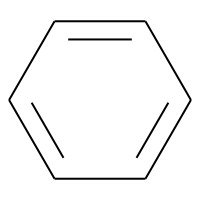
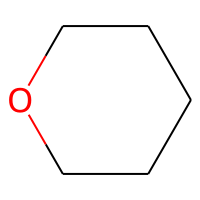
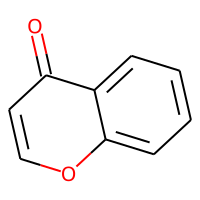
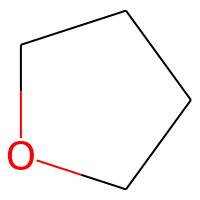
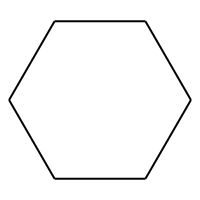

In [24]:
npRings_noStereo.head(5)

In [25]:
npRings_noStereo.dropna(inplace=True)

In [26]:
len(npRings_noStereo)

31003

In [27]:
PandasTools.WriteSDF(npRings_noStereo, resultsFolder+'npRings_noStereo.sdf', molColName='ringMolecule', idName='ring_conID', properties=list(npRings_noStereo.columns), allNumeric=False)

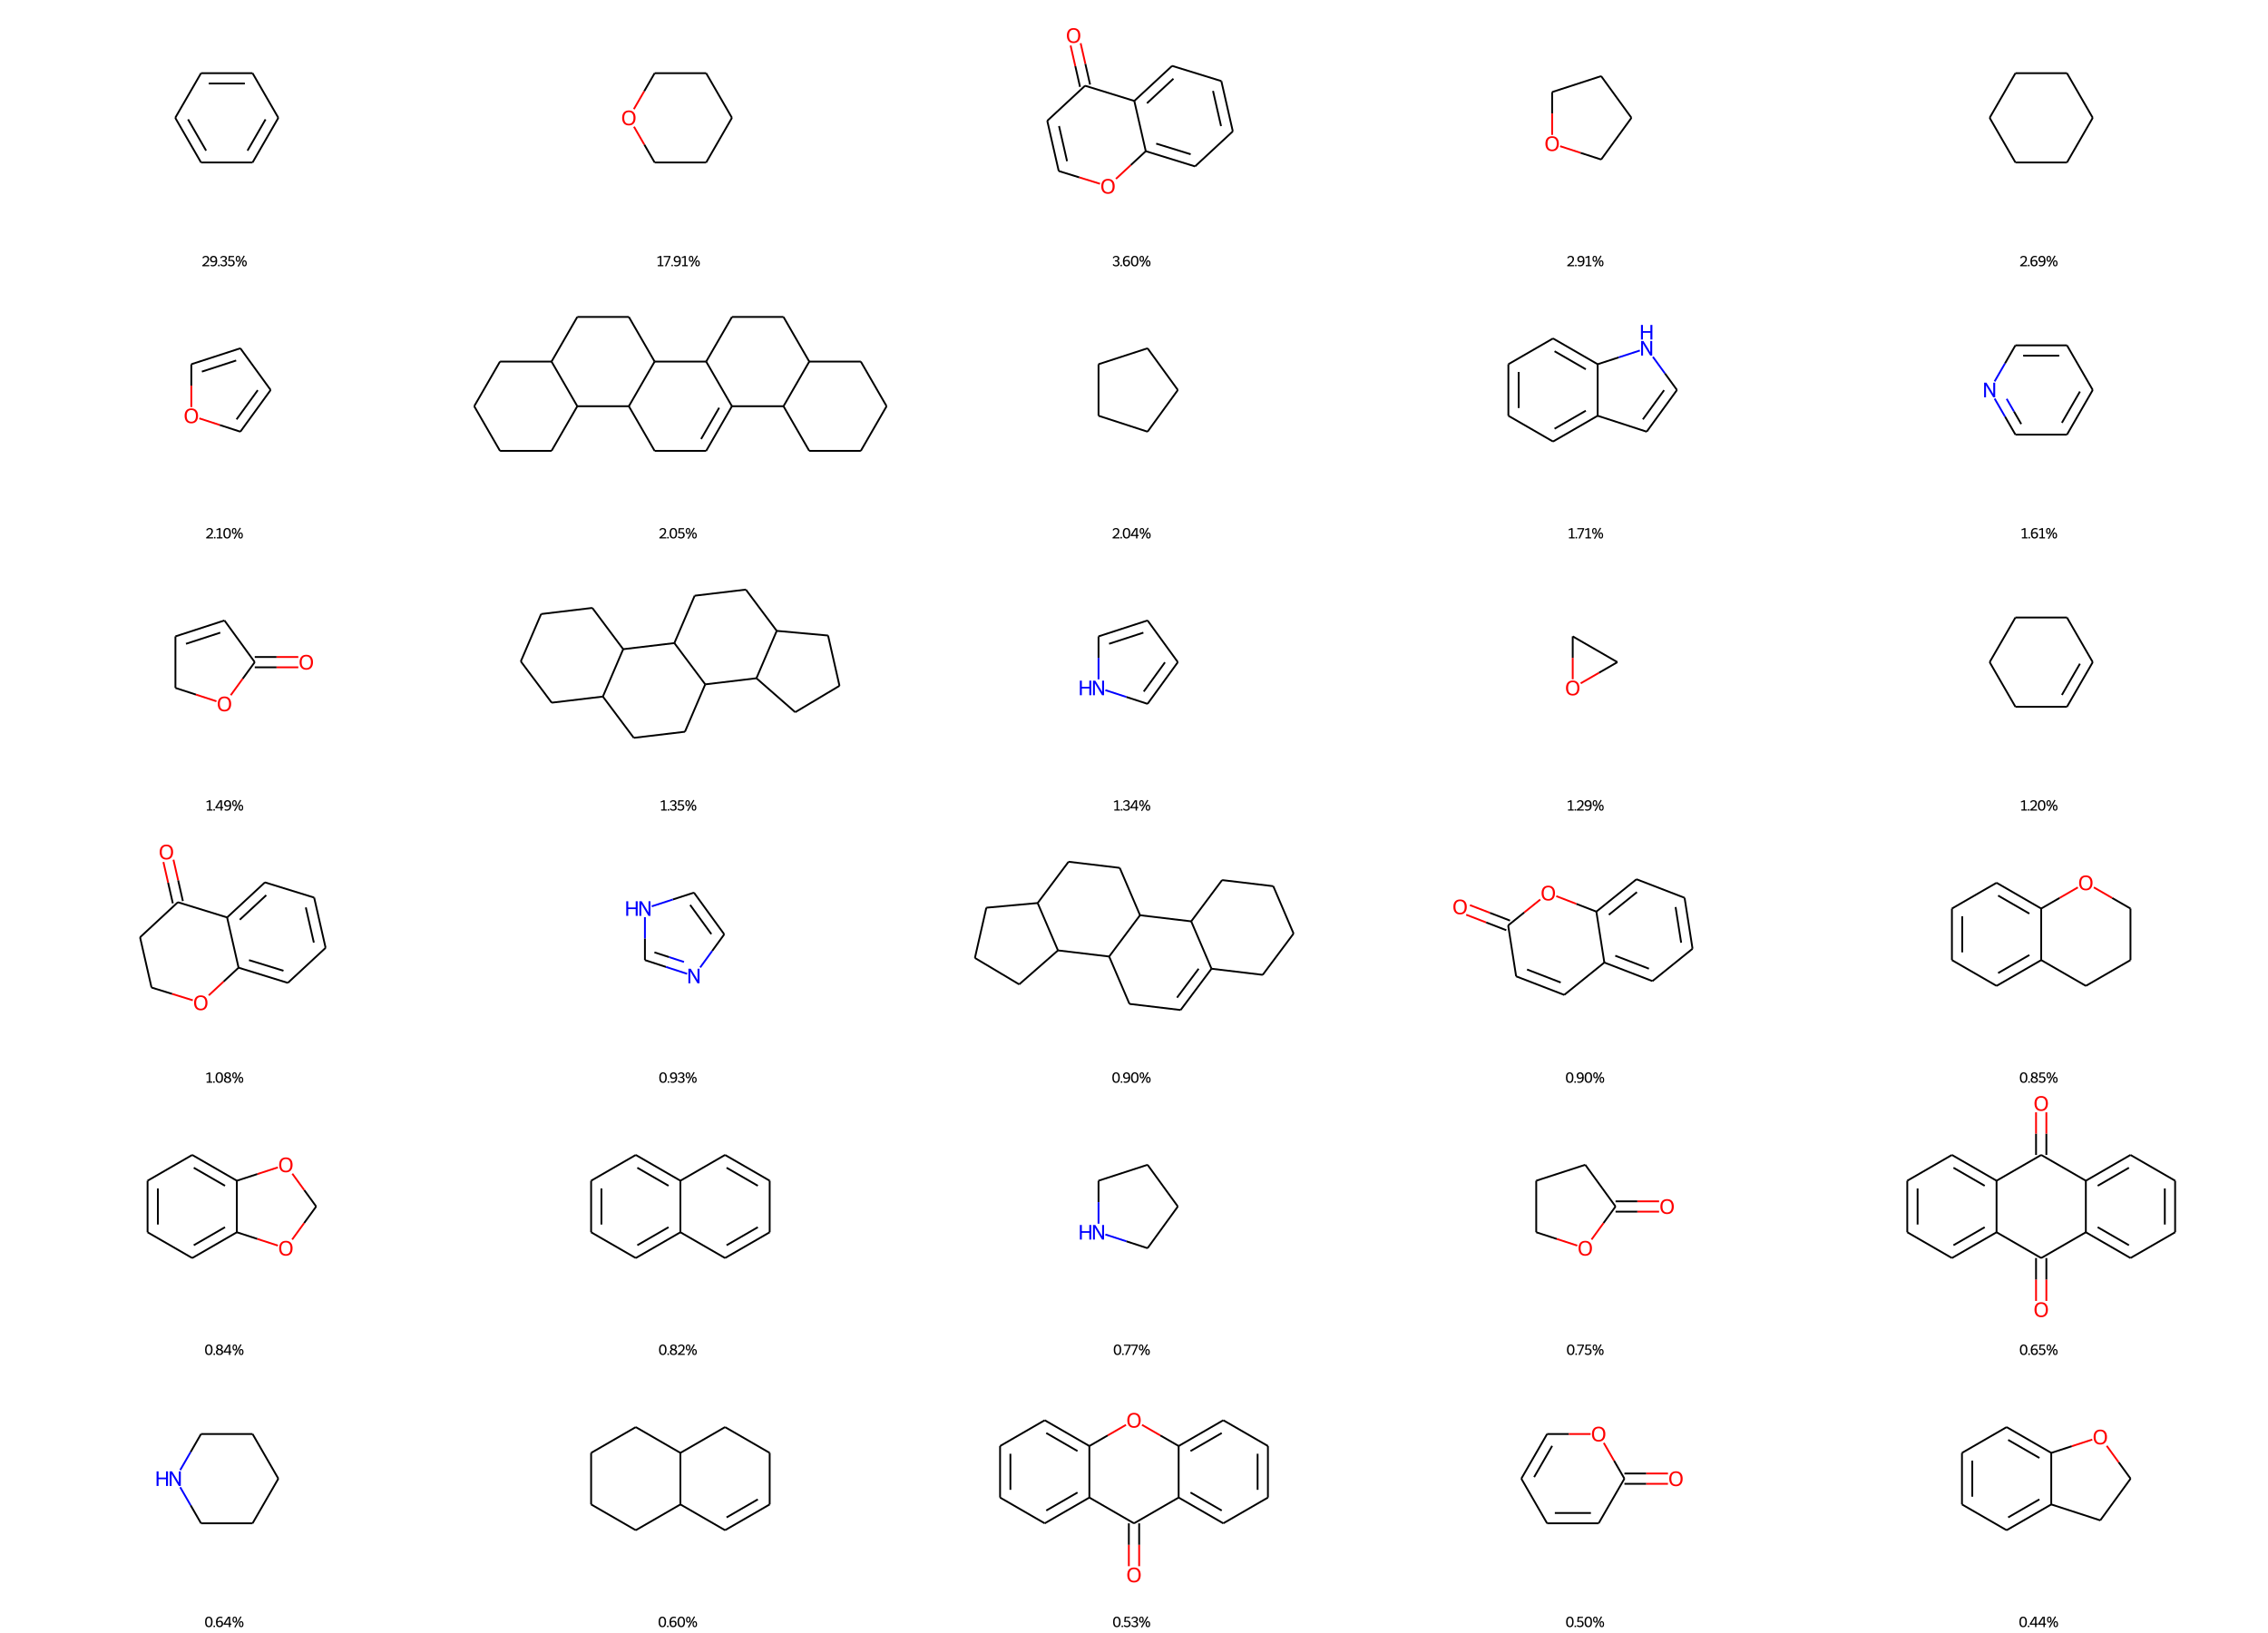

In [28]:
Draw.MolsToGridImage(list(npRings_noStereo.ringMolecule)[:30],
                     legends=[str(i) for i in list(npRings_noStereo.pMol_conID)][:30], 
                     molsPerRow=5,subImgSize=(500,300))

In [29]:
npRings_noStereo.ringSmiles_noStereo[6]

'C1=C2C3CCCCC3CCC2C2CCC3CCCCC3C2C1'

In [30]:
zincRings_noStereo = pd.read_csv(zincRingsFolder+'zinc_uniqueRingSystems_noStereo.txt',sep='\t')

In [31]:
zincRings_noStereo['pMol_conID'] = zincRings_noStereo['nMol_conID'] / nSCs_noStereo
zincRings_noStereo['pMol_conID'] = zincRings_noStereo['pMol_conID'].map(lambda n: '{:,.2%}'.format(n))

PandasTools.AddMoleculeColumnToFrame(zincRings_noStereo, 'ringSmiles_noStereo', 'ringMolecule')

In [32]:
len(zincRings_noStereo)

30265

ringSmiles_noStereo  ring_conID  nMol_conID pMol_conID  \
0            c1ccccc1           3     4770659     75.57%   
1            C1CCNCC1           4      604870      9.58%   
2            c1ccncc1           6      528381      8.37%   
3          c1cn[nH]c1          22      377206      5.98%   
4            C1CNCCN1           5      325286      5.15%   

                                        ringMolecule  
0  <img data-content="rdkit/molecule" src="data:i...  
1  <img data-content="rdkit/molecule" src="data:i...  
2  <img data-content="rdkit/molecule" src="data:i...  
3  <img data-content="rdkit/molecule" src="data:i...  
4  <img data-content="rdkit/molecule" src="data:i...
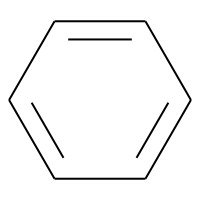
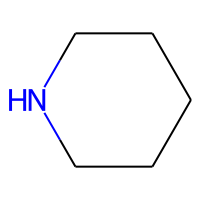
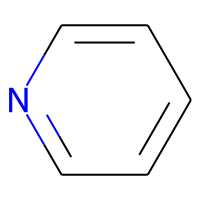
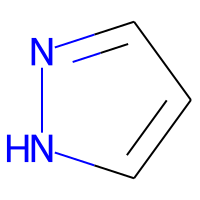
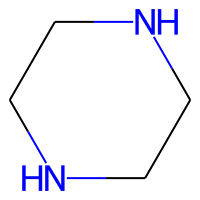

In [33]:
zincRings_noStereo.head(5)

In [33]:
PandasTools.WriteSDF(zincRings_noStereo, resultsFolder+'zincRings_noStereo.sdf', molColName='ringMolecule', idName='ring_conID', properties=list(zincRings_noStereo.columns), allNumeric=False)

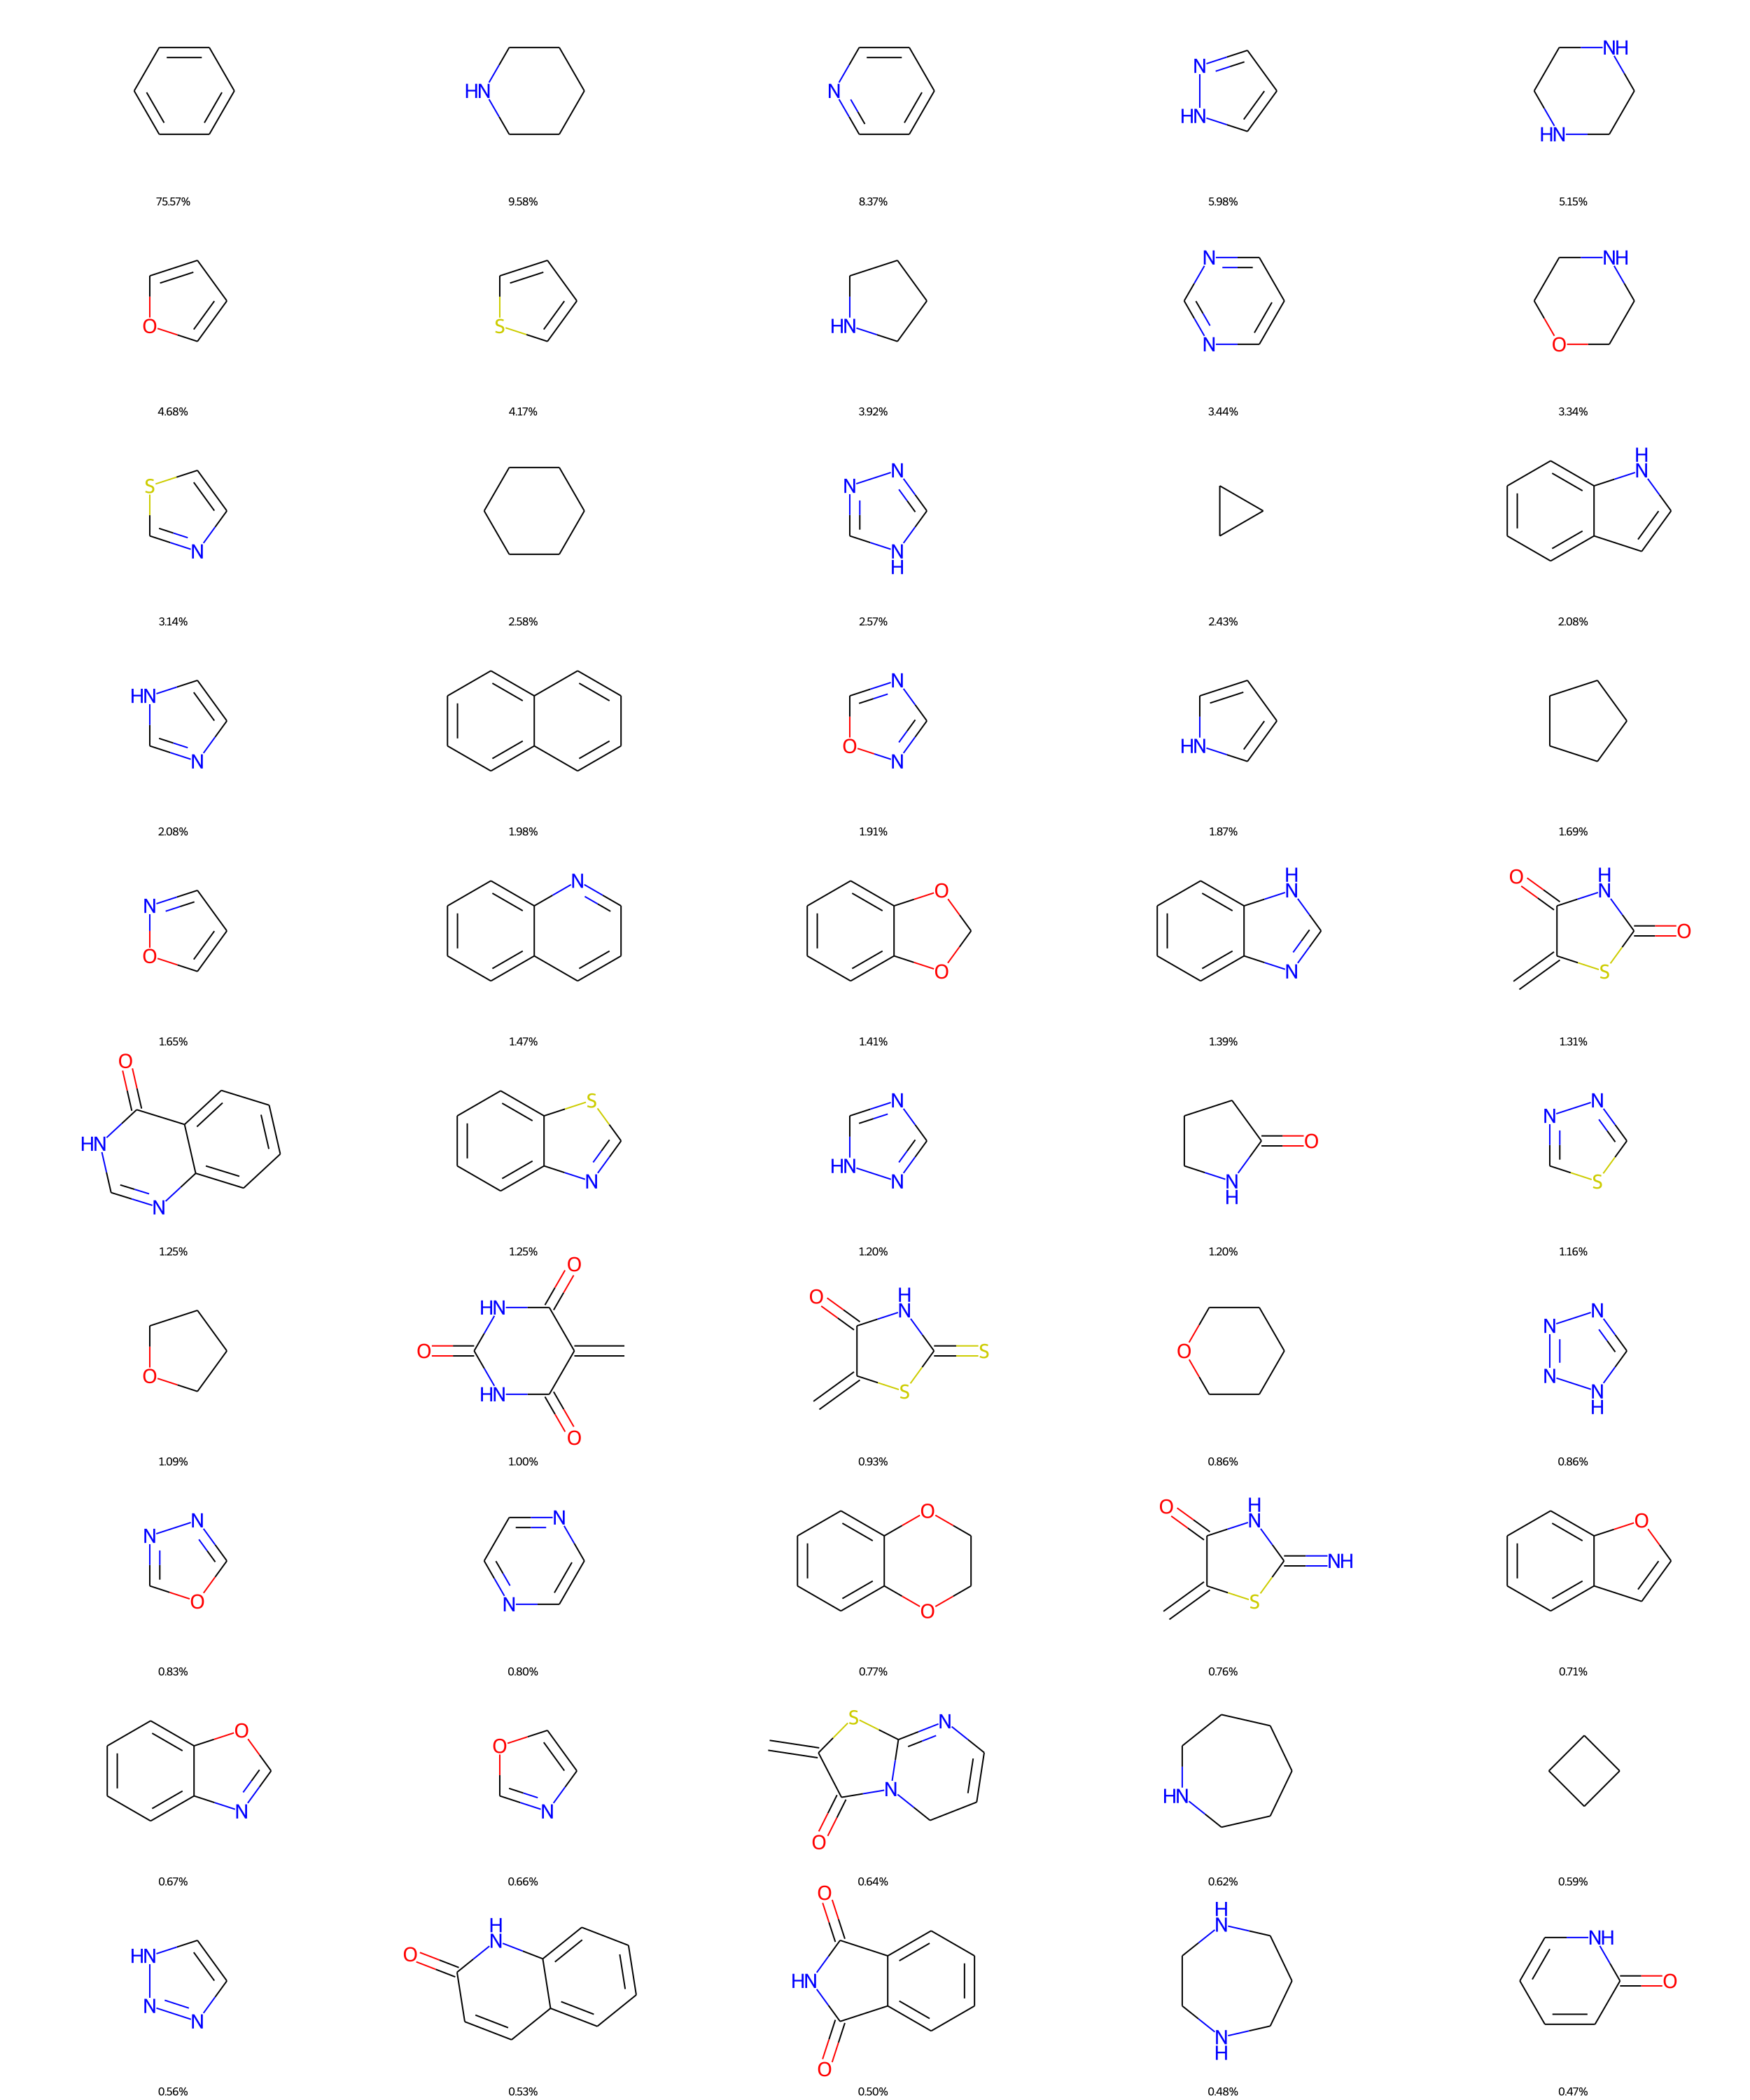

In [34]:
Draw.MolsToGridImage(list(zincRings_noStereo.ringMolecule)[:50],
                     legends=[str(i) for i in list(zincRings_noStereo.pMol_conID)][:50], 
                     molsPerRow=5,subImgSize=(500,300))

In [35]:
# overlap of NP ring systems and synthetic ring systems

In [36]:
common_top30 = set(list(zincRings_noStereo.ringSmiles_noStereo)[:30]) & set(list(npRings_noStereo.ringSmiles_noStereo)[:30])

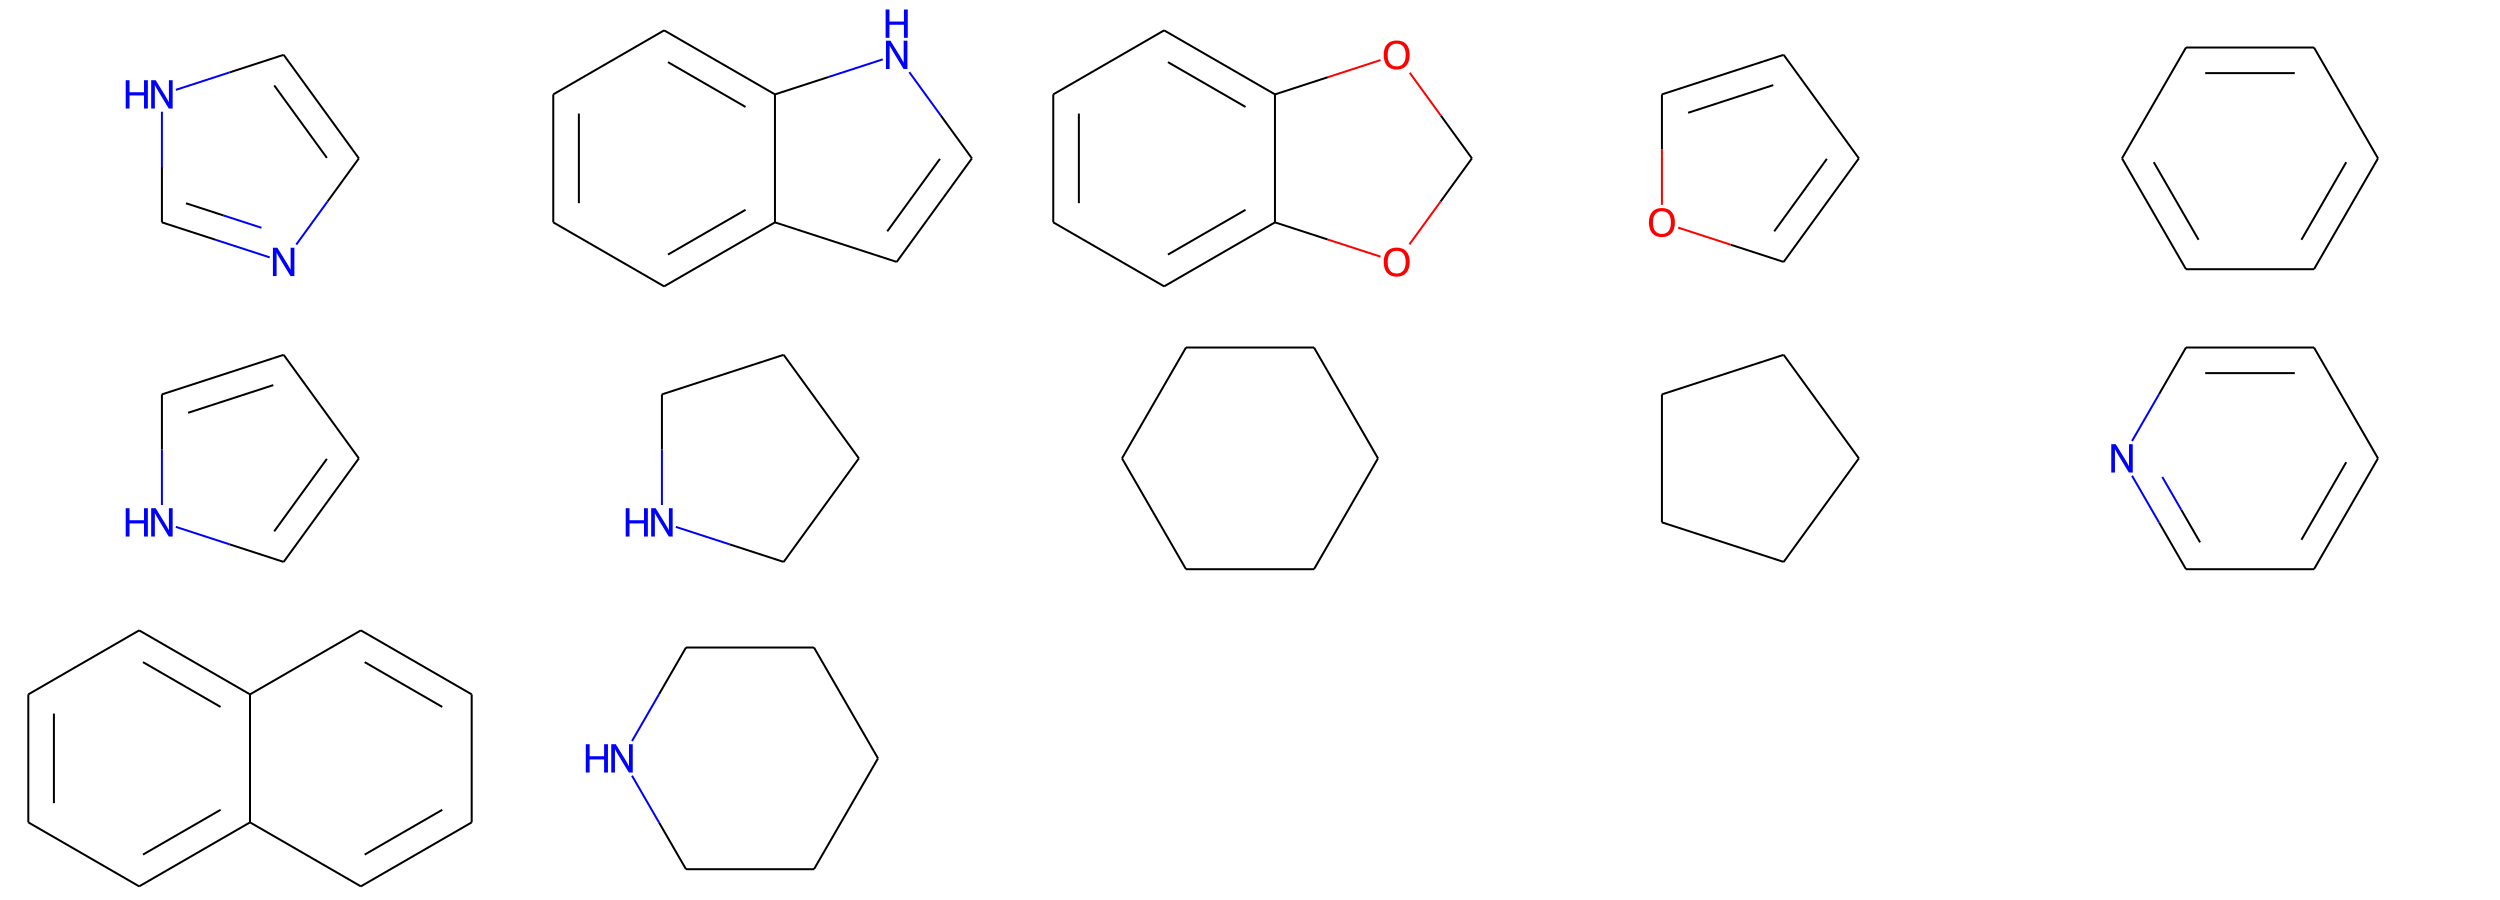

In [37]:
Draw.MolsToGridImage([Chem.MolFromSmiles(smi) for smi in common_top30], 
                     molsPerRow=5,subImgSize=(500,300))

## when considering stereochemical information

In [22]:
npRings_Stereo = pd.read_csv(npRingsFolder+'np_uniqueRingSystems_Stereo.txt',sep='\t')

In [23]:
npRings_Stereo

RingSmiles ring_stereoID  \
0                                               c1ccccc1         p1_10   
1                                               C1CCOCC1         p1_67   
2                                       O=c1ccoc2ccccc12        p1_147   
3                                                C1CCOC1         p1_63   
4                                               C1CCCCC1        p1_161   
...                                                  ...           ...   
38657  C=C1CC[C@@H]2[C@@H]1CC[C@@H]1[C@H]3CCC(=O)C[C@...        p7_218   
38658      O=C1Nc2cc3cc4c(cc3c3c5c(cc(c23)C1=O)OCO5)OCO4      p186_124   
38659                                       O=C1CNCC=CN1      p186_126   
38660                     O=C1CN=CCN=CCNC(=O)CN=CCN=CCN1      p186_127   
38661                         O=C1CCC=C[C@@H]2CCC[C@H]12      p131_131   

       nMol_stereoID  
0              77523  
1              49694  
2               9983  
3               8237  
4               6974  
...              ...  
38657              1  
38658              1  
38659              1  
38660              1  
38661              1  

[38662 rows x 3 columns]

In [24]:
npRings_Stereo['pMol_stereoID'] = npRings_Stereo['nMol_stereoID'] / nNPs_Stereo
npRings_Stereo['pMol_stereoID'] = npRings_Stereo['pMol_stereoID'].map(lambda n: '{:,.2%}'.format(n))

PandasTools.AddMoleculeColumnToFrame(npRings_Stereo, 'RingSmiles', 'ringMolecule')

In [40]:
PandasTools.WriteSDF(npRings_Stereo, resultsFolder+'npRings_Stereo.sdf', molColName='ringMolecule', idName='ring_stereoID', properties=list(npRings_Stereo.columns), allNumeric=False)

In [41]:
npRings_Stereo['rank'] = npRings_Stereo['nMol_stereoID'].astype(int).rank(method='min',ascending=False)
npRings_Stereo['rank'] = npRings_Stereo['rank'].astype(int)

In [42]:
# get the rank: pMol_stereoID as label unter each ring system
npRings_Stereo['rank_pMol_stereoID'] = npRings_Stereo['rank'].astype(str)+': '+npRings_Stereo['pMol_stereoID']

RingSmiles ring_stereoID  \
0                                            c1ccccc1         p1_10   
1                                            C1CCOCC1         p1_67   
2                                    O=c1ccoc2ccccc12        p1_147   
3                                             C1CCOC1         p1_63   
4                                            C1CCCCC1        p1_161   
5                                             c1ccoc1         p1_35   
6                                             C1CCCC1        p1_132   
7                                    c1ccc2[nH]ccc2c1        p1_162   
8                                          O=C1C=CCO1        p1_145   
9                                            c1ccncc1        p2_276   
10                                         c1cc[nH]c1        p2_146   
11                                              C1CO1         p1_36   
12                                          C1=CCCCC1         p1_62   
13                                   O=C1CCOc2ccccc21        p1_148   
14                                   c1ccc2c(c1)CCCO2         p3_10   
15                                         c1c[nH]cn1        p6_213   
16                                   O=c1ccc2ccccc2o1        p2_277   
17                                    c1ccc2c(c1)OCO2        p3_126   
18                                          O=C1CCCO1         p2_85   
19                                     c1ccc2ccccc2c1        p10_23   
20                                            C1CCNC1         p3_68   
21  C1=C2[C@@H](CC[C@H]3CCCC[C@@H]23)[C@@H]2CC[C@H...         p7_28   
22                                           C1CCNCC1        p4_344   
23                         O=C1c2ccccc2C(=O)c2ccccc21         p6_75   
24                             O=c1c2ccccc2oc2ccccc12        p5_101   
25                                         O=c1cccco1        p1_146   
26                                    c1ccc2c(c1)CCO2        p3_247   
27                                        O=C1C=CCCC1        p1_149   
28                                        O=C1C=CCCO1        p1_323   
29  C1CC[C@@H]2CC[C@H]3[C@@H]4CCC[C@H]4CC[C@@H]3[C...        p2_203   
30                                     C=C1C=CC(=O)O1         p4_12   
31                                    C1=Cc2ccccc2OC1         p5_40   
32                                   O=C1C=CC(=O)C=C1         p1_65   
33                                      c1ccc2occc2c1        p5_100   
34                                   c1ccc2c(c1)CCNC2        p2_274   
35                                          O=C1CCCN1        p4_329   
36                                              C1CC1         p3_22   
37                                   c1ncc2nc[nH]c2n1        p4_178   
38                              O=C1C=CC(=O)c2ccccc21        p3_218   
39                                         C=C1CCCCC1         p1_24   
40                                            c1cscn1        p3_213   
41  C1=C2CCCC[C@@H]2[C@H]2CC[C@@H]3CCC[C@H]3[C@@H]2C1         p1_38   
42                                  c1ccc2[o+]cccc2c1          p9_1   
43                                   c1ccc2c(c1)CCCC2         p2_90   
44                               O=c1cc[nH]c(=O)[nH]1        p6_180   
45                                         O=C1C=CCC1        p2_100   
46                              O=c1ccc2cc3ccoc3cc2o1        p1_144   
47                                           C1=CCCC1        p2_142   
48                                          C1=COCCC1        p2_154   
49                           c1ccc2c(c1)[nH]c1cnccc12        p2_275   
50                                 c1cc2c[nH]cc2[nH]1        p51_14   

    nMol_stereoID pMol_stereoID  \
0           77523        28.79%   
1           49694        18.46%   
2            9983         3.71%   
3            8237         3.06%   
4            6974         2.59%   
5            5484         2.04%   
6            5133         1.91%   
7            4429         1.65%   
8            4232         1.57%   

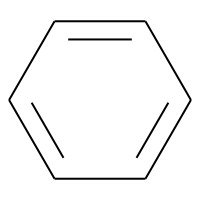
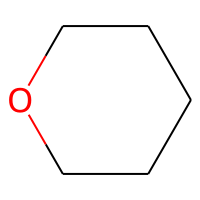
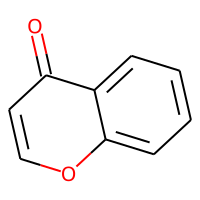
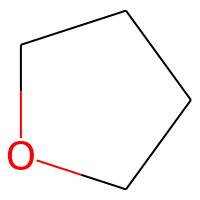
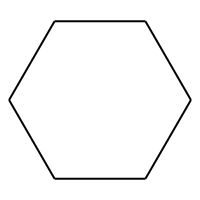
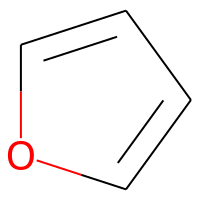
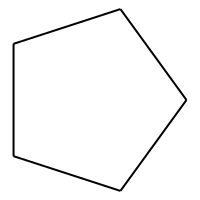
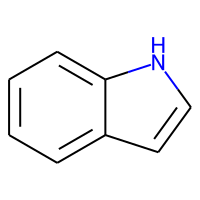
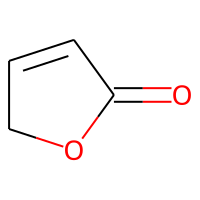
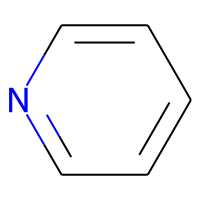
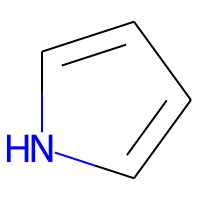
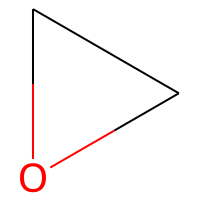
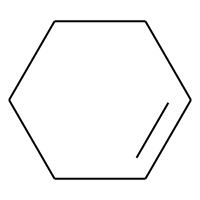
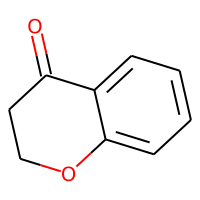
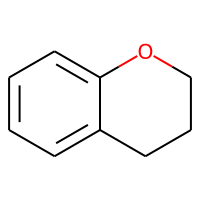
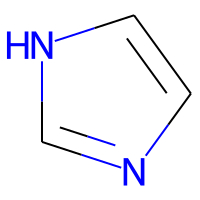
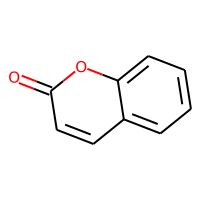
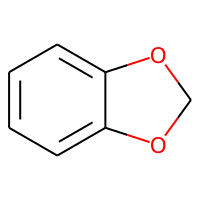
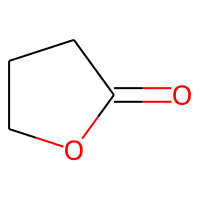
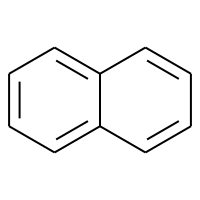
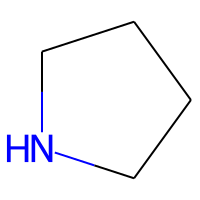
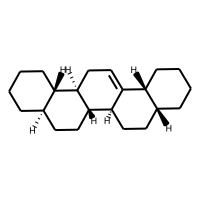
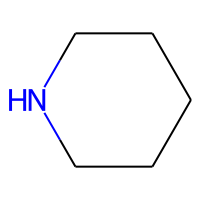
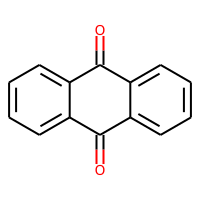
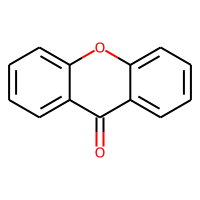
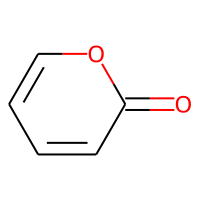
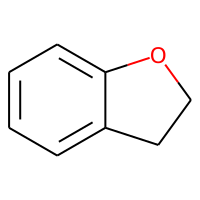
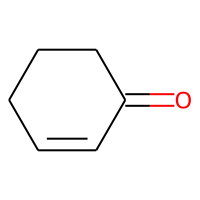
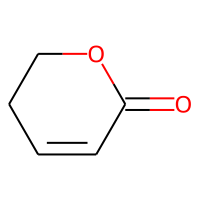
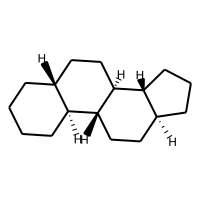
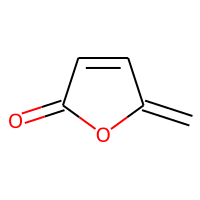
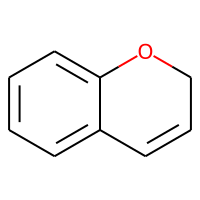
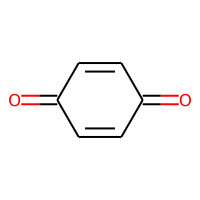
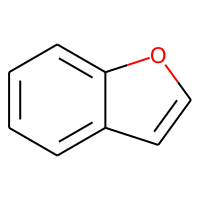
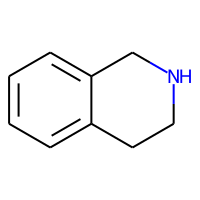
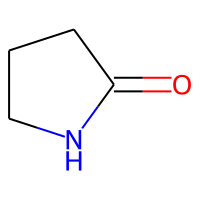
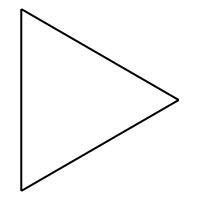
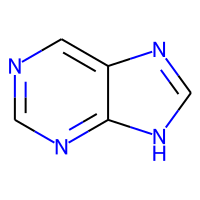
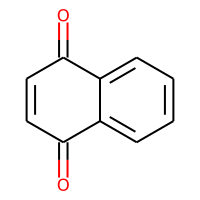
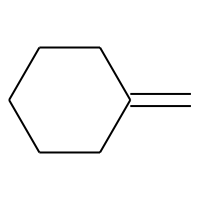
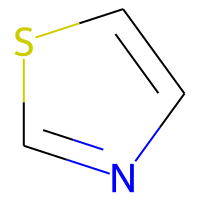
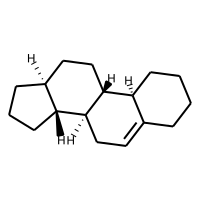
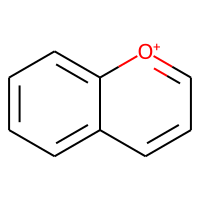
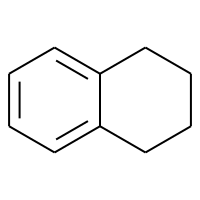
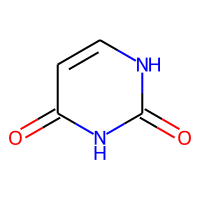
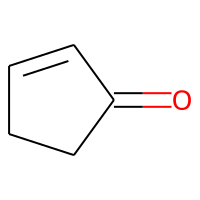
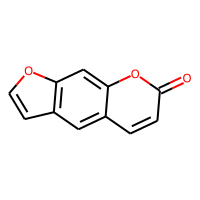
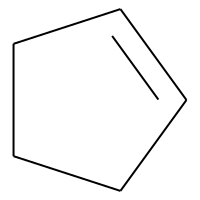
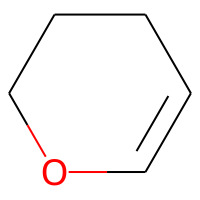
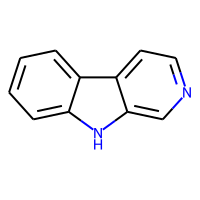
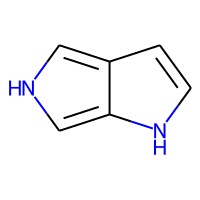

In [43]:
npRings_Stereo.head(51)

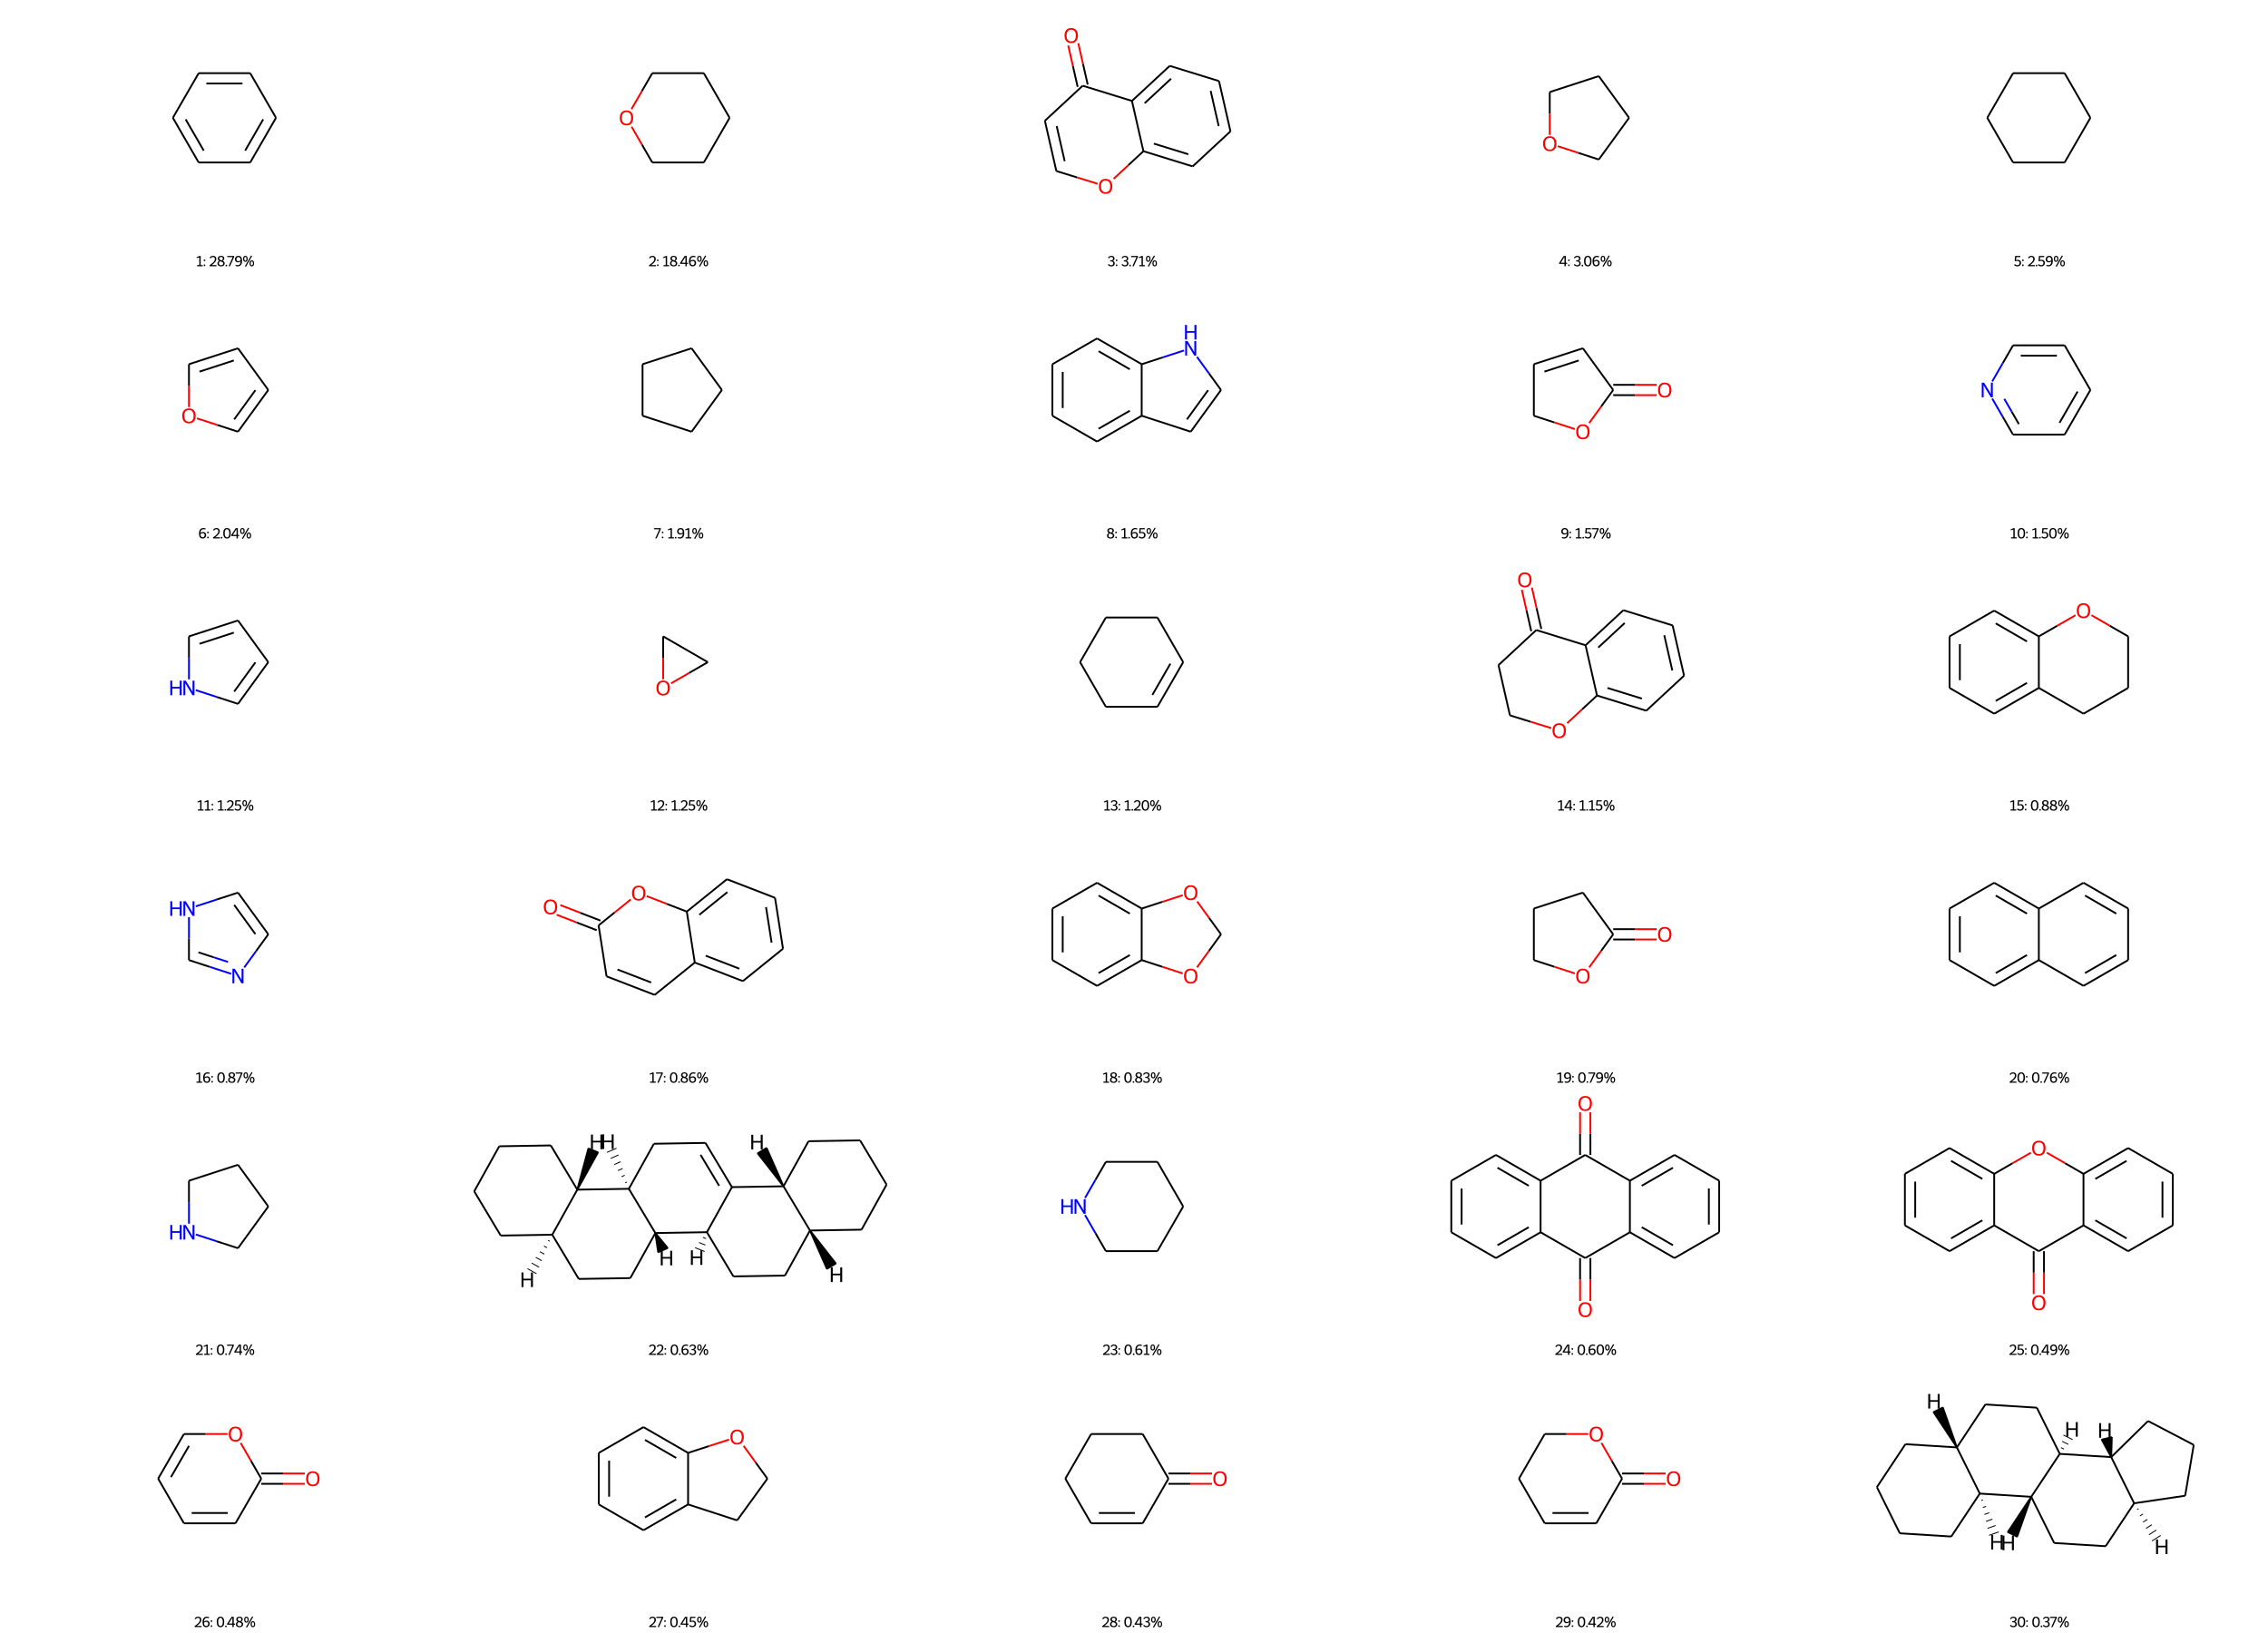

In [44]:
Draw.MolsToGridImage(list(npRings_Stereo.ringMolecule)[:30],
                     legends=[str(i) for i in list(npRings_Stereo.rank_pMol_stereoID)][:30], 
                     molsPerRow=5,subImgSize=(500,300))

In [165]:
# write down file for chemdraw
PandasTools.WriteSDF(npRings_Stereo[:30], resultsFolder+'npRings_Stereo_coorGen.sdf', molColName='ringMolecule', idName='ring_stereoID', properties=list(npRings_Stereo.columns), allNumeric=False)

In [45]:
# ranks of w/ and w/o stereochemistry

In [46]:
npRings_Stereo['ringSmiles_noStereo'] = npRings_Stereo.apply(lambda row:Chem.MolToSmiles(row.ringMolecule,isomericSmiles=False),axis=1)

In [47]:
npRings_noStereo['rank'] = npRings_noStereo['nMol_conID'].astype(int).rank(method='min',ascending=False)

In [48]:
npRings_noStereo['source'] = 'w/o stereochemistry'
npRings_Stereo['source'] = 'w/ stereochemistry'

RingSmiles ring_stereoID  \
0                                            c1ccccc1         p1_10   
1                                            C1CCOCC1         p1_67   
2                                    O=c1ccoc2ccccc12        p1_147   
3                                             C1CCOC1         p1_63   
4                                            C1CCCCC1        p1_161   
5                                             c1ccoc1         p1_35   
6                                             C1CCCC1        p1_132   
7                                    c1ccc2[nH]ccc2c1        p1_162   
8                                          O=C1C=CCO1        p1_145   
9                                            c1ccncc1        p2_276   
10                                         c1cc[nH]c1        p2_146   
11                                              C1CO1         p1_36   
12                                          C1=CCCCC1         p1_62   
13                                   O=C1CCOc2ccccc21        p1_148   
14                                   c1ccc2c(c1)CCCO2         p3_10   
15                                         c1c[nH]cn1        p6_213   
16                                   O=c1ccc2ccccc2o1        p2_277   
17                                    c1ccc2c(c1)OCO2        p3_126   
18                                          O=C1CCCO1         p2_85   
19                                     c1ccc2ccccc2c1        p10_23   
20                                            C1CCNC1         p3_68   
21  C1=C2[C@@H](CC[C@H]3CCCC[C@@H]23)[C@@H]2CC[C@H...         p7_28   
22                                           C1CCNCC1        p4_344   
23                         O=C1c2ccccc2C(=O)c2ccccc21         p6_75   
24                             O=c1c2ccccc2oc2ccccc12        p5_101   
25                                         O=c1cccco1        p1_146   
26                                    c1ccc2c(c1)CCO2        p3_247   
27                                        O=C1C=CCCC1        p1_149   
28                                        O=C1C=CCCO1        p1_323   
29  C1CC[C@@H]2CC[C@H]3[C@@H]4CCC[C@H]4CC[C@@H]3[C...        p2_203   
30                                     C=C1C=CC(=O)O1         p4_12   
31                                    C1=Cc2ccccc2OC1         p5_40   
32                                   O=C1C=CC(=O)C=C1         p1_65   
33                                      c1ccc2occc2c1        p5_100   
34                                   c1ccc2c(c1)CCNC2        p2_274   
35                                          O=C1CCCN1        p4_329   
36                                              C1CC1         p3_22   
37                                   c1ncc2nc[nH]c2n1        p4_178   
38                              O=C1C=CC(=O)c2ccccc21        p3_218   
39                                         C=C1CCCCC1         p1_24   
40                                            c1cscn1        p3_213   
41  C1=C2CCCC[C@@H]2[C@H]2CC[C@@H]3CCC[C@H]3[C@@H]2C1         p1_38   

    nMol_stereoID pMol_stereoID  \
0           77523        28.79%   
1           49694        18.46%   
2            9983         3.71%   
3            8237         3.06%   
4            6974         2.59%   
5            5484         2.04%   
6            5133         1.91%   
7            4429         1.65%   
8            4232         1.57%   
9            4031         1.50%   
10           3369         1.25%   
11           3362         1.25%   
12           3244         1.20%   
13           3085         1.15%   
14           2363         0.88%   
15           2341         0.87%   
16           2302         0.86%   
17           2247         0.83%   
18           2130         0.79%   
19           2057         0.76%   
20           2001         0.74%   
21           1687         0.63%   
22           1644         0.61%   
23           1628         0.60%   
24           1322         0.49%   
25           1302         0.48%   
26           1220         0.45%   
27       
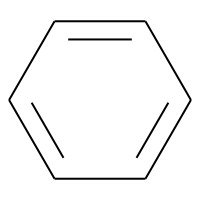
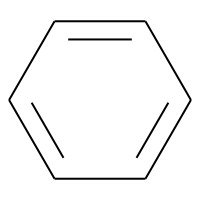
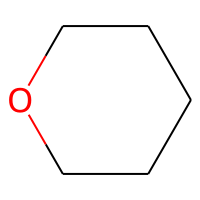
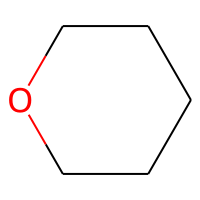
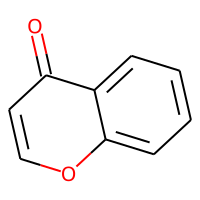
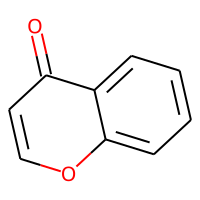
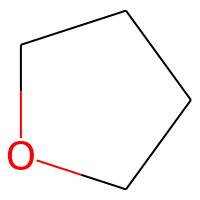
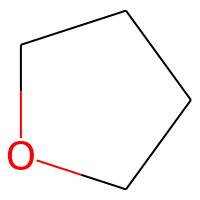
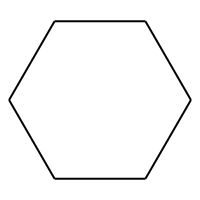
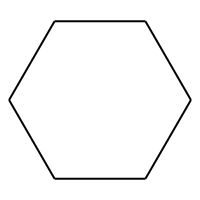
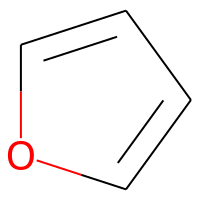
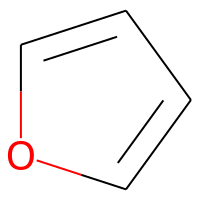
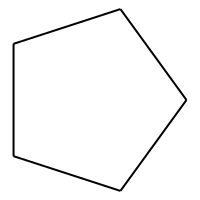
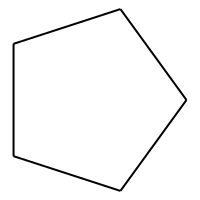
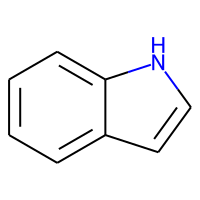
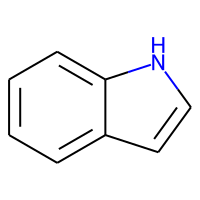
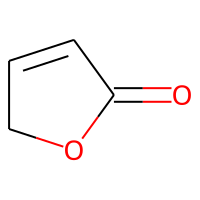
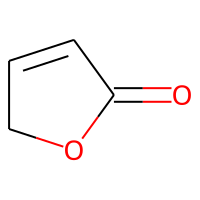
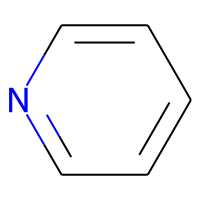
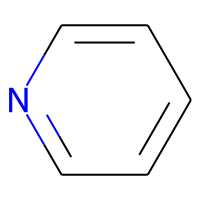
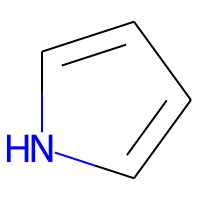
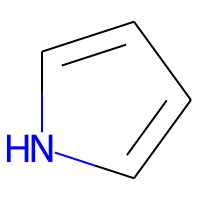
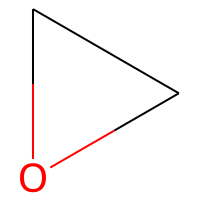
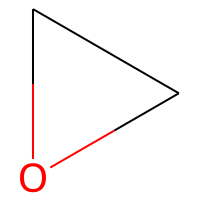
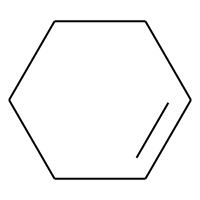
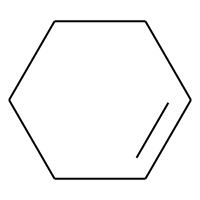
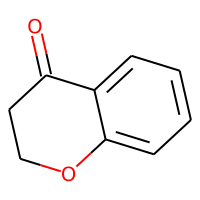
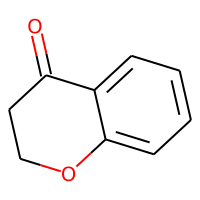
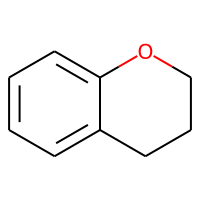
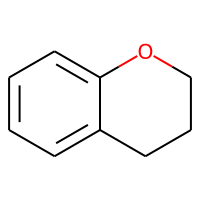
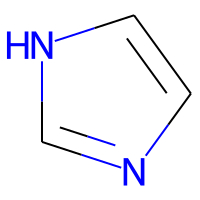
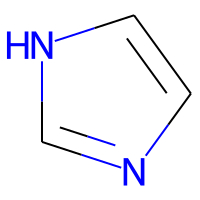
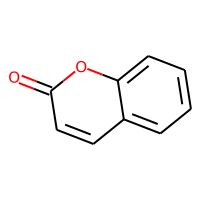
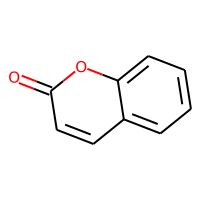
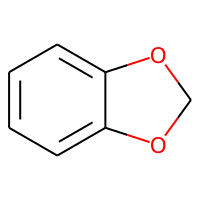
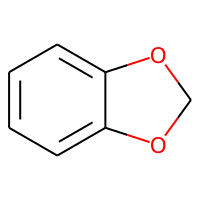
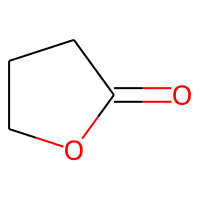
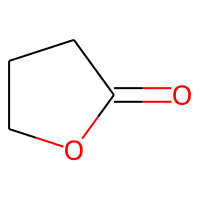
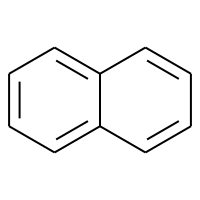
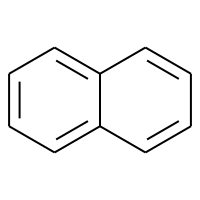
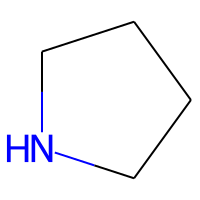
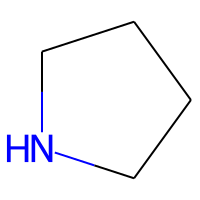
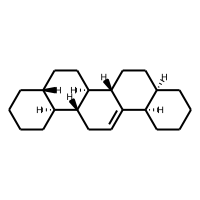
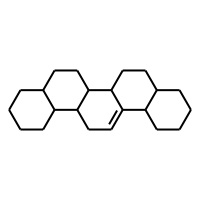
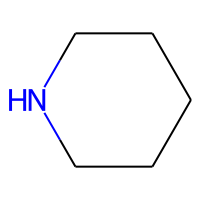
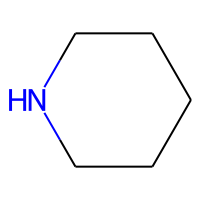
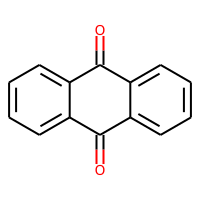
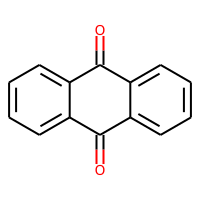
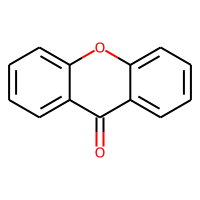
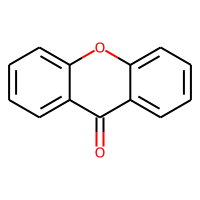
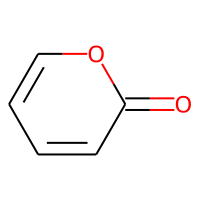
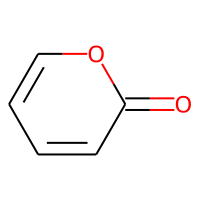
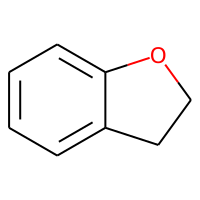
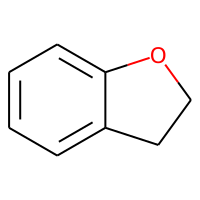
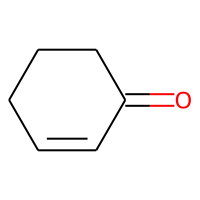
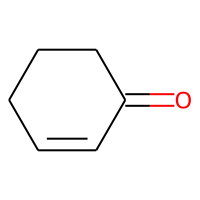
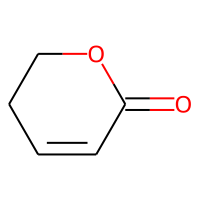
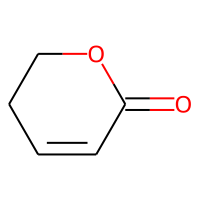
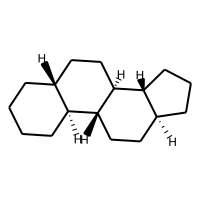
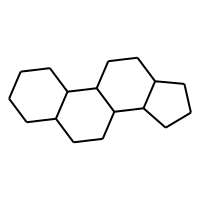
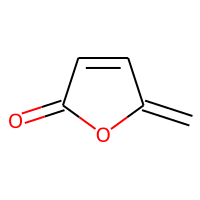
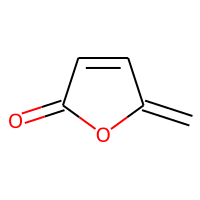
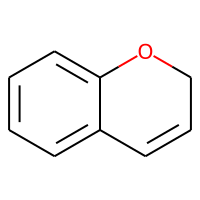
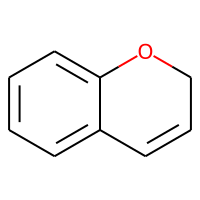
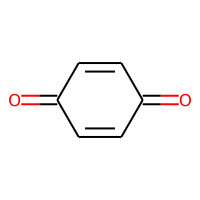
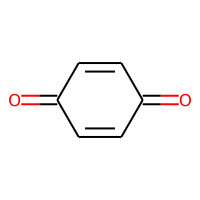
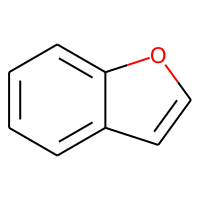
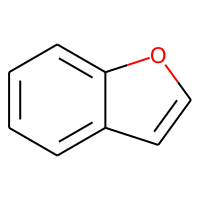
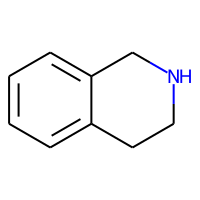
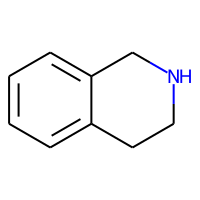
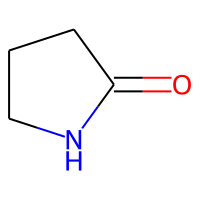
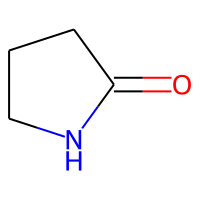
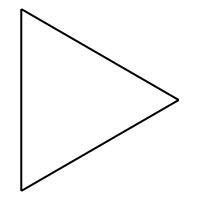
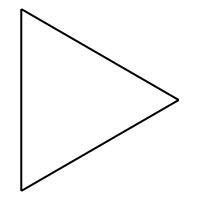
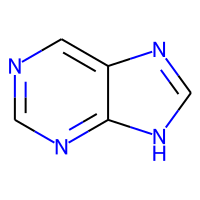
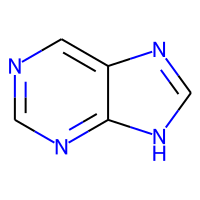
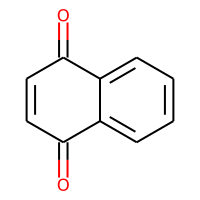
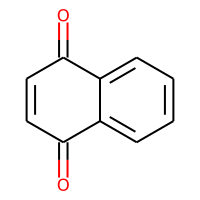
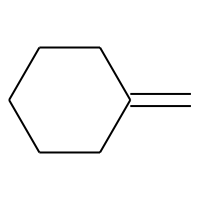
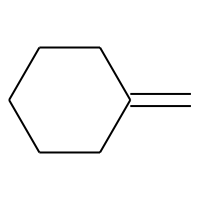
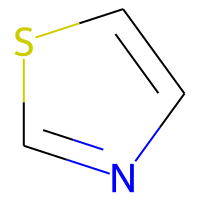
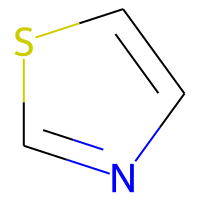
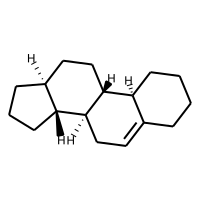
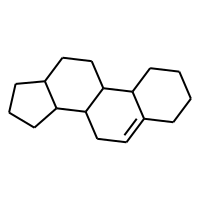

In [105]:
np_top50_merge = npRings_Stereo.head(50).merge(npRings_noStereo.head(50),on='ringSmiles_noStereo')
np_top50_merge

In [93]:
np_top30_merge = npRings_Stereo.head(30).merge(npRings_noStereo.head(30),on='ringSmiles_noStereo')

In [30]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np

<Figure size 1350x2550 with 0 Axes>

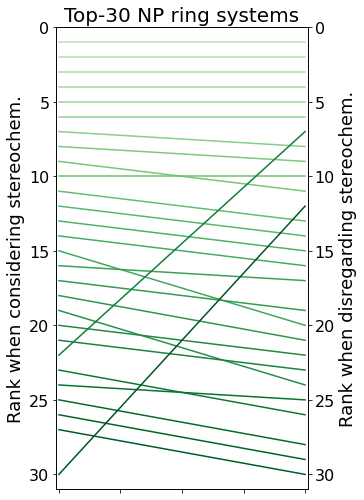

In [95]:
import matplotlib.font_manager

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = 4.5, 8.5
fig = plt.figure(dpi=300)
fig,ax1 = plt.subplots()


x = list(np_top30_merge.rank_x)
y = list(np_top30_merge.rank_y)

cmap = plt.cm.Greens
colors = [cmap(i) for i in np.linspace(0.3,1,30)]

# for a,b in zip(x,y):
#     plt.plot([0,1],[a,b],color=cmap(0.5))
for a,b,c in zip(x,y,colors):
    plt.plot([0,1],[a,b],color=c)
    
plt.title('Top-30 NP ring systems', fontsize=20)
plt.xlim([-0.01,1.01])
plt.tick_params(labelsize=16)
plt.setp(ax1.get_xticklabels(), visible=False)
# ax1.set_ylim(reversed(plt.ylim()))
ax1.set_ylim([31,0])
ax1.set_ylabel('Rank when considering stereochem.',fontsize=18)
ax2= ax1.twinx()
ax2.set_ylim([31,0])
ax2.set_ylabel('Rank when disregarding stereochem.',fontsize=18)

# plt.ylim(reversed(plt.ylim()))
plt.tick_params(labelsize=16)
# plt.xlabel('', fontsize=18)
# plt.ylabel('Rank', fontsize=18)

#### get stereoisomers of rank7 of npRing_noStereo

In [59]:
# get the rank7 of npRing_noStereo; somehow named as top5*
top5_noStereo_smi = npRings_noStereo.ringSmiles_noStereo[6]

In [60]:
top5_noStereo_smi

'C1=C2C3CCCCC3CCC2C2CCC3CCCCC3C2C1'

In [61]:
npRings_Stereo['top5_noStereo'] = npRings_Stereo.apply(lambda row:row.ringMolecule.HasSubstructMatch(Chem.MolFromSmiles(top5_noStereo_smi)),axis=1)

In [62]:
npRings_Stereo_top5_noStereo = npRings_Stereo[npRings_Stereo['top5_noStereo']==True]

In [63]:
npRings_Stereo_top5_noStereo['top5_noStereo'] = npRings_Stereo_top5_noStereo.apply(lambda row: Chem.MolToSmiles(row.ringMolecule,isomericSmiles=False) == top5_noStereo_smi,axis=1)

<ipython-input-63-4a68eab7b704>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  npRings_Stereo_top5_noStereo['top5_noStereo'] = npRings_Stereo_top5_noStereo.apply(lambda row: Chem.MolToSmiles(row.ringMolecule,isomericSmiles=False) == top5_noStereo_smi,axis=1)


In [64]:
npRings_Stereo_top5_noStereo = npRings_Stereo_top5_noStereo[npRings_Stereo_top5_noStereo['top5_noStereo']==True]

In [65]:
len(npRings_Stereo_top5_noStereo)

105

In [66]:
npRings_Stereo_top5_noStereo.columns

Index(['RingSmiles', 'ring_stereoID', 'nMol_stereoID', 'pMol_stereoID',
       'ringMolecule', 'rank', 'rank_pMol_stereoID', 'ringSmiles_noStereo',
       'source', 'top5_noStereo'],
      dtype='object')

In [67]:
pd.to_numeric(npRings_Stereo_top5_noStereo['nMol_stereoID'])

21       1687
228        95
346        60
392        53
750        29
         ... 
38558       1
38559       1
38561       1
38562       1
38563       1
Name: nMol_stereoID, Length: 105, dtype: int64

In [68]:
npRings_Stereo_top5_noStereo.nMol_stereoID.sum()

2234

In [69]:
npRings_Stereo_top5_noStereo.nMol_stereoID.sum()/len(npRings_Stereo)

0.05778283585950028

In [70]:
def count_nFlags_smiles(smi):
    smi = smi.replace('@@','@')
    nFlags = smi.count('@')
    return nFlags

In [71]:
npRings_Stereo_top5_noStereo['nFlags'] = npRings_Stereo_top5_noStereo.apply(lambda row: count_nFlags_smiles(row.RingSmiles),axis=1)

In [72]:
set(npRings_Stereo_top5_noStereo.nFlags)

{7}

In [73]:
top5_stereoisomers = list(npRings_Stereo_top5_noStereo.ringMolecule)

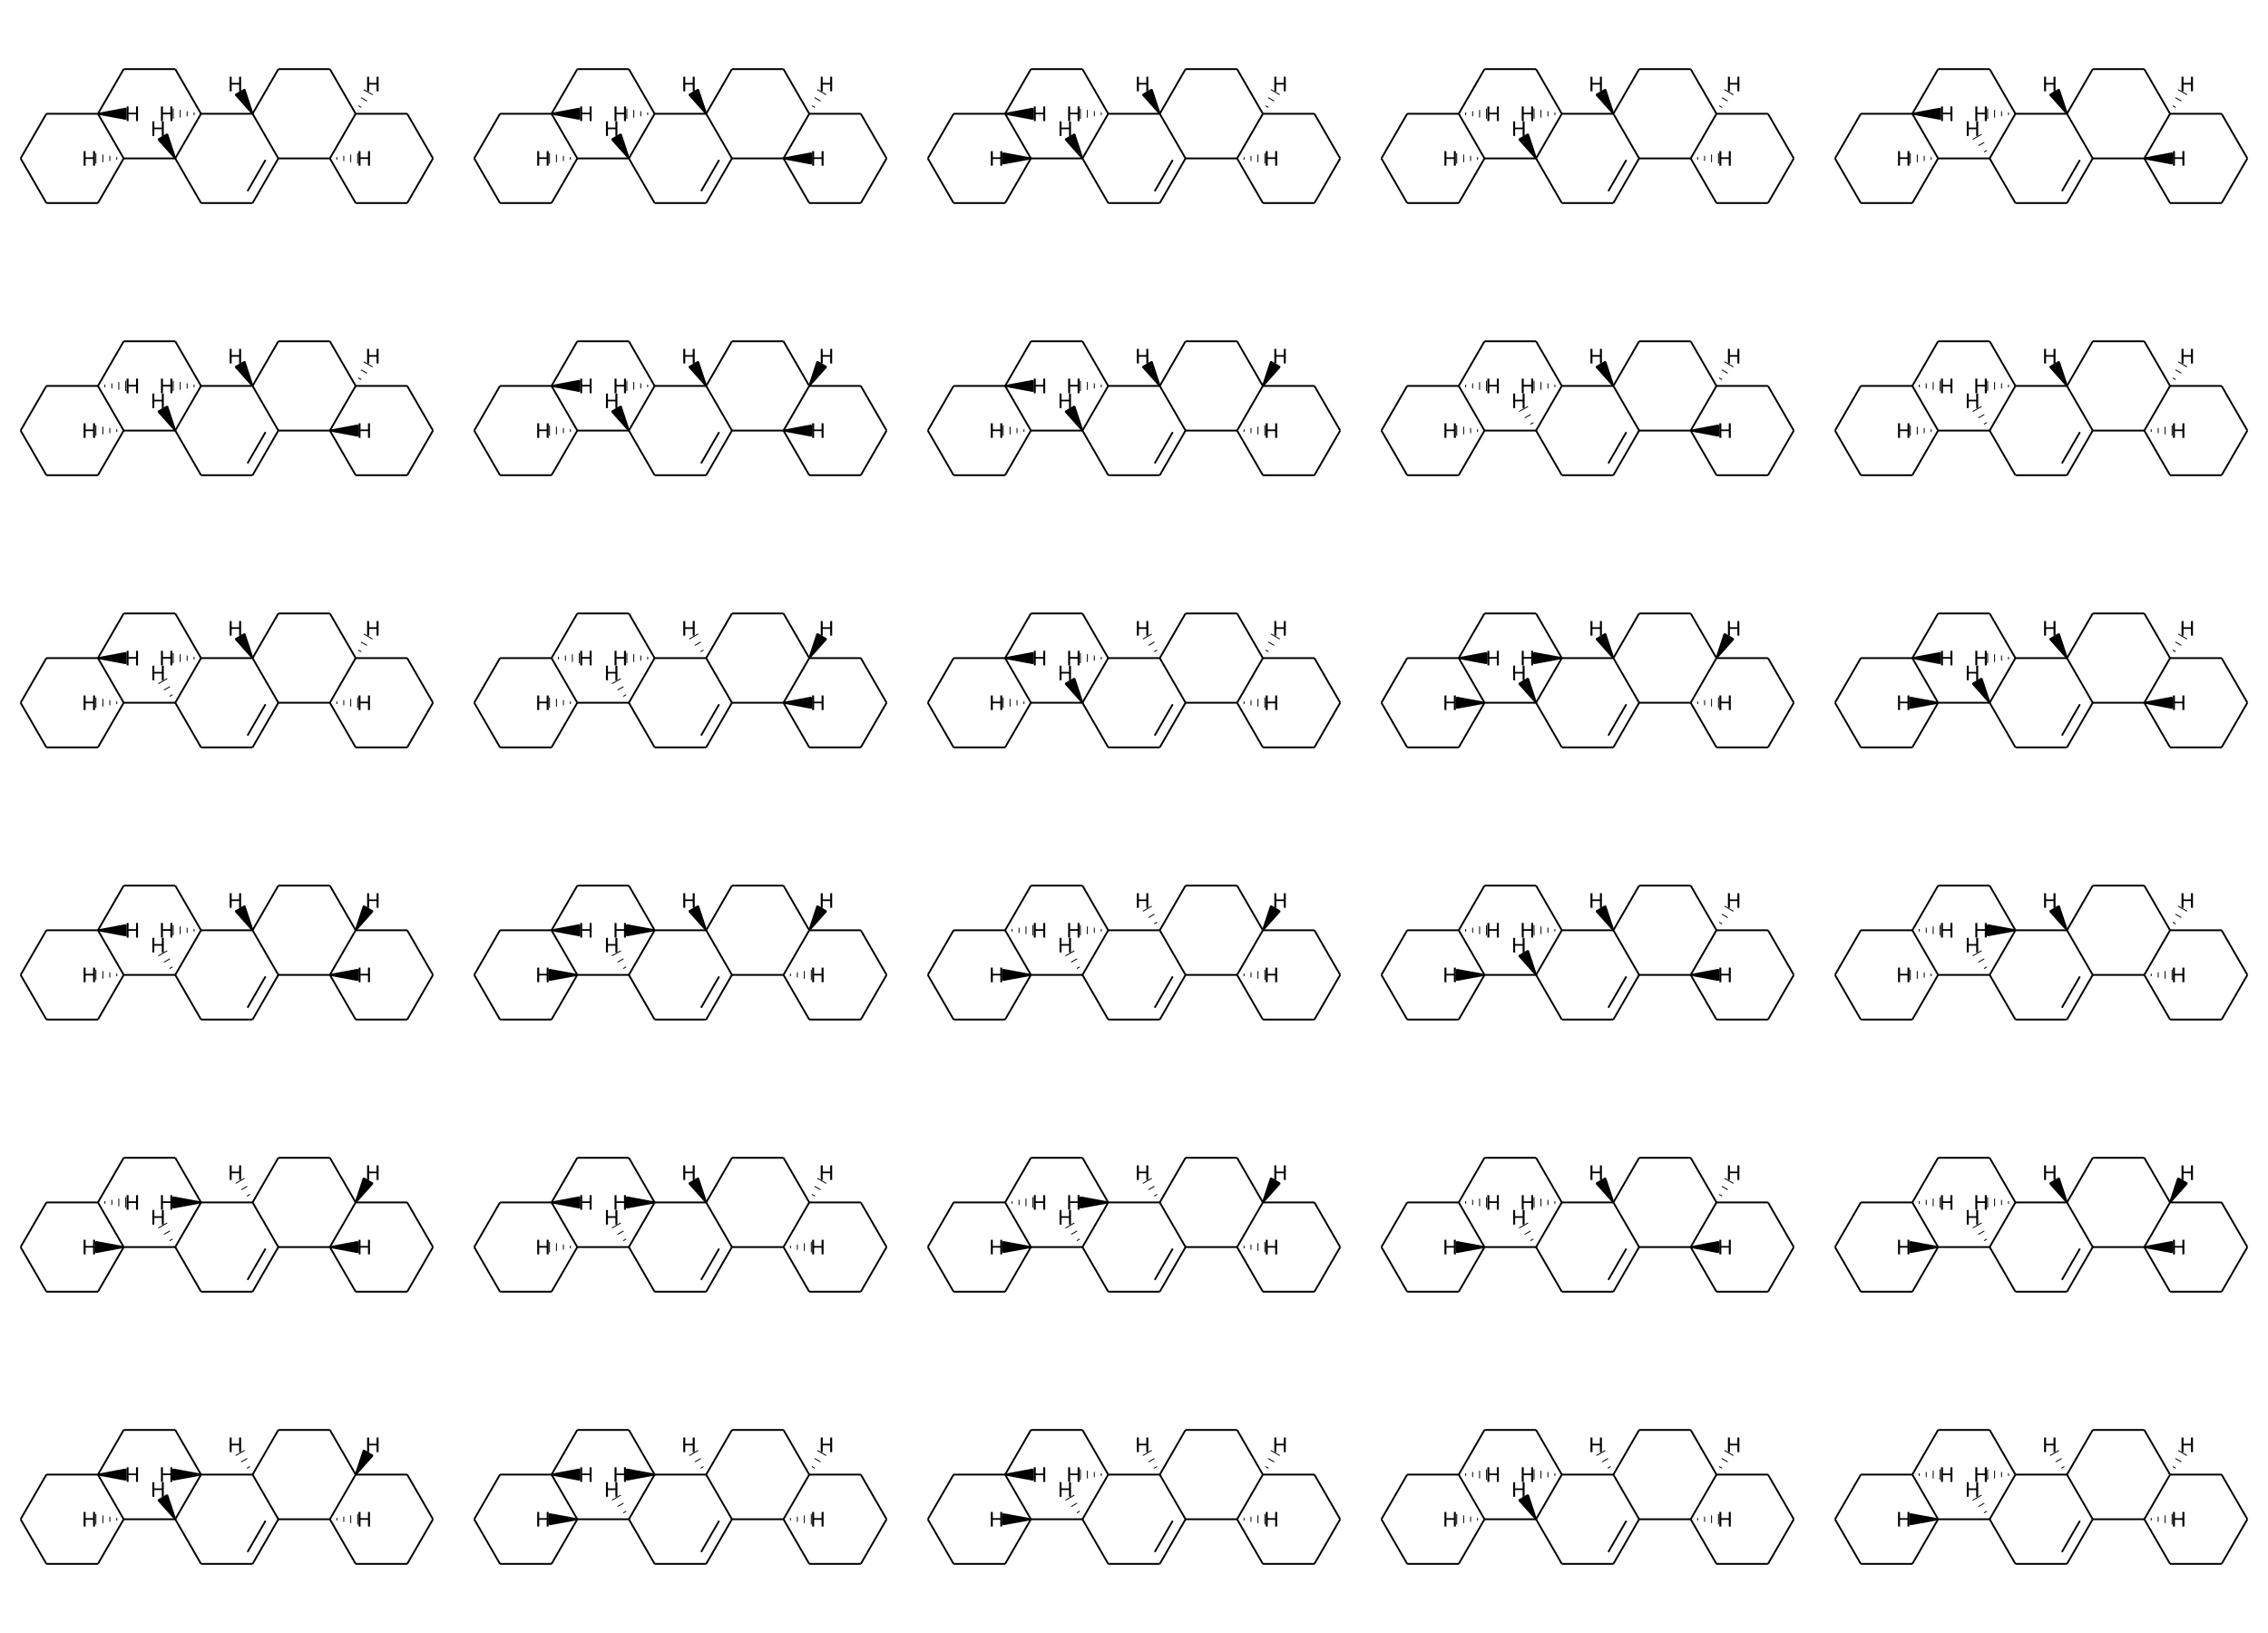

In [74]:
template = Chem.MolFromSmiles(top5_noStereo_smi)
top5_stereoisomers2 = [x for x in top5_stereoisomers if x.HasSubstructMatch(template)]
Chem.AllChem.Compute2DCoords(template)
for m in top5_stereoisomers2:
    _ = Chem.AllChem.GenerateDepictionMatching2DStructure(m,template)
Draw.MolsToGridImage(top5_stereoisomers2[:30],molsPerRow=5,subImgSize=(500,300))

#### synthetic compounds when considering stereochemistry

In [25]:
zincRings_Stereo = pd.read_csv(zincRingsFolder+'zinc_uniqueRingSystems_Stereo.txt',sep='\t')

In [26]:
len(zincRings_Stereo)

53229

In [27]:
zincRings_Stereo['pMol_stereoID'] = zincRings_Stereo['nMol_stereoID'] / nSCs_Stereo
zincRings_Stereo['pMol_stereoID'] = zincRings_Stereo['pMol_stereoID'].map(lambda n: '{:,.2%}'.format(n))

PandasTools.AddMoleculeColumnToFrame(zincRings_Stereo, 'RingSmiles', 'ringMolecule')

In [78]:
zincRings_Stereo.to_csv(resultsFolder+'zincRings_Stereo.csv',
                        columns=['RingSmiles','ring_stereoID','nMol_stereoID','pMol_stereoID'],
                       index=False,sep='\t')

In [28]:
PandasTools.WriteSDF(zincRings_Stereo, resultsFolder+'zincRings_Stereo.sdf', molColName='ringMolecule', idName='ring_stereoID', properties=list(zincRings_Stereo.columns), allNumeric=False)

In [80]:
zincRings_Stereo['rank'] = zincRings_Stereo['nMol_stereoID'].astype(int).rank(method='min',ascending=False)
zincRings_Stereo['rank'] = zincRings_Stereo['rank'].astype(int)

In [81]:
# get the rank: pMol_stereoID as label unter each ring system
zincRings_Stereo['rank_pMol_stereoID'] = zincRings_Stereo['rank'].astype(str)+': '+zincRings_Stereo['pMol_stereoID']

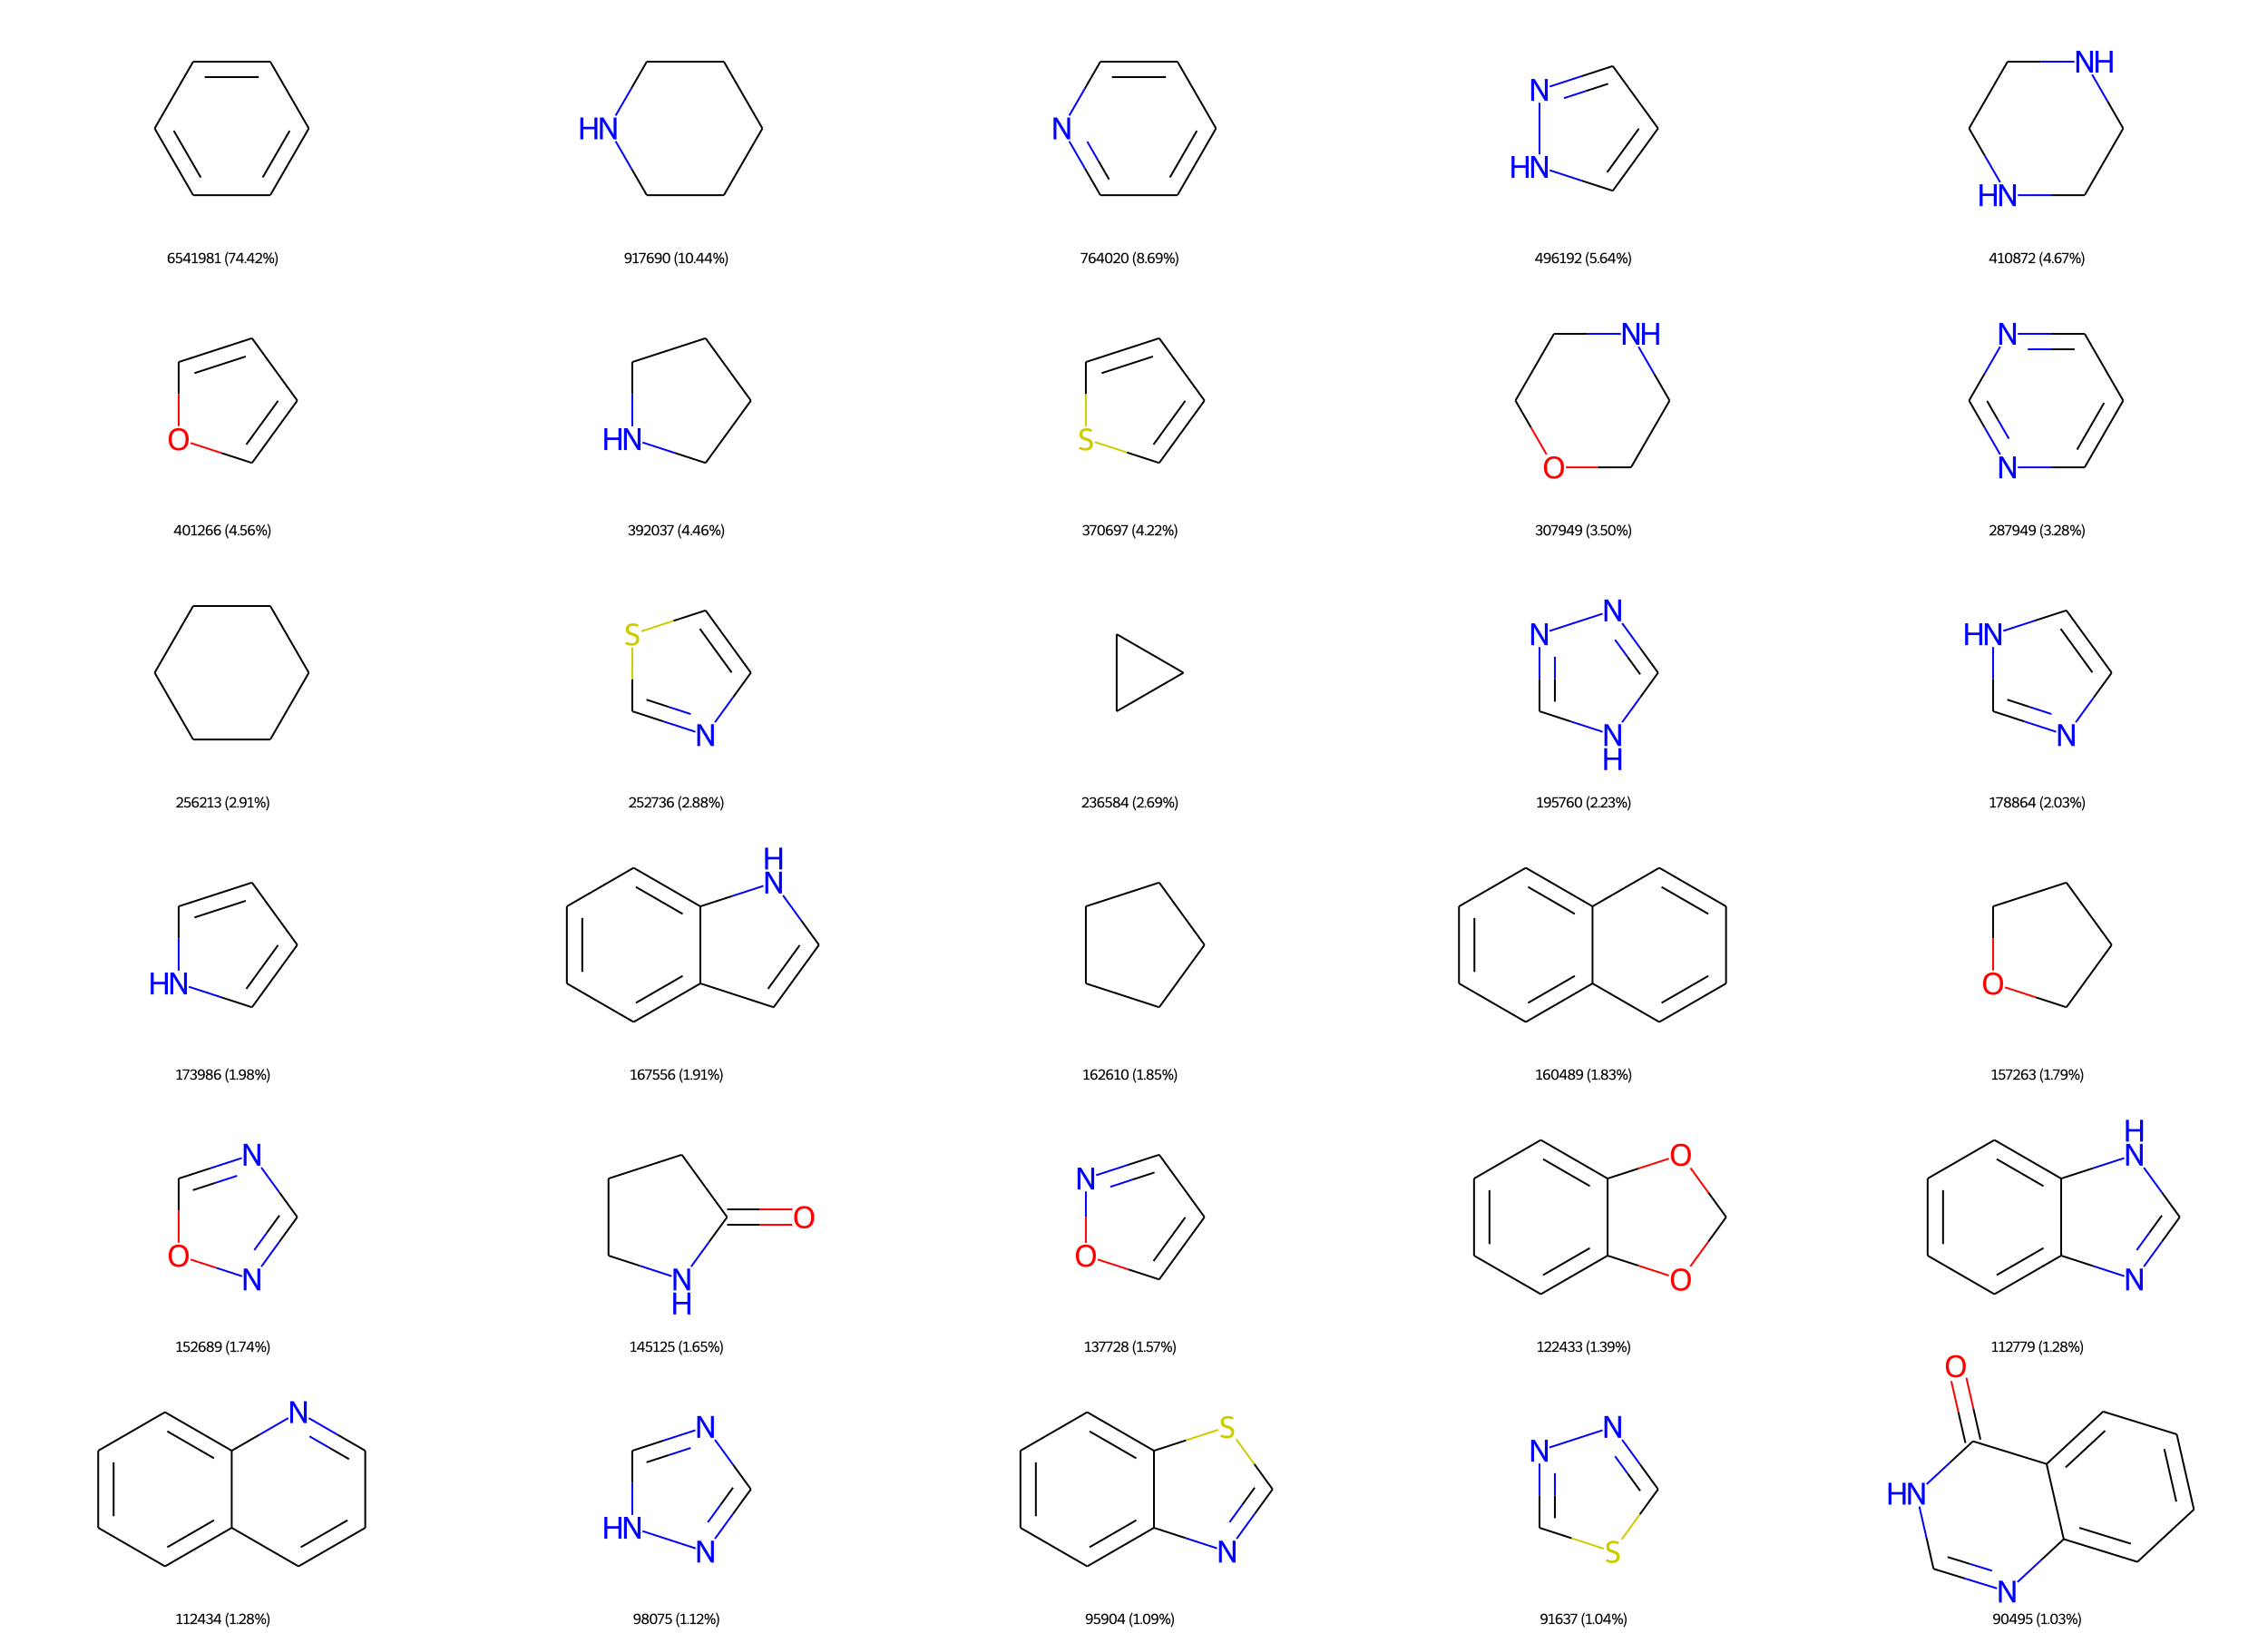

In [82]:
Draw.MolsToGridImage(list(zincRings_Stereo.ringMolecule)[:30],
                     legends=[str(i)+' ('+str(j)+')' for i,j in zip(list(zincRings_Stereo.nMol_stereoID),list(zincRings_Stereo.pMol_stereoID))][:30], 
                     molsPerRow=5,subImgSize=(500,300))

In [199]:
# write down file for chemdraw
PandasTools.WriteSDF(zincRings_Stereo[:30], resultsFolder+'zincRings_Stereo_coorGen.sdf', molColName='ringMolecule', idName='ring_stereoID', properties=list(zincRings_Stereo.columns), allNumeric=False)

In [ ]:
# ranks of w/ and w/o stereochemistry

In [83]:
zincRings_Stereo['ringSmiles_noStereo'] = zincRings_Stereo.apply(lambda row:Chem.MolToSmiles(row.ringMolecule,isomericSmiles=False),axis=1)

zincRings_noStereo['rank'] = zincRings_noStereo['nMol_conID'].astype(int).rank(method='min',ascending=False)

zincRings_noStereo['source'] = 'w/o stereochemistry'
zincRings_Stereo['source'] = 'w/ stereochemistry'

RingSmiles ring_stereoID  nMol_stereoID pMol_stereoID  \
0                c1ccccc1          p1_3        6541981        74.42%   
1                C1CCNCC1          p1_4         917690        10.44%   
2                c1ccncc1          p1_6         764020         8.69%   
3              c1cn[nH]c1         p1_32         496192         5.64%   
4                C1CNCCN1          p1_5         410872         4.67%   
5                 c1ccoc1          p1_7         401266         4.56%   
6                 C1CCNC1          p1_1         392037         4.46%   
7                 c1ccsc1         p1_11         370697         4.22%   
8                C1COCCN1         p1_28         307949         3.50%   
9                c1cncnc1         p1_29         287949         3.28%   
10               C1CCCCC1         p1_24         256213         2.91%   
11                c1cscn1         p1_39         252736         2.88%   
12                  C1CC1         p1_44         236584         2.69%   
13             c1nnc[nH]1        p1_107         195760         2.23%   
14             c1c[nH]cn1          p1_2         178864         2.03%   
15             c1cc[nH]c1        p1_157         173986         1.98%   
16       c1ccc2[nH]ccc2c1         p1_84         167556         1.91%   
17                C1CCCC1         p1_23         162610         1.85%   
18         c1ccc2ccccc2c1         p1_87         160489         1.83%   
19                C1CCOC1         p1_35         157263         1.79%   
20                c1ncon1         p1_43         152689         1.74%   
21              O=C1CCCN1         p1_34         145125         1.65%   
22                c1cnoc1         p1_30         137728         1.57%   
23        c1ccc2c(c1)OCO2         p1_94         122433         1.39%   
24       c1ccc2[nH]cnc2c1         p1_51         112779         1.28%   
25         c1ccc2ncccc2c1        p1_105         112434         1.28%   
26             c1nc[nH]n1        p1_102          98075         1.12%   
27          c1ccc2scnc2c1        p1_185          95904         1.09%   
28                c1nncs1        p1_118          91637         1.04%   
29    O=c1[nH]cnc2ccccc12        p2_116          90495         1.03%   
30               C1CCOCC1         p1_31          87881         1.00%   
31        C=C1SC(=O)NC1=O        p5_256          87355         0.99%   
32  C=c1sc2n(c1=O)CC=CN=2        p25_24          81438         0.93%   
33             c1nnn[nH]1         p1_85          76005         0.86%   
34       c1ccc2c(c1)OCCO2        p1_169          75914         0.86%   
35               c1cnccn1         p1_33          72098         0.82%   
36   C=C1C(=O)NC(=O)NC1=O         p3_51          65111         0.74%   
37        C=C1SC(=S)NC1=O        p2_163          64242         0.73%   
38                c1nnco1        p1_106          62513         0.71%   
39              C1CCCNCC1         p1_10          54136         0.62%   
40                 C1CCC1         p1_47          53828         0.61%   
41          c1ccc2occc2c1          p2_7          53652         0.61%   
42                c1cocn1         p2_12          53411         0.61%   
43        C=C1SC(=N)NC1=O        p2_165          50331         0.57%   
44          c1ccc2ocnc2c1         p2_10          46856         0.53%   
45    O=c1ccc2ccccc2[nH]1         p2_60          44548         0.51%   

                                       ringMolecule_x  rank_x  \
0   <img data-content="rdkit/molecule" src="data:i...       1   
1   <img data-content="rdkit/molecule" src="data:i...       2   
2   <img data-content="rdkit/molecule" src="data:i...       3   
3   <img data-content="rdkit/molecule" src="data:i...       4   
4   <img data-content="rdkit/molecule" src="data:i...       5   
5   <img data-content="rdkit/molecule" src="data:i...       6   
6   <img data-content="rdkit/molecule" src="data:i...       7   
7   <img data-content="rdkit/molecule" src="data:i...       8   
8   <img data-content="rdkit/molecule" src="d
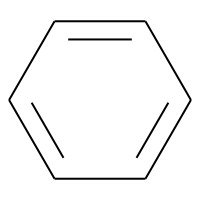
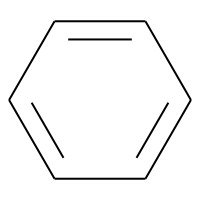
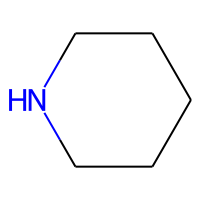
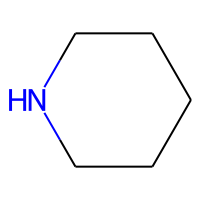
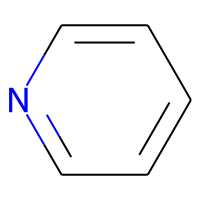
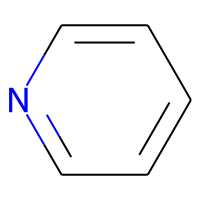
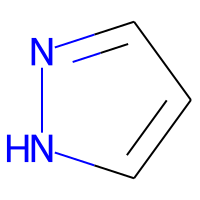
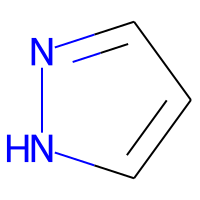
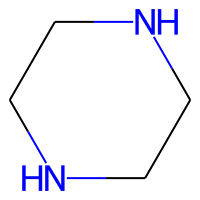
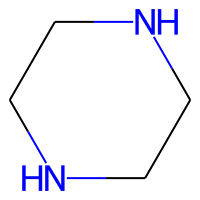
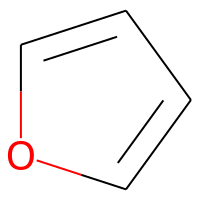
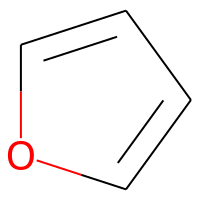
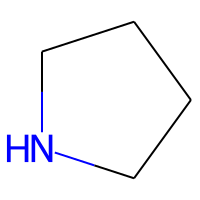
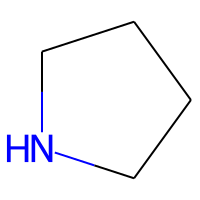
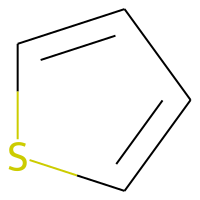
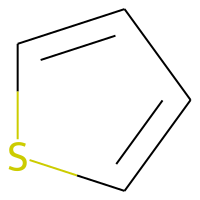
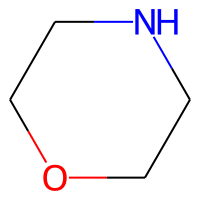
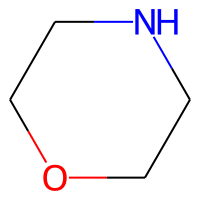
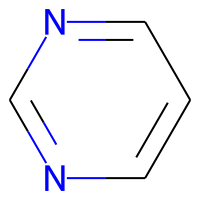
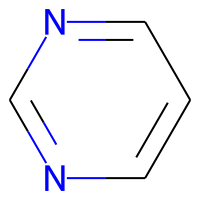
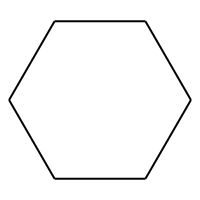
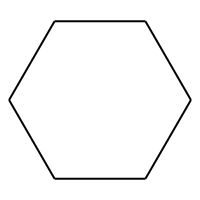
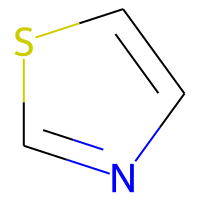
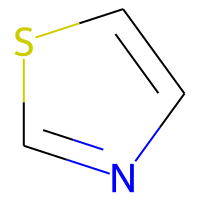
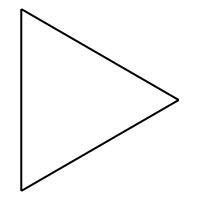
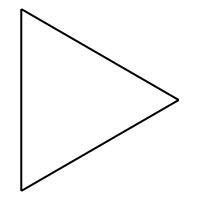
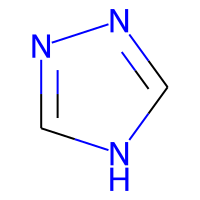
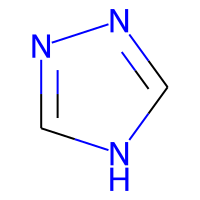
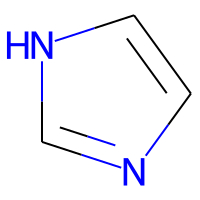
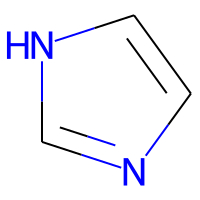
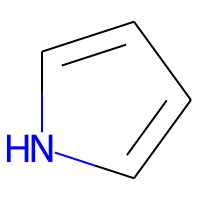
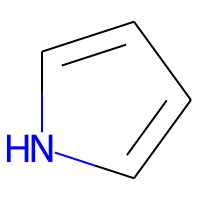
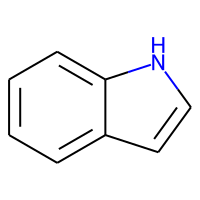
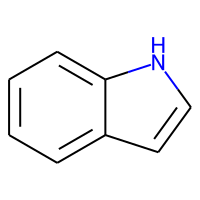
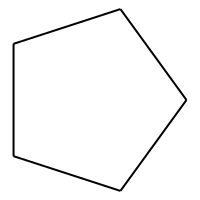
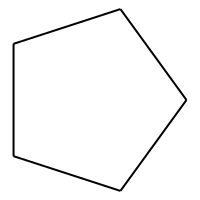
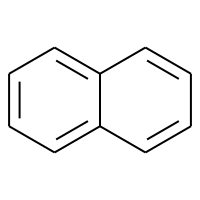
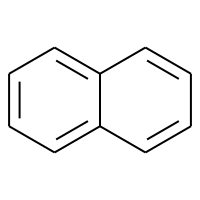
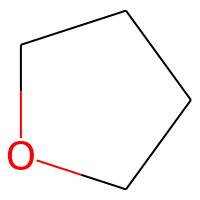
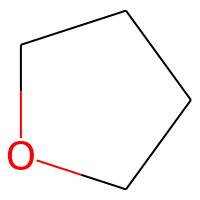
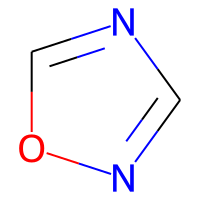
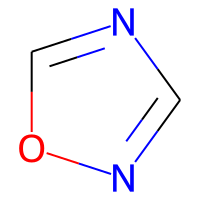
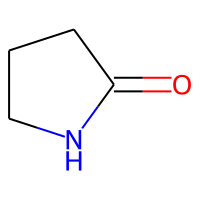
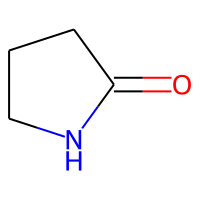
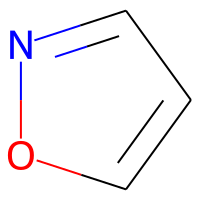
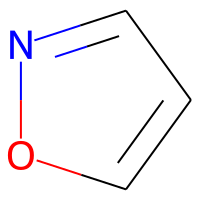
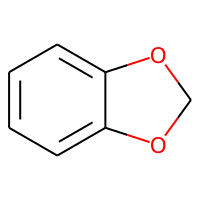
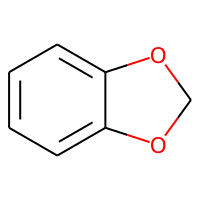
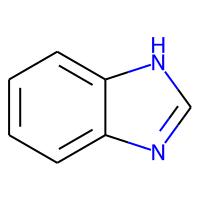
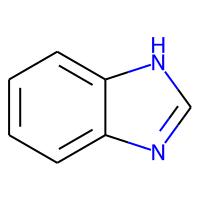
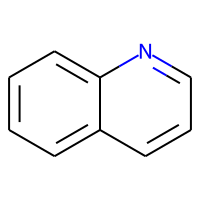
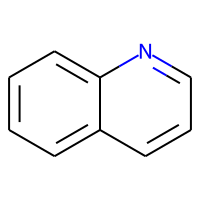
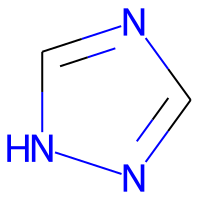
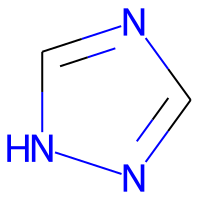
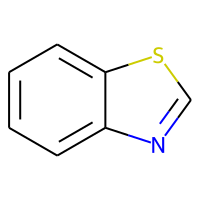
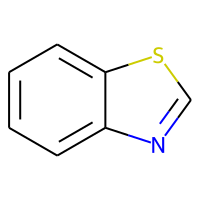
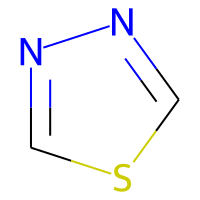
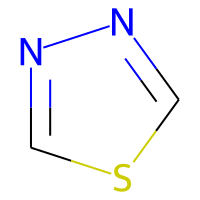
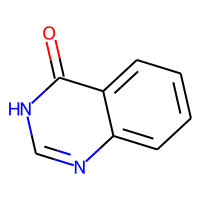
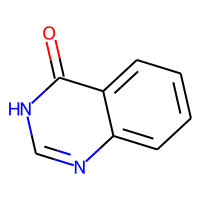
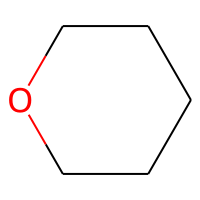
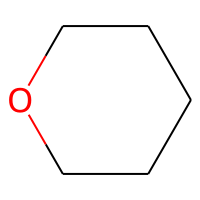
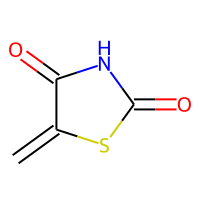
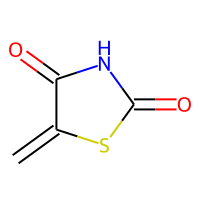
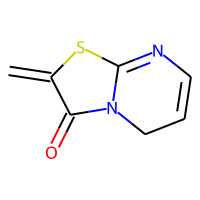
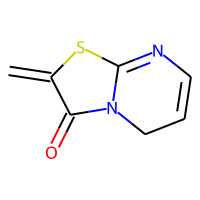
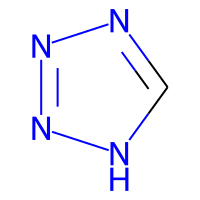
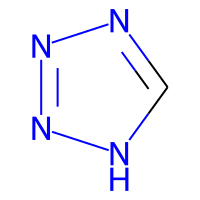
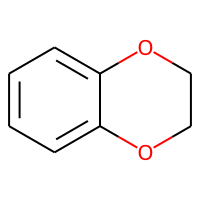
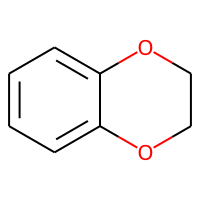
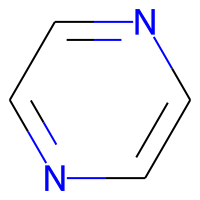
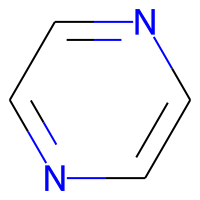
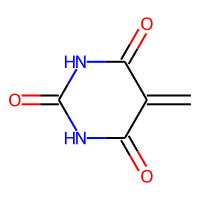
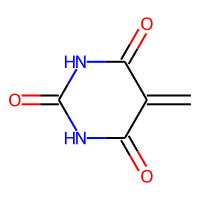
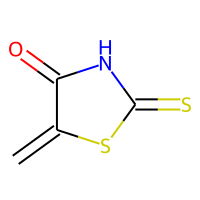
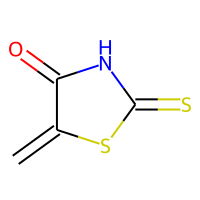
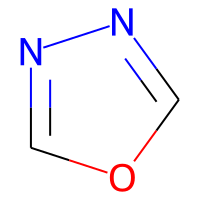
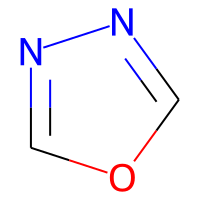
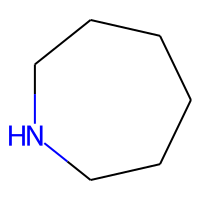
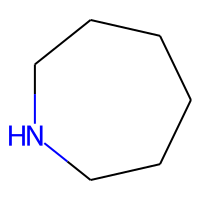
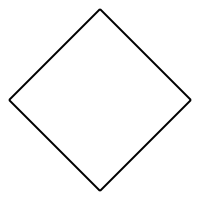
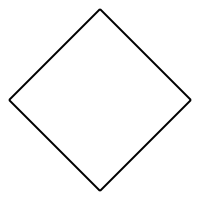
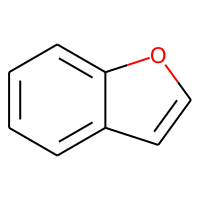
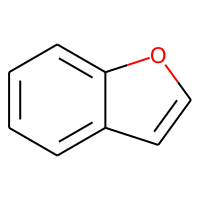
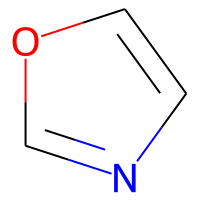
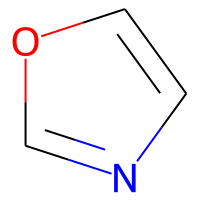
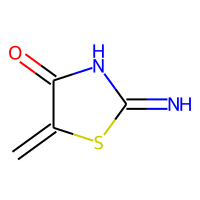
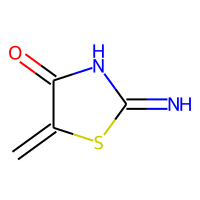
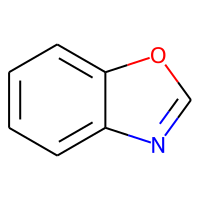
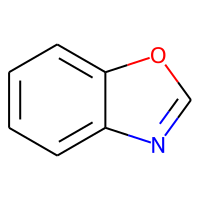
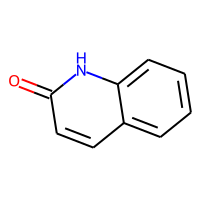
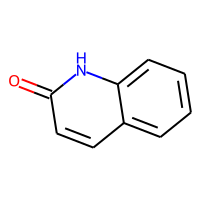

In [104]:
zinc_top50_merge = zincRings_Stereo.head(50).merge(zincRings_noStereo.head(50),on='ringSmiles_noStereo')
zinc_top50_merge

In [96]:
zinc_top30_merge = zincRings_Stereo.head(30).merge(zincRings_noStereo.head(30),on='ringSmiles_noStereo')

<Figure size 1350x2550 with 0 Axes>

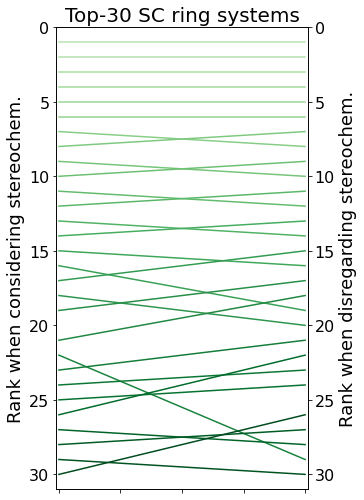

In [97]:
import matplotlib.font_manager

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.figsize'] = 4.5, 8.5
fig = plt.figure(dpi=300)
fig,ax1 = plt.subplots()


x = list(zinc_top30_merge.rank_x)
y = list(zinc_top30_merge.rank_y)

cmap = plt.cm.Greens
colors = [cmap(i) for i in np.linspace(0.3,1,30)]

# for a,b in zip(x,y):
#     plt.plot([0,1],[a,b],color=cmap(0.5))
for a,b,c in zip(x,y,colors):
    plt.plot([0,1],[a,b],color=c)
    
plt.title('Top-30 SC ring systems', fontsize=20)
plt.xlim([-0.01,1.01])
plt.tick_params(labelsize=16)
plt.setp(ax1.get_xticklabels(), visible=False)
# ax1.set_ylim(reversed(plt.ylim()))
ax1.set_ylim([31,0])
ax1.set_ylabel('Rank when considering stereochem.',fontsize=18)
ax2= ax1.twinx()
ax2.set_ylim([31,0])
ax2.set_ylabel('Rank when disregarding stereochem.',fontsize=18)

# plt.ylim(reversed(plt.ylim()))
plt.tick_params(labelsize=16)
# plt.xlabel('', fontsize=18)
# plt.ylabel('Rank', fontsize=18)

In [98]:
diff_top30_zinc = set(list(zincRings_Stereo.RingSmiles)[:30]) - set(list(zincRings_noStereo.ringSmiles_noStereo)[:30])

In [99]:
diff_top30_zinc

{'C1CCOC1'}

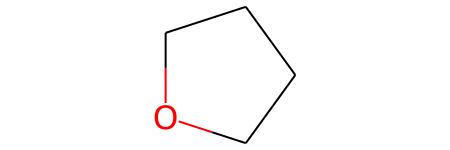

In [100]:
Chem.MolFromSmiles(list(diff_top30_zinc)[0])

In [101]:
diff_top30_zinc2 = set(list(zincRings_noStereo.ringSmiles_noStereo)[:30]) - set(list(zincRings_Stereo.RingSmiles)[:30])

In [102]:
diff_top30_zinc2

{'C=C1SC(=O)NC1=O'}

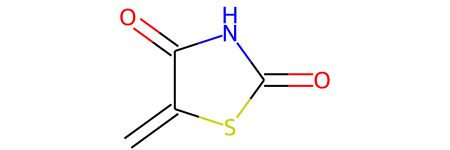

In [103]:
Chem.MolFromSmiles(list(diff_top30_zinc2)[0])

In [132]:
npRings_Stereo.to_csv(resultsFolder+'npRings_Stereo.csv',
                        columns=['RingSmiles','ring_stereoID','nMol_stereoID','pMol_stereoID'],
                       index=False,sep='\t')

In [133]:
npRings_noStereo.to_csv(resultsFolder+'npRings_noStereo.csv',
                        columns=['ringSmiles_noStereo','ring_conID','nMol_conID','pMol_conID'],
                       index=False,sep='\t')

In [134]:
zincRings_noStereo.to_csv(resultsFolder+'zincRings_noStereo.csv',
                        columns=['ringSmiles_noStereo','ring_conID','nMol_conID','pMol_conID'],
                       index=False,sep='\t')

## overlap ring systems

In [106]:
np_Rings_noStere_smiles = set(npRings_noStereo.ringSmiles_noStereo)

In [107]:
zinc_Rings_noStere_smiles = set(zincRings_noStereo.ringSmiles_noStereo)

In [108]:
overlap_noStereo = zinc_Rings_noStere_smiles & np_Rings_noStere_smiles

In [109]:
len(overlap_noStereo), len(overlap_noStereo)/len(npRings_noStereo)

(2949, 0.09511982711350514)

In [110]:
overlap_noStereoDF = pd.merge(npRings_noStereo,zincRings_noStereo,how='inner',on='ringSmiles_noStereo')

ringSmiles_noStereo  ring_conID_x  nMol_conID_x  \
0                            c1ccccc1             4         72297   
1                            C1CCOCC1            22         44113   
2                    O=c1ccoc2ccccc12            44          8879   
3                             C1CCOC1            18          7178   
4                            C1CCCCC1            54          6616   
5                             c1ccoc1            13          5164   
6   C1=C2C3CCCCC3CCC2C2CCC3CCCCC3C2C1           912          5054   
7                             C1CCCC1            38          5028   
8                    c1ccc2[nH]ccc2c1            55          4220   
9                            c1ccncc1           271          3965   
10                         O=C1C=CCO1            42          3678   
11        C1CCC2C(C1)CCC1C3CCCC3CCC21           260          3330   
12                         c1cc[nH]c1           231          3299   
13                              C1CO1            14          3167   
14                          C1=CCCCC1            17          2968   
15                   O=C1CCOc2ccccc21            45          2664   
16                         c1c[nH]cn1           873          2294   
17         C1=C2CCCCC2C2CCC3CCCC3C2C1            16          2223   
18                   O=c1ccc2ccccc2o1           272          2210   
19                   c1ccc2c(c1)CCCO2           307          2106   
20                    c1ccc2c(c1)OCO2           366          2059   
21                     c1ccc2ccccc2c1          1367          2022   
22                            C1CCNC1           327          1900   
23                          O=C1CCCO1           196          1858   
24         O=C1c2ccccc2C(=O)c2ccccc21           778          1596   
25                           C1CCNCC1           582          1570   
26                    C1=CC2CCCCC2CC1            32          1473   
27             O=c1c2ccccc2oc2ccccc12           652          1305   
28                         O=c1cccco1            43          1228   
29                    c1ccc2c(c1)CCO2           426          1078   

   pMol_conID_x                                     ringMolecule_x  rank_x  \
0        29.35%  <img data-content="rdkit/molecule" src="data:i...     1.0   
1        17.91%  <img data-content="rdkit/molecule" src="data:i...     2.0   
2         3.60%  <img data-content="rdkit/molecule" src="data:i...     3.0   
3         2.91%  <img data-content="rdkit/molecule" src="data:i...     4.0   
4         2.69%  <img data-content="rdkit/molecule" src="data:i...     5.0   
5         2.10%  <img data-content="rdkit/molecule" src="data:i...     6.0   
6         2.05%  <img data-content="rdkit/molecule" src="data:i...     7.0   
7         2.04%  <img data-content="rdkit/molecule" src="data:i...     8.0   
8         1.71%  <img data-content="rdkit/molecule" src="data:i...     9.0   
9         1.61%  <img data-content="rdkit/molecule" src="data:i...    10.0   
10        1.49%  <img data-content="rdkit/molecule" src="data:i...    11.0   
11        1.35%  <img data-content="rdkit/molecule" src="data:i...    12.0   
12        1.34%  <img data-content="rdkit/molecule" src="data:i...    13.0   
13        1.29%  <img data-content="rdkit/molecule" src="data:i...    14.0   
14        1.20%  <img data-content="rdkit/molecule" src="data:i...    15.0   
15        1.08%  <img data-content="rdkit/molecule" src="data:i...    16.0   
16        0.93%  <img data-content="rdkit/molecule" src="data:i...    17.0   
17        0.90%  <img data-content="rdkit/molecule" src="data:i...    18.0   
18        0.90%  <img data-content="rdkit/molecule" src="data:i...    19.0   
19        0.85%  <img data-content="rdkit/molecule" src="data:i...    20.0   
20        0.84%  <img data-content="rdkit/molecule" src="data:i...    21.0   
21        0.82%  <img data-content="rdkit/molecule" src="data:i...    22.0   
22        0.77%  <img data-content="rdkit/molecule" src="data:i...    23.0   
23    
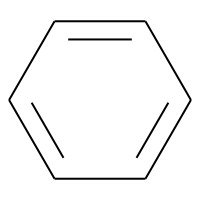
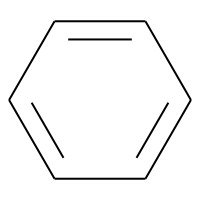
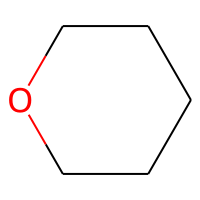
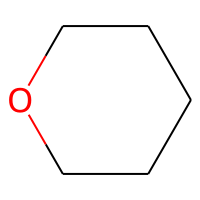
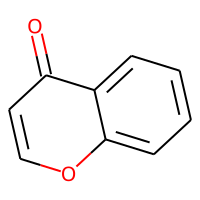
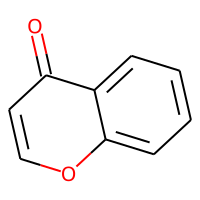
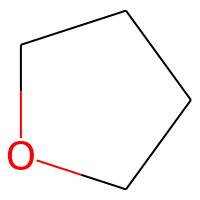
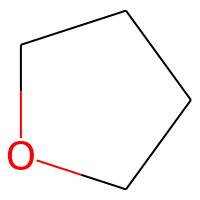
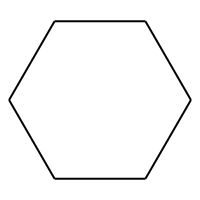
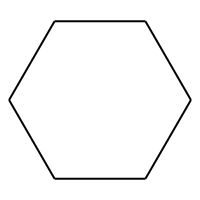
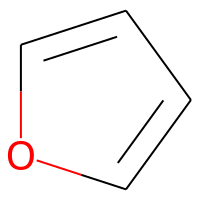
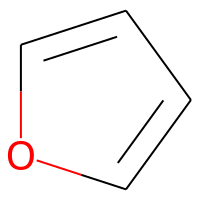
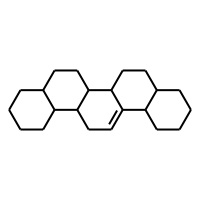
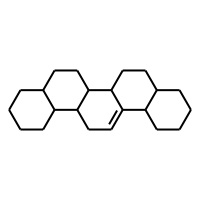
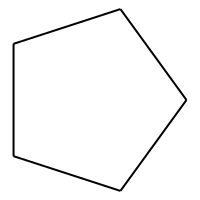
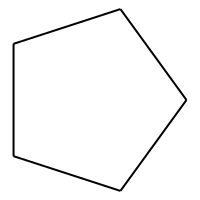
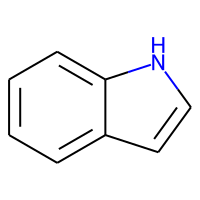
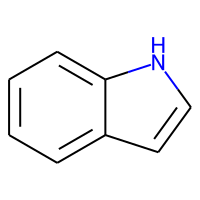
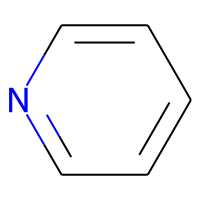
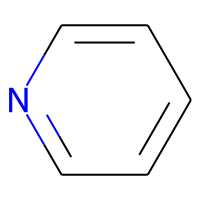
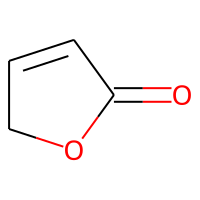
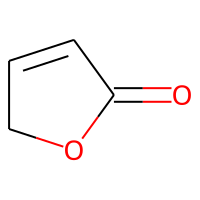
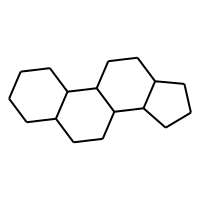
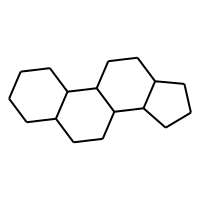
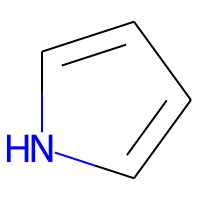
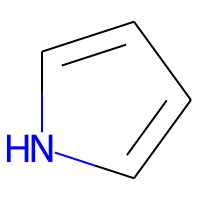
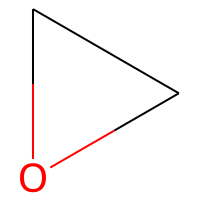
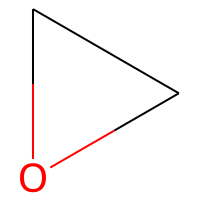
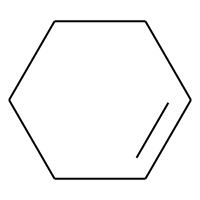
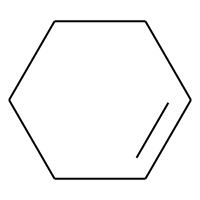
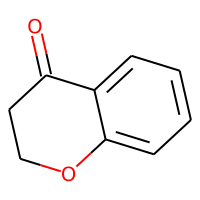
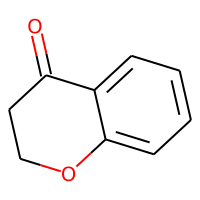
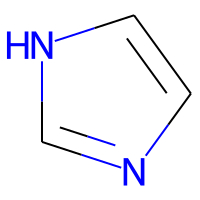
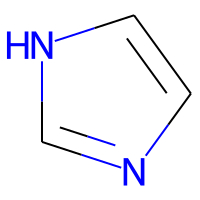
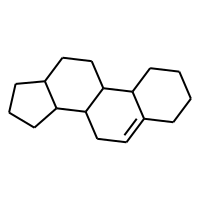
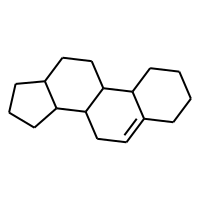
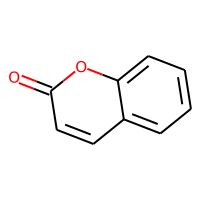
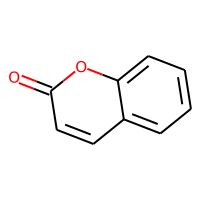
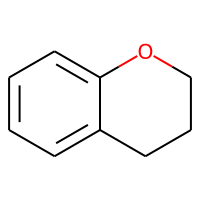
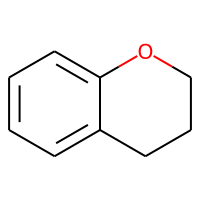
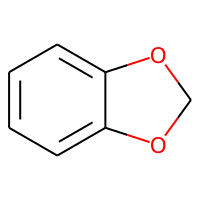
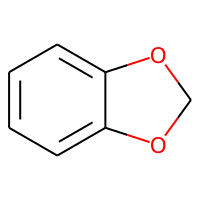
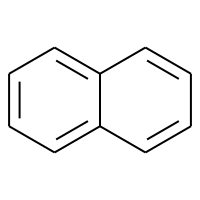
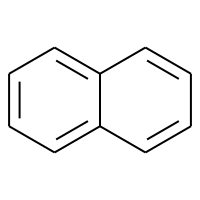
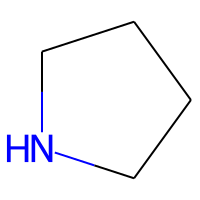
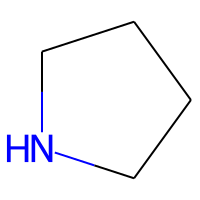
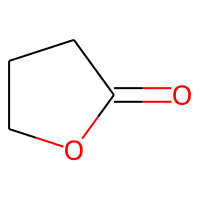
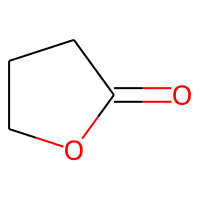
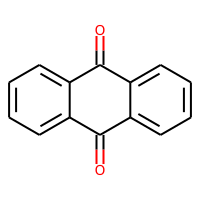
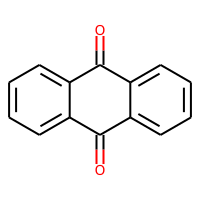
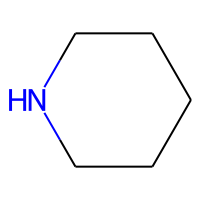
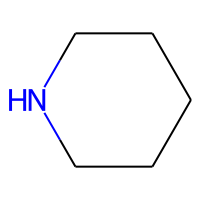
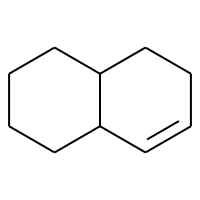
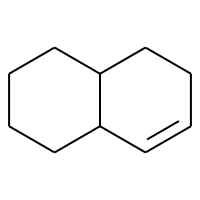
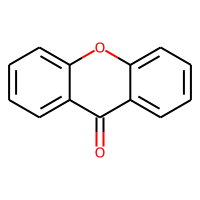
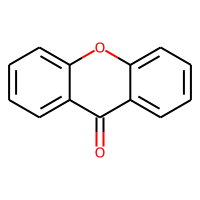
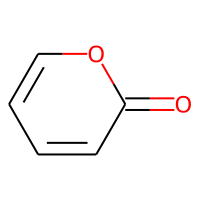
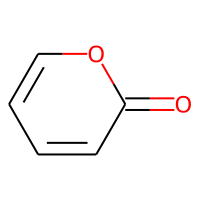
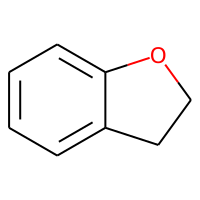
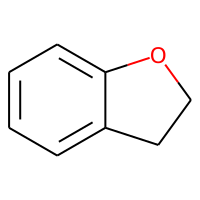

In [111]:
overlap_noStereoDF.head(30)

In [112]:
len(overlap_noStereoDF[overlap_noStereoDF['nMol_conID_x']==1])

832

In [113]:
len(overlap_noStereoDF[overlap_noStereoDF['nMol_conID_y']==1])

750

In [114]:
singltons_noStereo = overlap_noStereoDF[(overlap_noStereoDF['nMol_conID_x']==1)|(overlap_noStereoDF['nMol_conID_y']==1)]

In [115]:
len(singltons_noStereo)

1329

In [116]:
overlap5_noStereo = overlap_noStereoDF[(overlap_noStereoDF['nMol_conID_x']>=5)&(overlap_noStereoDF['nMol_conID_y']>=5)]

In [117]:
len(overlap5_noStereo)

815

ringSmiles_noStereo  ring_conID_x  nMol_conID_x  \
0                            c1ccccc1             4         72297   
1                            C1CCOCC1            22         44113   
2                    O=c1ccoc2ccccc12            44          8879   
3                             C1CCOC1            18          7178   
4                            C1CCCCC1            54          6616   
5                             c1ccoc1            13          5164   
6   C1=C2C3CCCCC3CCC2C2CCC3CCCCC3C2C1           912          5054   
7                             C1CCCC1            38          5028   
8                    c1ccc2[nH]ccc2c1            55          4220   
9                            c1ccncc1           271          3965   
10                         O=C1C=CCO1            42          3678   
11        C1CCC2C(C1)CCC1C3CCCC3CCC21           260          3330   
12                         c1cc[nH]c1           231          3299   
13                              C1CO1            14          3167   
14                          C1=CCCCC1            17          2968   
15                   O=C1CCOc2ccccc21            45          2664   
16                         c1c[nH]cn1           873          2294   
17         C1=C2CCCCC2C2CCC3CCCC3C2C1            16          2223   
18                   O=c1ccc2ccccc2o1           272          2210   
19                   c1ccc2c(c1)CCCO2           307          2106   
20                    c1ccc2c(c1)OCO2           366          2059   
21                     c1ccc2ccccc2c1          1367          2022   
22                            C1CCNC1           327          1900   
23                          O=C1CCCO1           196          1858   
24         O=C1c2ccccc2C(=O)c2ccccc21           778          1596   
25                           C1CCNCC1           582          1570   
26                    C1=CC2CCCCC2CC1            32          1473   
27             O=c1c2ccccc2oc2ccccc12           652          1305   
28                         O=c1cccco1            43          1228   
29                    c1ccc2c(c1)CCO2           426          1078   
30                     C1CCC2CCCCC2C1             7          1073   
31                        O=C1C=CCCO1           136          1039   
32                        O=C1C=CCCC1            46          1036   
33                   C=C1CCC2CCCCC2C1             8           983   
34                     C=C1C=CC(=O)O1           456           914   
35                    C1=Cc2ccccc2OC1           615           903   
37                   O=C1C=CC(=O)C=C1            20           832   

   pMol_conID_x                                     ringMolecule_x  rank_x  \
0        29.35%  <img data-content="rdkit/molecule" src="data:i...     1.0   
1        17.91%  <img data-content="rdkit/molecule" src="data:i...     2.0   
2         3.60%  <img data-content="rdkit/molecule" src="data:i...     3.0   
3         2.91%  <img data-content="rdkit/molecule" src="data:i...     4.0   
4         2.69%  <img data-content="rdkit/molecule" src="data:i...     5.0   
5         2.10%  <img data-content="rdkit/molecule" src="data:i...     6.0   
6         2.05%  <img data-content="rdkit/molecule" src="data:i...     7.0   
7         2.04%  <img data-content="rdkit/molecule" src="data:i...     8.0   
8         1.71%  <img data-content="rdkit/molecule" src="data:i...     9.0   
9         1.61%  <img data-content="rdkit/molecule" src="data:i...    10.0   
10        1.49%  <img data-content="rdkit/molecule" src="data:i...    11.0   
11        1.35%  <img data-content="rdkit/molecule" src="data:i...    12.0   
12        1.34%  <img data-content="rdkit/molecule" src="data:i...    13.0   
13        1.29%  <img data-content="rdkit/molecule" src="data:i...    14.0   
14        1.20%  <img data-content="rdkit/molecule" src="data:i...    15.0   
15        1.08%  <img data-content="rdkit/molecule" src="data:i...    16.0   
16        0.93%  <img data-content="rdkit/molecule" src="data:i...   
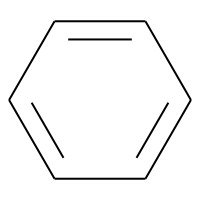
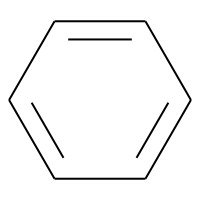
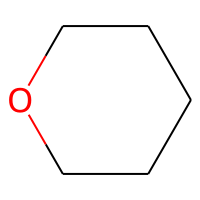
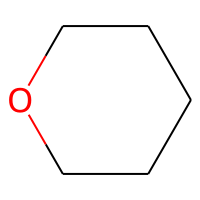
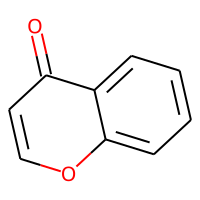
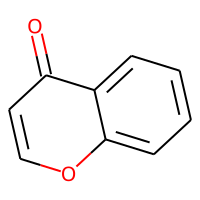
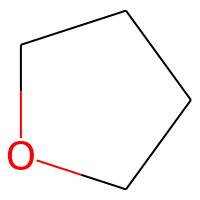
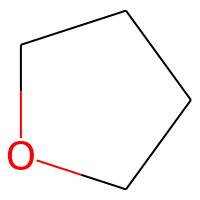
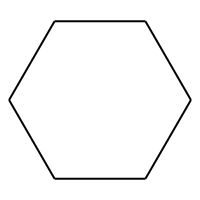
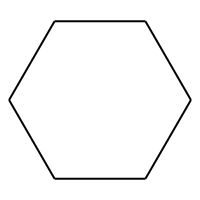
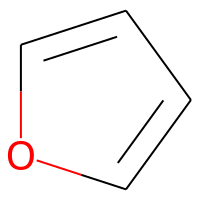
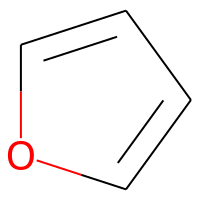
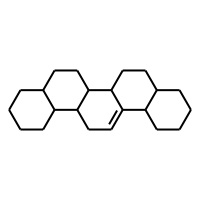
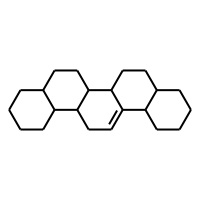
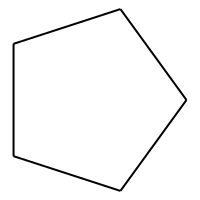
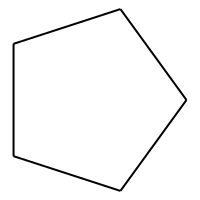
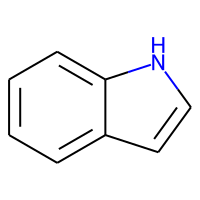
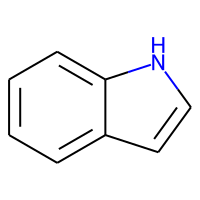
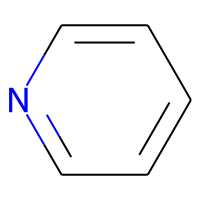
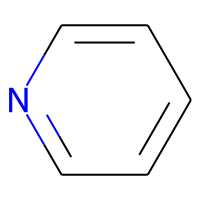
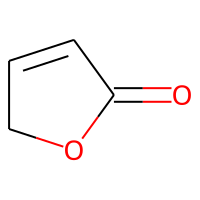
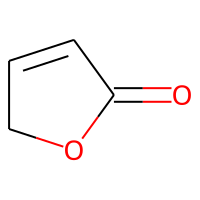
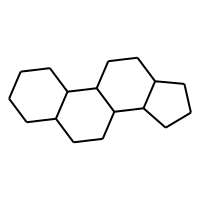
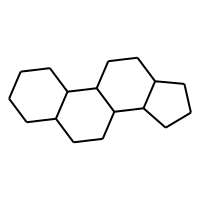
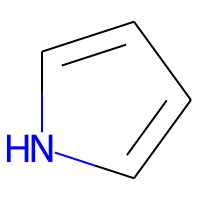
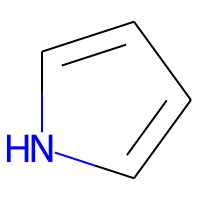
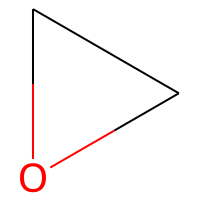
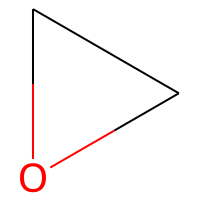
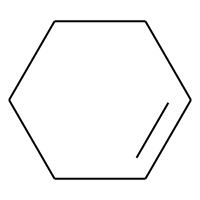
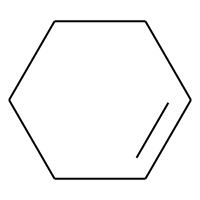
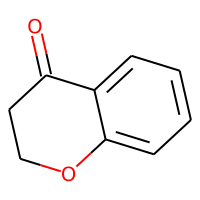
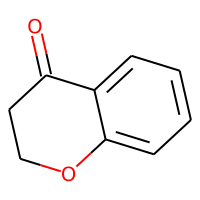
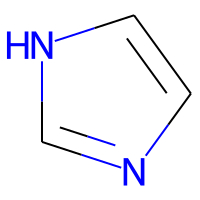
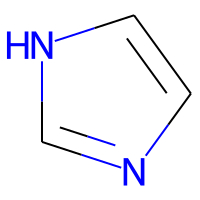
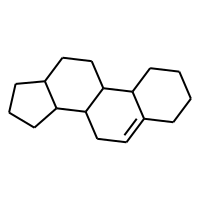
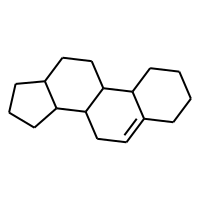
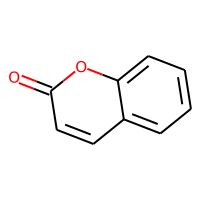
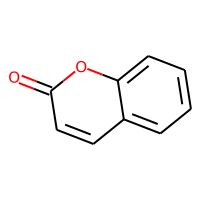
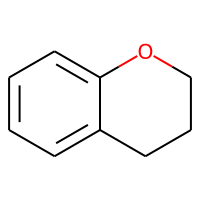
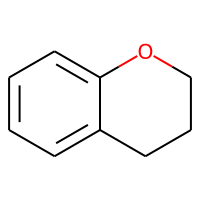
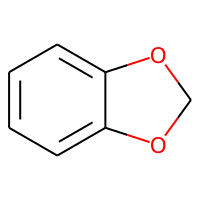
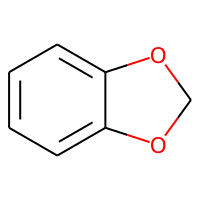
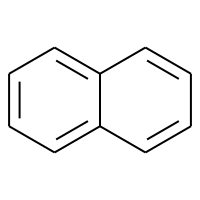
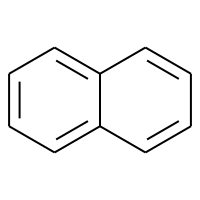
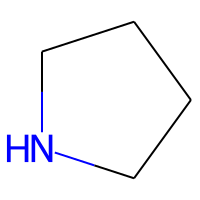
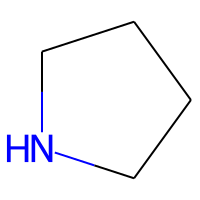
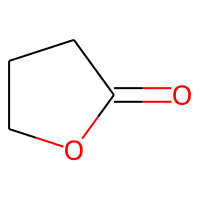
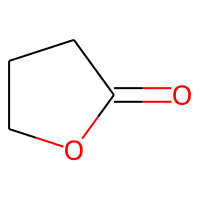
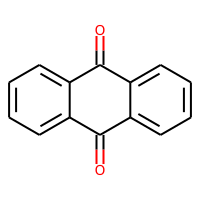
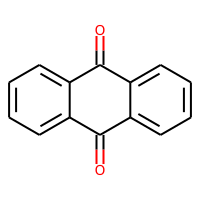
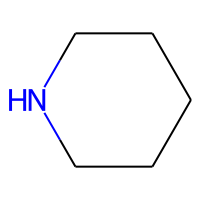
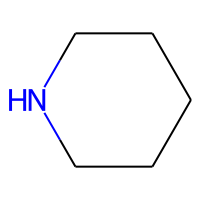
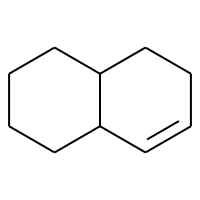
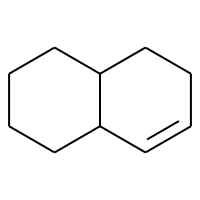
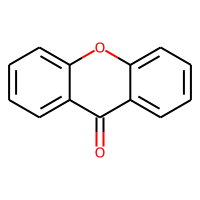
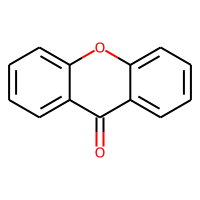
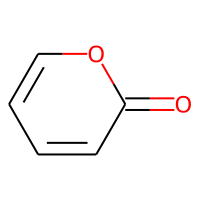
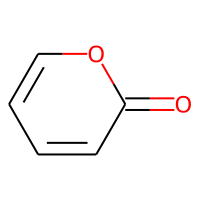
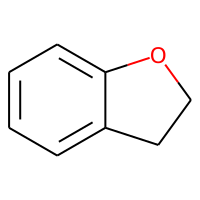
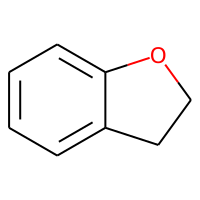
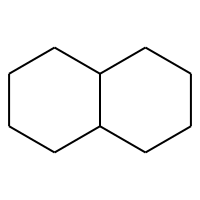
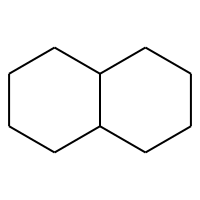
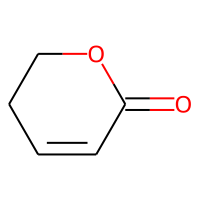
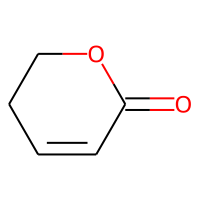
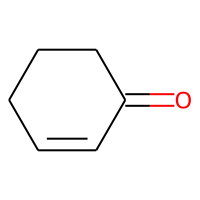
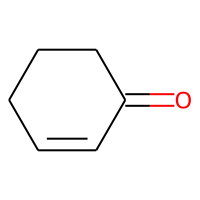
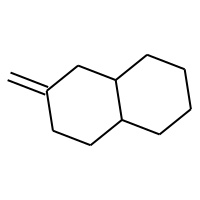
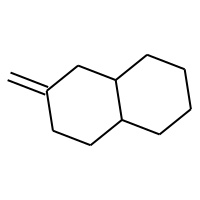
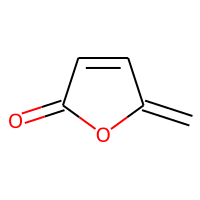
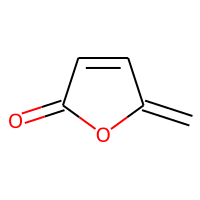
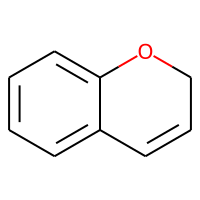
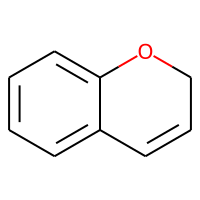
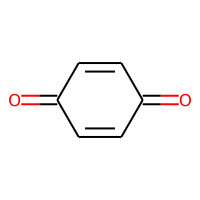
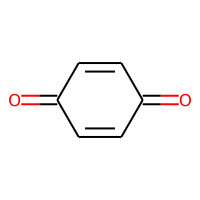

In [118]:
overlap5_noStereo.head(37)

In [ ]:
# compare smiles when considering stereochemistry is not right, must use superpose!

In [119]:
from rdkit import Chem
from rdkit.Chem import Mol, MolToSmiles, MolFromSmiles, ChiralType, BondStereo, AllChem, CanonSmiles, rdFMCS
import itertools

def superpose(m1, m2):
    '''
    this algorithm works well if both molecules m1 and m2 have a large number
    of unspecified stereo centers
    don't consider bond stereochemistry, so the input molecules should have all removed bond stereo
    '''
  # quick exit: are both molecules the same if we remove all stereo information?
    if MolToSmiles(m1, isomericSmiles=False) != MolToSmiles(m2, isomericSmiles=False):
        return False

    #another quick exit: any of the two molecules has 0 chiral tags
    if count_nFlags_smiles(MolToSmiles(m1)) == 0 or count_nFlags_smiles(MolToSmiles(m2)) == 0:
        return True
    
    for match in m1.GetSubstructMatches(m2, uniquify=False, useChirality=False):
        m1_copy = Mol(m1)
        m2_copy = Mol(m2)
        
        # gather all atom pairs where only one atom has a specified stereo center
        relevant_atom_pairs = [(a1, a2) for a1, a2 in zip([m1_copy.GetAtomWithIdx(idx) for idx in match],
                                                          m2_copy.GetAtoms())
                               if (a1.GetChiralTag() == ChiralType.CHI_UNSPECIFIED or
                                   a2.GetChiralTag() == ChiralType.CHI_UNSPECIFIED) and
                               a1.GetChiralTag() != a2.GetChiralTag()]

        # make sure that each tuple starts with the unspecified atom
        relevant_atom_pairs = [(a1, a2) if a1.GetChiralTag() == ChiralType.CHI_UNSPECIFIED
                               else (a2, a1)
                               for (a1, a2) in relevant_atom_pairs]

        # we want to enforce that m1 and m2 have the same CIP label on the stereo centers
        # unfortunately, we don't know which chiral tag (@, @@) corresponds to which CIP label
        # for that reason, we have to try all combinations
        for chiral_tag_combination in itertools.product((ChiralType.CHI_TETRAHEDRAL_CW,
                                                         ChiralType.CHI_TETRAHEDRAL_CCW),
                                                        repeat=len(relevant_atom_pairs)):

                # assign chiral tag combination to atoms
                for (a1, a2), flag in zip(relevant_atom_pairs, chiral_tag_combination):
                    # we made sure that the first atom is unspecified
                    a1.SetChiralTag(flag)

                if m1_copy.HasSubstructMatch(m2_copy, useChirality=True):
                    return True
    return False

In [120]:
npRings_Stereo['ringSmiles_noBondStereo'] = npRings_Stereo.apply(lambda row: row['RingSmiles'].replace('\\','').replace('/',''),axis=1)
npRings_Stereo['ringSmiles_noStereo'] = npRings_Stereo.apply(lambda row: Chem.MolToSmiles(row['ringMolecule'],isomericSmiles=False),axis=1)

In [121]:
zincRings_Stereo['ringSmiles_noBondStereo'] = zincRings_Stereo.apply(lambda row: row['RingSmiles'].replace('\\','').replace('/',''),axis=1)
zincRings_Stereo['ringSmiles_noStereo'] = zincRings_Stereo.apply(lambda row: Chem.MolToSmiles(row['ringMolecule'],isomericSmiles=False),axis=1)

In [122]:
groupped = npRings_Stereo.groupby('ringSmiles_noStereo')

In [123]:
zinc_smiles = list(zincRings_Stereo.ringSmiles_noBondStereo)
zinc_smiles_noStereo = list(zincRings_Stereo.ringSmiles_noStereo)

In [124]:
frames = []
for name, group in groupped:
    keep = 1
    smiles_list=list(group.ringSmiles_noBondStereo)
    smiles_noStereo_list = list(group.ringSmiles_noStereo)
    for a,b in zip(smiles_list,smiles_noStereo_list):
        for x,y in zip(zinc_smiles,zinc_smiles_noStereo):
            if b == y:
                if superpose(Chem.MolFromSmiles(a),Chem.MolFromSmiles(x)):
                    keep = 0
    if keep ==1:
        frames.append(group)

In [125]:
npRings_notZinc = pd.concat(frames)

In [126]:
PandasTools.WriteSDF(npRings_notZinc, resultsFolder+'npRings_notZinc.sdf', 
                     molColName='ringMolecule', idName='ring_stereoID', 
                     properties=list(npRings_notZinc.columns), allNumeric=False)

In [127]:
overlap_np_zinc_rings_stereo = npRings_Stereo[~npRings_Stereo['ring_stereoID'].isin(set(npRings_notZinc.ring_stereoID))]

RingSmiles ring_stereoID  \
0                                            c1ccccc1         p1_10   
1                                            C1CCOCC1         p1_67   
2                                    O=c1ccoc2ccccc12        p1_147   
3                                             C1CCOC1         p1_63   
4                                            C1CCCCC1        p1_161   
5                                             c1ccoc1         p1_35   
6                                             C1CCCC1        p1_132   
7                                    c1ccc2[nH]ccc2c1        p1_162   
8                                          O=C1C=CCO1        p1_145   
9                                            c1ccncc1        p2_276   
10                                         c1cc[nH]c1        p2_146   
11                                              C1CO1         p1_36   
12                                          C1=CCCCC1         p1_62   
13                                   O=C1CCOc2ccccc21        p1_148   
14                                   c1ccc2c(c1)CCCO2         p3_10   
15                                         c1c[nH]cn1        p6_213   
16                                   O=c1ccc2ccccc2o1        p2_277   
17                                    c1ccc2c(c1)OCO2        p3_126   
18                                          O=C1CCCO1         p2_85   
19                                     c1ccc2ccccc2c1        p10_23   
20                                            C1CCNC1         p3_68   
21  C1=C2[C@@H](CC[C@H]3CCCC[C@@H]23)[C@@H]2CC[C@H...         p7_28   
22                                           C1CCNCC1        p4_344   
23                         O=C1c2ccccc2C(=O)c2ccccc21         p6_75   
24                             O=c1c2ccccc2oc2ccccc12        p5_101   
25                                         O=c1cccco1        p1_146   
26                                    c1ccc2c(c1)CCO2        p3_247   
27                                        O=C1C=CCCC1        p1_149   
28                                        O=C1C=CCCO1        p1_323   
29  C1CC[C@@H]2CC[C@H]3[C@@H]4CCC[C@H]4CC[C@@H]3[C...        p2_203   

    nMol_stereoID pMol_stereoID  \
0           77523        28.79%   
1           49694        18.46%   
2            9983         3.71%   
3            8237         3.06%   
4            6974         2.59%   
5            5484         2.04%   
6            5133         1.91%   
7            4429         1.65%   
8            4232         1.57%   
9            4031         1.50%   
10           3369         1.25%   
11           3362         1.25%   
12           3244         1.20%   
13           3085         1.15%   
14           2363         0.88%   
15           2341         0.87%   
16           2302         0.86%   
17           2247         0.83%   
18           2130         0.79%   
19           2057         0.76%   
20           2001         0.74%   
21           1687         0.63%   
22           1644         0.61%   
23           1628         0.60%   
24           1322         0.49%   
25           1302         0.48%   
26           1220         0.45%   
27           1171         0.43%   
28           1131         0.42%   
29            992         0.37%   

                                         ringMolecule  rank  \
0   <img data-content="rdkit/molecule" src="data:i...     1   
1   <img data-content="rdkit/molecule" src="data:i...     2   
2   <img data-content="rdkit/molecule" src="data:i...     3   
3   <img data-content="rdkit/molecule" src="data:i...     4   
4   <img data-content="rdkit/molecule" src="data:i...     5   
5   <img data-content="rdkit/molecule" src="data:i...     6   
6   <img data-content="rdkit/molecule" src="data:i...     7   
7   <img data-content="rdkit/molecule" src="data:i...     8   
8   <img data-content="rdkit/molecule" src="data:i...     9   
9   <img data-content="rdkit/molecule" src="data:i...    10   
10  <img data-content="rdkit/molecule" src="data:i...    11   
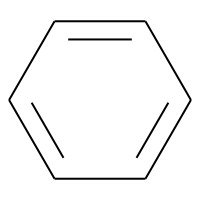
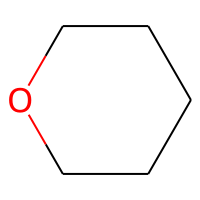
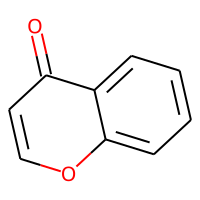
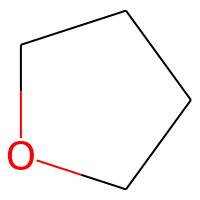
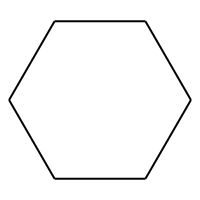
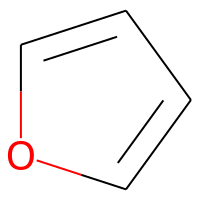
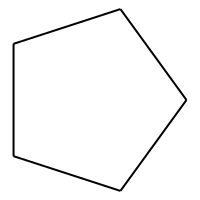
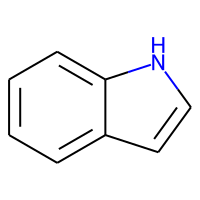
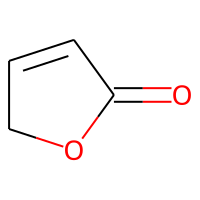
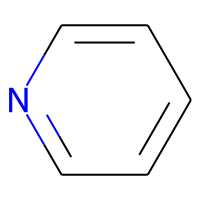
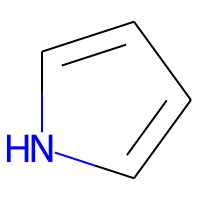
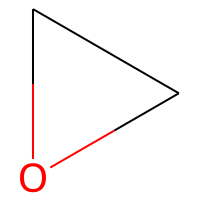
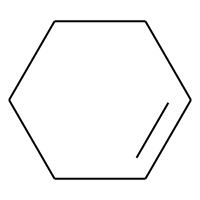
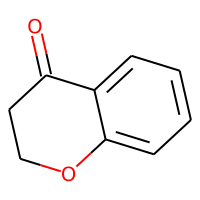
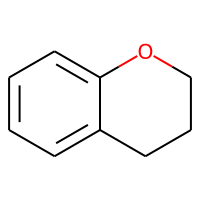
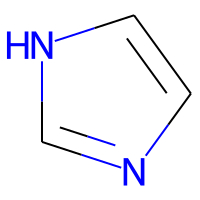
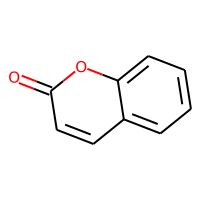
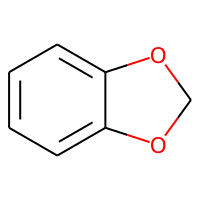
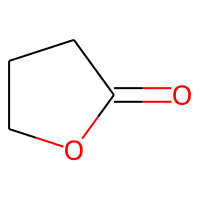
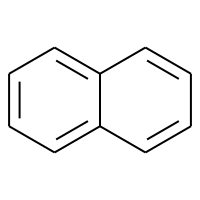
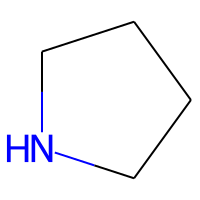
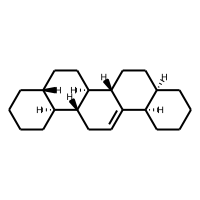
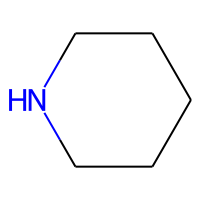
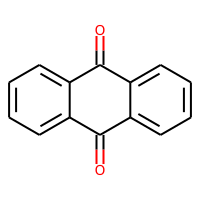
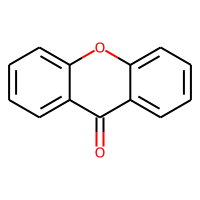
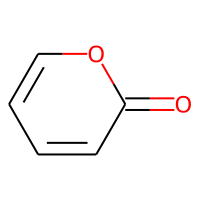
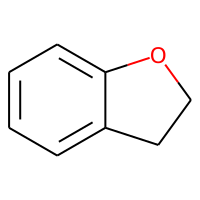
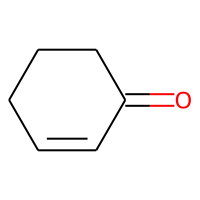
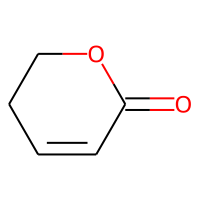
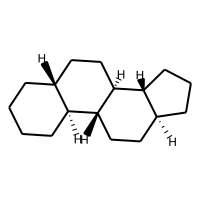

In [129]:
overlap_np_zinc_rings_stereo.head(30)

In [190]:
len(overlap_np_zinc_rings_stereo)

4210

In [192]:
len(overlap_np_zinc_rings_stereo[overlap_np_zinc_rings_stereo['nMol_stereoID']==1])

1529

In [195]:
len(overlap_np_zinc_rings_stereo[overlap_np_zinc_rings_stereo['nMol_stereoID']>=5])

1474

RingSmiles ring_stereoID  \
0                                               c1ccccc1          p1_3   
1                                               C1CCNCC1          p1_4   
2                                               c1ccncc1          p1_6   
3                                             c1cn[nH]c1         p1_32   
4                                               C1CNCCN1          p1_5   
...                                                  ...           ...   
53066  C1CC[C@H]2[C@@H]3CC[C@@H]4CCC[C@H]4[C@]34O[C@@...        p71_52   
53098                           O=C1OC[C@H]2CCCC[C@@H]12        p71_31   
53119    O=C1C=C2CC=C3[C@@H]4CCC[C@H]4CC[C@@H]3[C@H]2CC1      p158_184   
53120   O=C1C=C2CC=C3[C@@H]4CCC[C@H]4CC[C@@H]3[C@@H]2CC1      p158_183   
53121    O=C1C=C2CC=C3[C@H]4CCC[C@H]4CC[C@@H]3[C@@H]2CC1      p158_182   

       nMol_stereoID pMol_stereoID  \
0            6541981        74.42%   
1             917690        10.44%   
2             764020         8.69%   
3             496192         5.64%   
4             410872         4.67%   
...              ...           ...   
53066              1         0.00%   
53098              1         0.00%   
53119              1         0.00%   
53120              1         0.00%   
53121              1         0.00%   

                                            ringMolecule   rank  \
0      <img data-content="rdkit/molecule" src="data:i...      1   
1      <img data-content="rdkit/molecule" src="data:i...      2   
2      <img data-content="rdkit/molecule" src="data:i...      3   
3      <img data-content="rdkit/molecule" src="data:i...      4   
4      <img data-content="rdkit/molecule" src="data:i...      5   
...                                                  ...    ...   
53066  <img data-content="rdkit/molecule" src="data:i...  26910   
53098  <img data-content="rdkit/molecule" src="data:i...  26910   
53119  <img data-content="rdkit/molecule" src="data:i...  26910   
53120  <img data-content="rdkit/molecule" src="data:i...  26910   
53121  <img data-content="rdkit/molecule" src="data:i...  26910   

      rank_pMol_stereoID             ringSmiles_noStereo              source  \
0              1: 74.42%                        c1ccccc1  w/ stereochemistry   
1              2: 10.44%                        C1CCNCC1  w/ stereochemistry   
2               3: 8.69%                        c1ccncc1  w/ stereochemistry   
3               4: 5.64%                      c1cn[nH]c1  w/ stereochemistry   
4               5: 4.67%                        C1CNCCN1  w/ stereochemistry   
...                  ...                             ...                 ...   
53066       26910: 0.00%  C1CCC2C(C1)CC1OC13C1CCCC1CCC23  w/ stereochemistry   
53098       26910: 0.00%                 O=C1OCC2CCCCC12  w/ stereochemistry   
53119       26910: 0.00%   O=C1C=C2CC=C3C4CCCC4CCC3C2CC1  w/ stereochemistry   
53120       26910: 0.00%   O=C1C=C2CC=C3C4CCCC4CCC3C2CC1  w/ stereochemistry   
53121       26910: 0.00%   O=C1C=C2CC=C3C4CCCC4CCC3C2CC1  w/ stereochemistry   

                                 ringSmiles_noBondStereo  
0                                               c1ccccc1  
1                                               C1CCNCC1  
2                                               c1ccncc1  
3                                             c1cn[nH]c1  
4                                               C1CNCCN1  
...                                                  ...  
53066  C1CC[C@H]2[C@@H]3CC[C@@H]4CCC[C@H]4[C@]34O[C@@...  
53098                           O=C1OC[C@H]2CCCC[C@@H]12  
53119    O=C1C=C2CC=C3[C@@H]4CCC[C@H]4CC[C@@H]3[C@H]2CC1  
53120   O=C1C=C2CC=C3[C@@H]4CCC[C@H]4CC[C@@H]3[C@@H]2CC1  
53121    O=C1C=C2CC=C3[C@H]4CCC[C@H]4CC[C@@H]3[C@@H]2CC1  

[6098 rows x 10 columns]
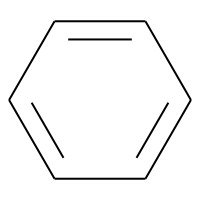
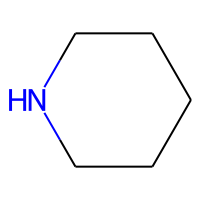
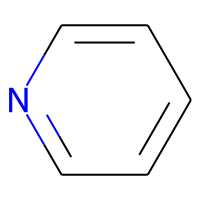
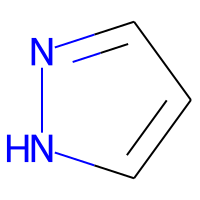
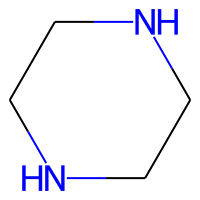
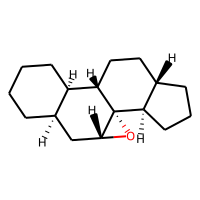
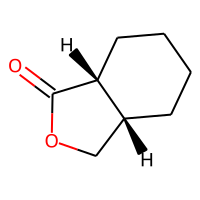
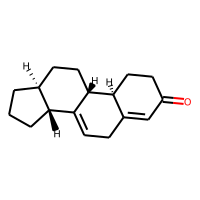
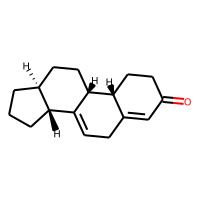
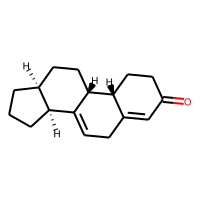

In [196]:
groupped = zincRings_Stereo.groupby('ringSmiles_noStereo')

np_smiles = list(npRings_Stereo.ringSmiles_noBondStereo)
np_smiles_noStereo = list(npRings_Stereo.ringSmiles_noStereo)

frames = []
for name, group in groupped:
    keep = 1
    smiles_list=list(group.ringSmiles_noBondStereo)
    smiles_noStereo_list = list(group.ringSmiles_noStereo)
    for a,b in zip(smiles_list,smiles_noStereo_list):
        for x,y in zip(np_smiles,np_smiles_noStereo):
            if b == y:
                if superpose(Chem.MolFromSmiles(a),Chem.MolFromSmiles(x)):
                    keep = 0
    if keep ==1:
        frames.append(group)

zincRings_notnp = pd.concat(frames)

overlap_zinc_np_rings_stereo = zincRings_Stereo[~zincRings_Stereo['ring_stereoID'].isin(set(zincRings_notnp.ring_stereoID))]

overlap_zinc_np_rings_stereo

In [197]:
len(overlap_zinc_np_rings_stereo)

6098

In [198]:
len(overlap_zinc_np_rings_stereo[overlap_zinc_np_rings_stereo['nMol_stereoID']==1])

1745

In [199]:
len(overlap_zinc_np_rings_stereo[overlap_zinc_np_rings_stereo['nMol_stereoID']>=5])

2589

In [204]:
del overlap_np_zinc_rings_stereo['top5_noStereo']
overlap_np_zinc_rings_stereo.columns

Index(['RingSmiles', 'ring_stereoID', 'nMol_stereoID', 'pMol_stereoID',
       'ringMolecule', 'rank', 'rank_pMol_stereoID', 'source',
       'ringSmiles_noStereo', 'ringSmiles_noBondStereo'],
      dtype='object')

In [203]:
overlap_zinc_np_rings_stereo.columns

Index(['RingSmiles', 'ring_stereoID', 'nMol_stereoID', 'pMol_stereoID',
       'ringMolecule', 'rank', 'rank_pMol_stereoID', 'ringSmiles_noStereo',
       'source', 'ringSmiles_noBondStereo'],
      dtype='object')

In [215]:
overlap_np_zinc_rings_stereo['db'] = 'np'
overlap_zinc_np_rings_stereo['db'] = 'zinc'

<ipython-input-215-6b048e1aad3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overlap_np_zinc_rings_stereo['db'] = 'np'
<ipython-input-215-6b048e1aad3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overlap_zinc_np_rings_stereo['db'] = 'zinc'


In [216]:
PandasTools.WriteSDF(overlap_np_zinc_rings_stereo, resultsFolder+'overlap_np_zinc_rings_stereo.sdf', 
                     molColName='ringMolecule', idName='ring_stereoID', 
                     properties=list(overlap_np_zinc_rings_stereo.columns), allNumeric=False)

In [217]:
PandasTools.WriteSDF(overlap_zinc_np_rings_stereo, resultsFolder+'overlap_zinc_np_rings_stereo.sdf', 
                     molColName='ringMolecule', idName='ring_stereoID', 
                     properties=list(overlap_zinc_np_rings_stereo.columns), allNumeric=False)

### Ring systems exclusive to natural products

In [78]:
len(npRings_notZinc),len(npRings_notZinc)/len(npRings_Stereo)

(34452, 0.8911075474626248)

In [79]:
npRings_notZinc_top = npRings_notZinc.sort_values('nMol_stereoID',ascending=False).head(51)

RingSmiles ring_stereoID  \
181  C1=C2CCCC[C@@H]2[C@H]2CC[C@H]3[C@@H](C[C@@H]4O...        p10_70   
163                              C1=CC2CC3CNCCC3CC2NC1       p43_127   
113                             C1=CCNCCc2cccc(c2)CCC1       p151_50   
61                                C1=CN2CNCC2C2CCCCC12        p50_24   
182  C1C[C@H]2CN[C@@H]3[C@@H]4C[C@H]2[C@@]3(C1)[C@@...        p9_207   
114                 C1CC[C@@]23C[C@@H](CC[C@@H]2C1)CO3        p8_342   
138                              C1CCC2OC3CCCCCC3C2CC1        p91_61   
86                                            C1CCOOC1        p1_320   
176                C=C1C(=O)O[C@@H]2C=CCCC=CCC[C@@H]12      p134_152   
132                           C=C1C2C=CCC1C1(CCCC1)CC2       p151_51   
149                            C=C1C=CC=CCOCC#CCC=CCC1        p63_64   
115                           C=C1C=COc2cc3c(cc21)CCO3        p90_41   
83                                  C=C1CCCC2(CCCC2)C1       p44_109   
112                         C=C1CCC[C@@H]2CCCC[C@@H]12       p41_119   
144                           C=C1CCC[C@H]2CCCC[C@H]12       p41_120   
188  O=C1C=C2CCCC3(CCCC3)C2CCCCc2cccc(c2)CCCCNC2C(=...        p63_65   
180                                   O=C1CCC2CCCNC2C1       p92_116   
131  O=C1CCOC(=O)CNC(=O)CNC(=O)CN2CCC[C@H](NC(=O)CN...        p6_202   
172                          O=C1CCOc2cc3c(cc21)C=CCO3        p16_27   
102                        O=C1CCc2ccccc2CC#CC12CCCCC2       p92_149   
106                                    O=C1NCNC2NCNC12        p44_71   
179                   O=C1OCCCOC(=O)c2ccccc2-c2ccccc21        p75_28   
90                             O=C1Oc2ccccc2Oc2ccccc21       p57_101   
184                            O=c1ccoc2cc3c(cc12)CCO3       p18_193   
126                              c1cc2c(cn1)CSSCCCCCC2        p44_61   
122              c1cc2c3c(c1)CNc1cc4c(c(c1-3)CC2)CCCO4       p82_167   
50                                  c1cc2c[nH]cc2[nH]1        p51_14   
117                   c1ccc2c(c1)CCCCc1cc3c(cc1-2)OCO3        p30_10   
109                      c1ccc2c(c1)CCc1c-2ccc2c1CCCO2       p15_233   
128                     c1ccc2cc3c(ccc4[nH]ccc43)cc2c1       p119_19   

     nMol_stereoID pMol_stereoID  \
181            118         0.04%   
163            129         0.05%   
113            191         0.07%   
61             357         0.13%   
182            117         0.04%   
114            189         0.07%   
138            152         0.06%   
86             255         0.09%   
176            120         0.04%   
132            158         0.06%   
149            142         0.05%   
115            184         0.07%   
83             263         0.10%   
112            194         0.07%   
144            148         0.05%   
188            114         0.04%   
180            118         0.04%   
131            158         0.06%   
172            123         0.05%   
102            206         0.08%   
106            204         0.08%   
179            118         0.04%   
90             231         0.09%   
184            116         0.04%   
126            163         0.06%   
122            172         0.06%   
50             506         0.19%   
117            180         0.07%   
109            197         0.07%   
128            162         0.06%   

                                          ringMolecule  rank  \
181  <img data-content="rdkit/molecule" src="data:i...   179   
163  <img data-content="rdkit/molecule" src="data:i...   164   
113  <img data-content="rdkit/molecule" src="data:i...   114   
61   <img data-content="rdkit/molecule" src="data:i...    62   
182  <img data-content="rdkit/molecule" src="data:i...   183   
114  <img data-content="rdkit/molecule" src="data:i...   115   
138  <img data-content="rdkit/molecule" src="data:i...   139   
86   <img data-content="rdkit/molecule" src="data:i...    87   
176  <img data-content="rdkit/molecule" src="data:i...   177   
132  <img data-content="rdkit/molecule" src="data:i...
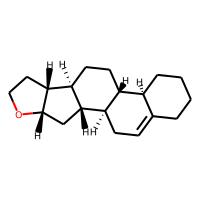
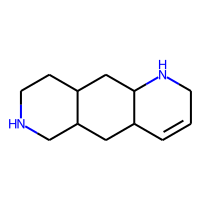
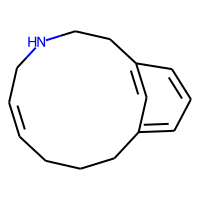
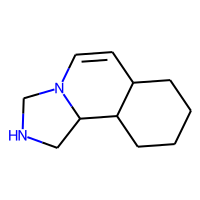
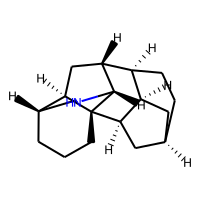
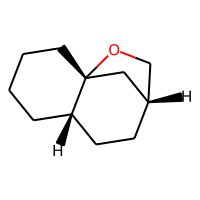
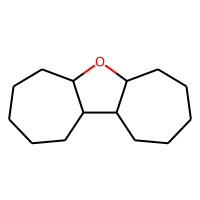
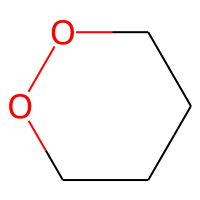
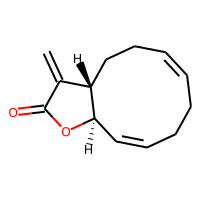
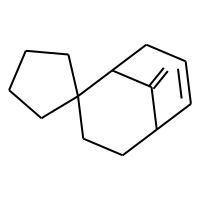
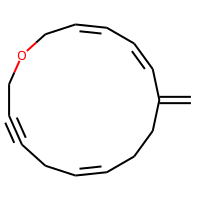
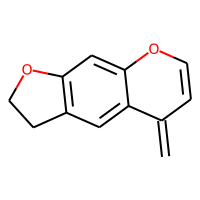
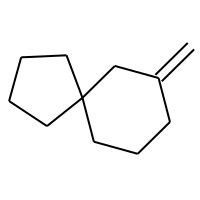
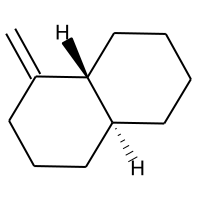
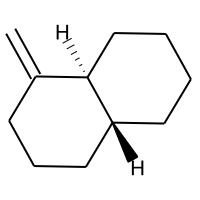
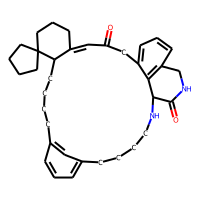
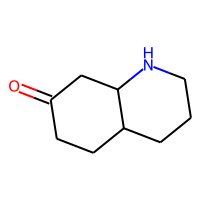
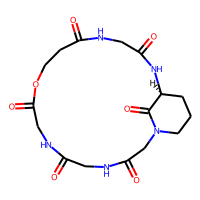
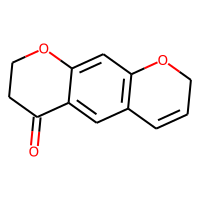
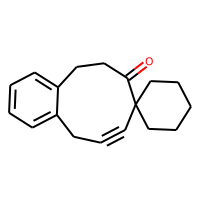
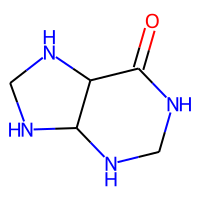
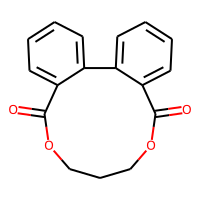
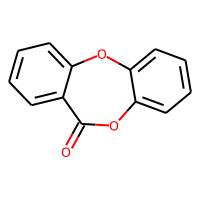
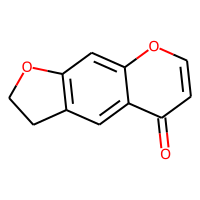
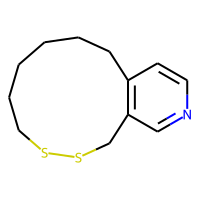
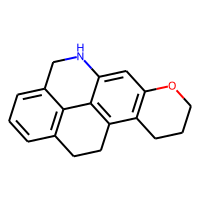
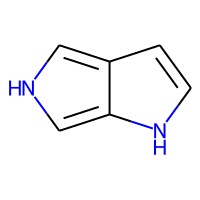
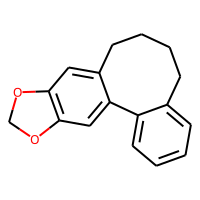
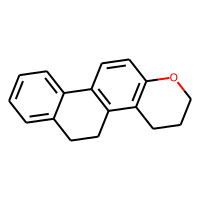
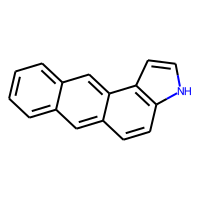

In [80]:
npRings_notZinc_top.head(30).sort_values('ringSmiles_noStereo')

In [88]:
list(npRings_notZinc_top.head(30).RingSmiles)

['c1cc2c[nH]cc2[nH]1',
 'C1=CN2CNCC2C2CCCCC12',
 'C=C1CCCC2(CCCC2)C1',
 'C1CCOOC1',
 'O=C1Oc2ccccc2Oc2ccccc21',
 'O=C1CCc2ccccc2CC#CC12CCCCC2',
 'O=C1NCNC2NCNC12',
 'c1ccc2c(c1)CCc1c-2ccc2c1CCCO2',
 'C=C1CCC[C@@H]2CCCC[C@@H]12',
 'C1=CCNCCc2cccc(c2)CCC1',
 'C1CC[C@@]23C[C@@H](CC[C@@H]2C1)CO3',
 'C=C1C=COc2cc3c(cc21)CCO3',
 'c1ccc2c(c1)CCCCc1cc3c(cc1-2)OCO3',
 'c1cc2c3c(c1)CNc1cc4c(c(c1-3)CC2)CCCO4',
 'c1cc2c(cn1)CSSCCCCCC2',
 'c1ccc2cc3c(ccc4[nH]ccc43)cc2c1',
 'C=C1C2C=CCC1C1(CCCC1)CC2',
 'O=C1CCOC(=O)CNC(=O)CNC(=O)CN2CCC[C@H](NC(=O)CN1)C2=O',
 'C1CCC2OC3CCCCCC3C2CC1',
 'C=C1CCC[C@H]2CCCC[C@H]12',
 'C=C1C=CC=CCOCC#CCC=CCC1',
 'C1=CC2CC3CNCCC3CC2NC1',
 'O=C1CCOc2cc3c(cc21)C=CCO3',
 'C=C1C(=O)O[C@@H]2C=CCCC=CCC[C@@H]12',
 'O=C1OCCCOC(=O)c2ccccc2-c2ccccc21',
 'C1=C2CCCC[C@@H]2[C@H]2CC[C@H]3[C@@H](C[C@@H]4OCC[C@@H]43)[C@@H]2C1',
 'O=C1CCC2CCCNC2C1',
 'C1C[C@H]2CN[C@@H]3[C@@H]4C[C@H]2[C@@]3(C1)[C@@H]1C[C@@H]2CC[C@H]4[C@H]1C2',
 'O=c1ccoc2cc3c(cc12)CCO3',
 'O=C1C=C2CCCC3(CCCC3)C2CCCCc2cccc(c

In [161]:
from rdkit.Chem import rdDepictor

for mol in list(npRings_notZinc_top.ringMolecule)[:30]:
    rdDepictor.SetPreferCoordGen(True)
    rdDepictor.Compute2DCoords(mol)

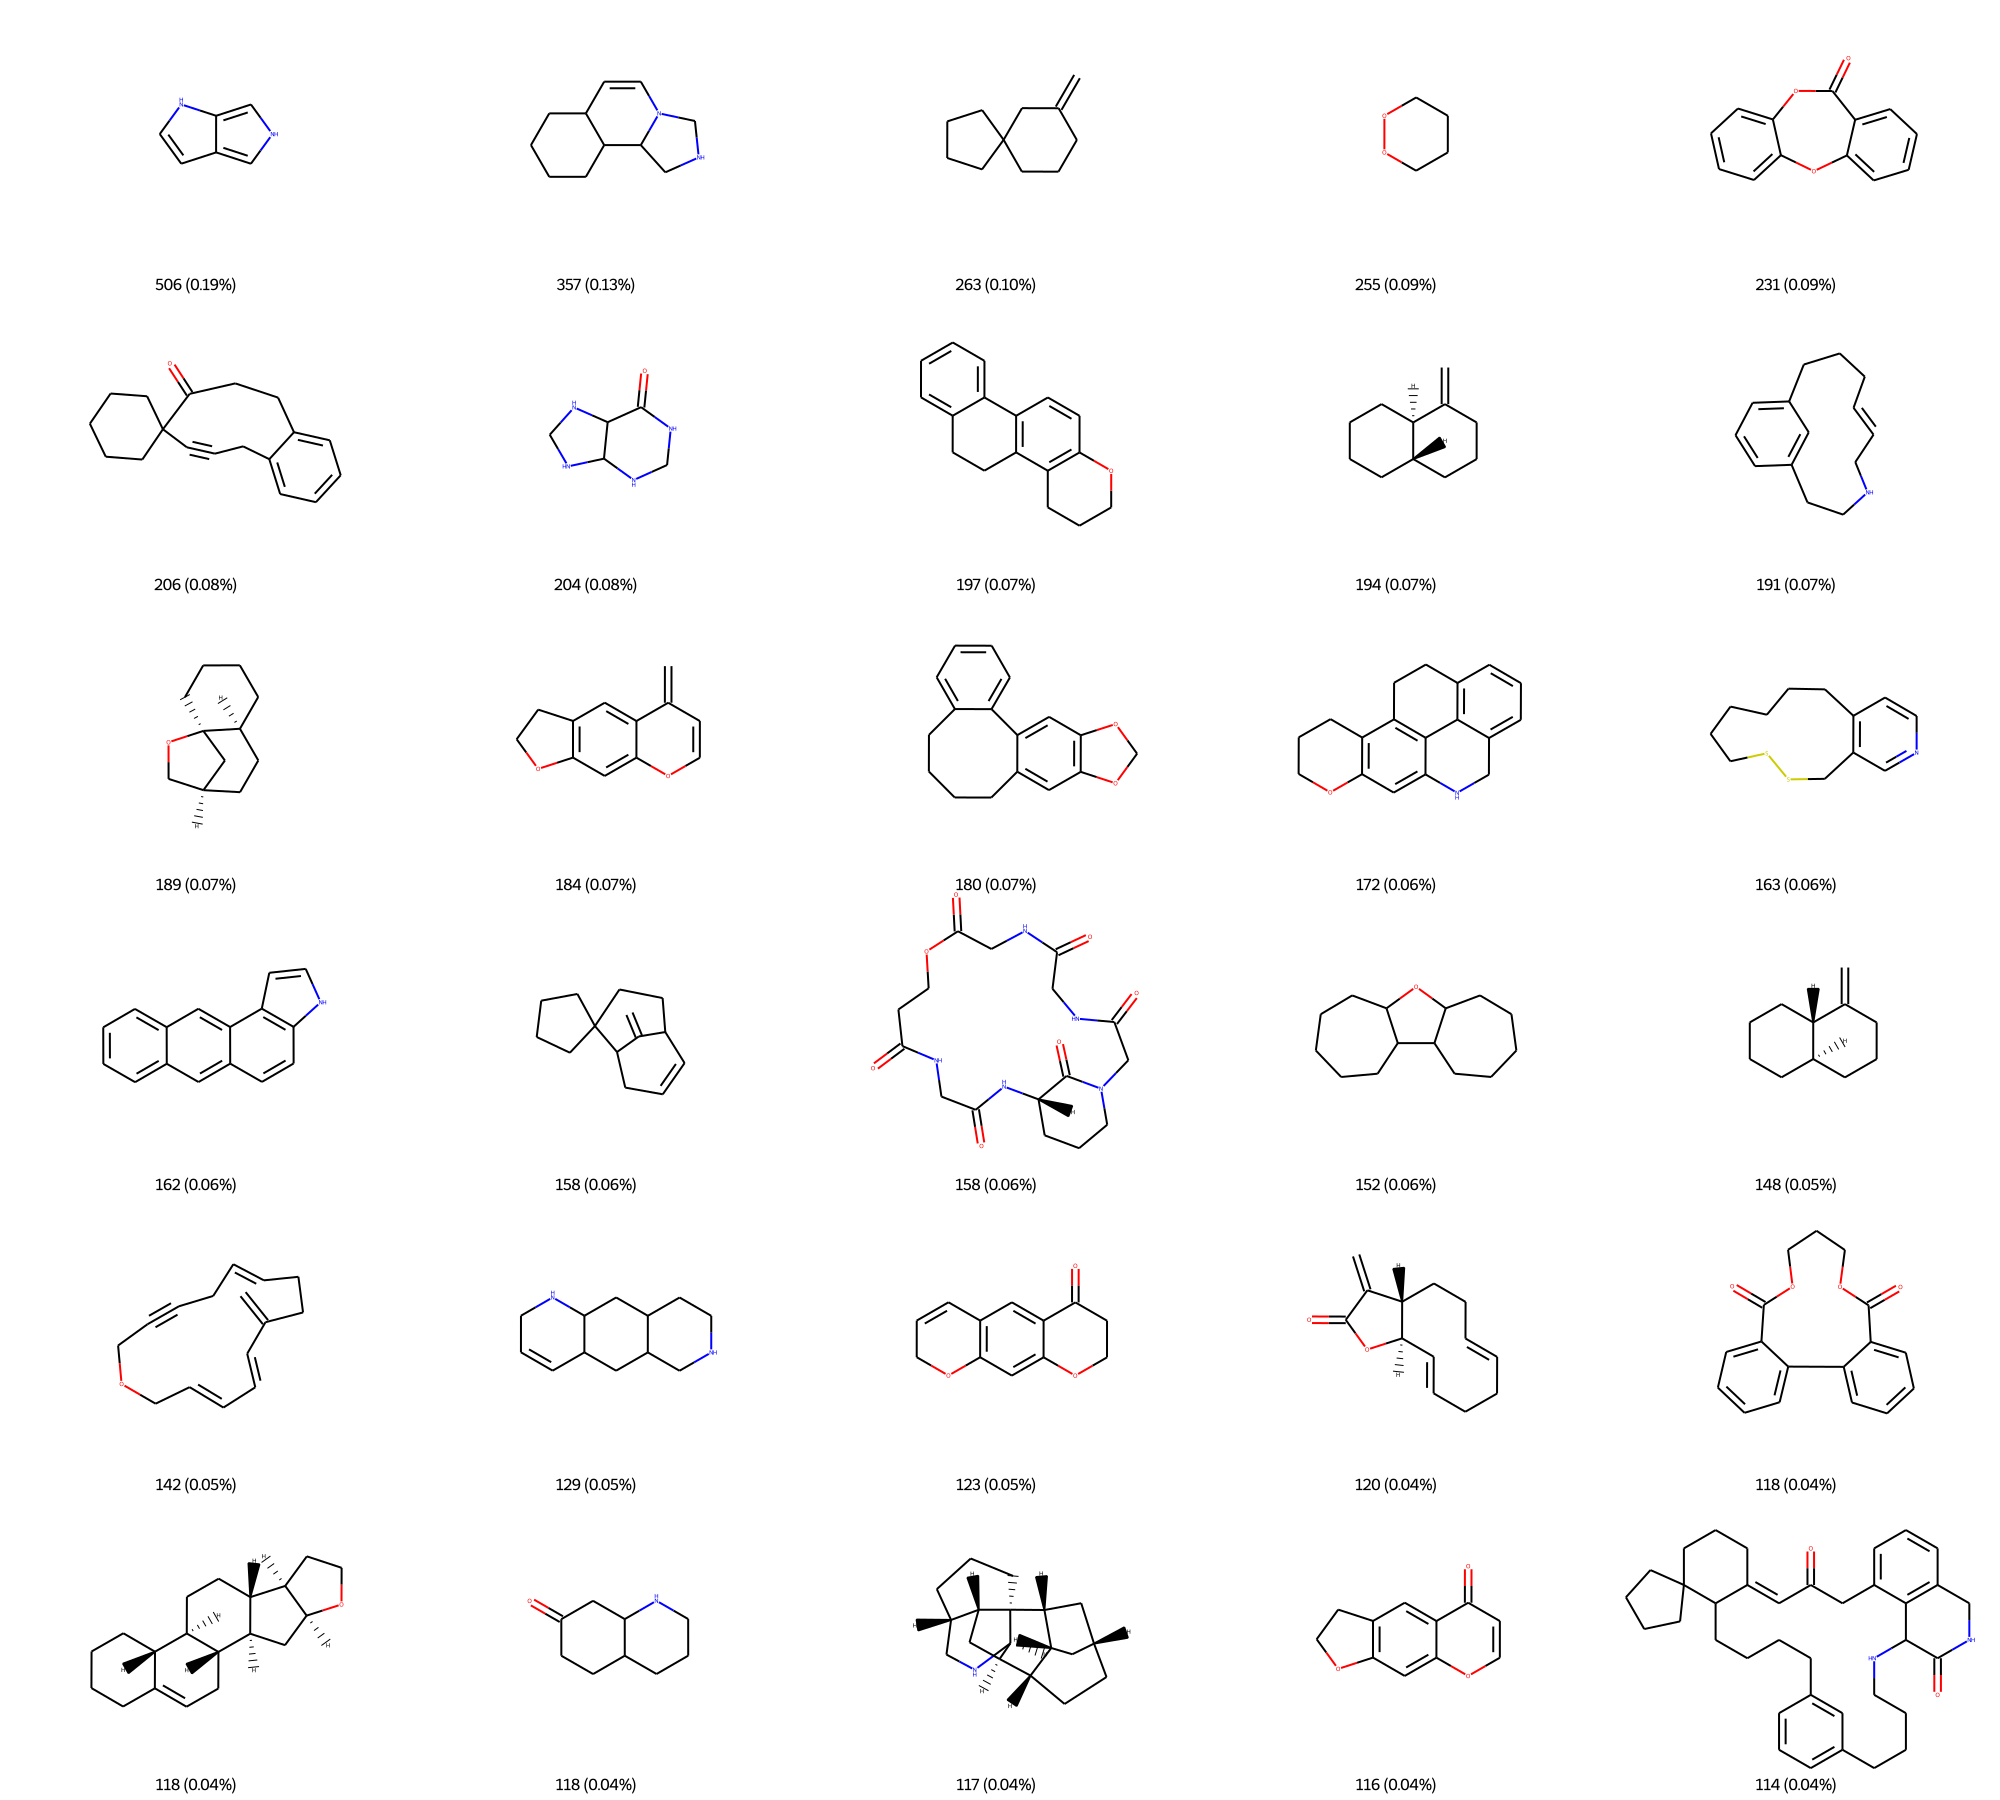

In [311]:
Draw.MolsToGridImage(list(npRings_notZinc_top.ringMolecule)[:30],
                    legends=[str(i)+' ('+str(j)+')' for i,j in zip(list(npRings_notZinc_top.nMol_stereoID),list(npRings_notZinc_top.pMol_stereoID))][:30], 
                     molsPerRow=5,subImgSize=(400,300))

In [163]:
# write down file for chemdraw
PandasTools.WriteSDF(npRings_notZinc_top[:30], resultsFolder+'npRings_notZinc_top_coorGen.sdf', molColName='ringMolecule', idName='ring_stereoID', properties=list(npRings_notZinc_top.columns), allNumeric=False)

## number of singletons

In [185]:
len(npRings_noStereo[npRings_noStereo['nMol_conID']==1])

16450

In [186]:
len(zincRings_noStereo[zincRings_noStereo['nMol_conID']==1])

15350

In [184]:
len(npRings_Stereo[npRings_Stereo['nMol_stereoID']==1])

23299

In [183]:
len(zincRings_Stereo[zincRings_Stereo['nMol_stereoID']==1])

26320

## number of macrocycles

In [187]:
from rdkit.Chem import MolFromSmarts

def macrocycle(mol):
    if mol.HasSubstructMatch(MolFromSmarts('[r;!r3;!r4;!r5;!r6;!r7;!r8;!r9;!r10;!r11]')):
        return 1
    else:
        return 0

In [188]:
npRings_noStereo['macrocycle'] = npRings_noStereo.apply(lambda row: macrocycle(row.ringMolecule),axis=1)

In [189]:
len(npRings_noStereo[npRings_noStereo['macrocycle']==1])

6619

In [190]:
zincRings_noStereo['macrocycle'] = zincRings_noStereo.apply(lambda row: macrocycle(row.ringMolecule),axis=1)

In [191]:
len(zincRings_noStereo[zincRings_noStereo['macrocycle']==1])

1388

In [192]:
npRings_Stereo['macrocycle'] = npRings_Stereo.apply(lambda row: macrocycle(row.ringMolecule),axis=1)

In [193]:
len(npRings_Stereo[npRings_Stereo['macrocycle']==1])

7597

In [194]:
zincRings_Stereo['macrocycle'] = zincRings_Stereo.apply(lambda row: macrocycle(row.ringMolecule),axis=1)

In [196]:
len(zincRings_Stereo[zincRings_Stereo['macrocycle']==1])

1636

## histogram 

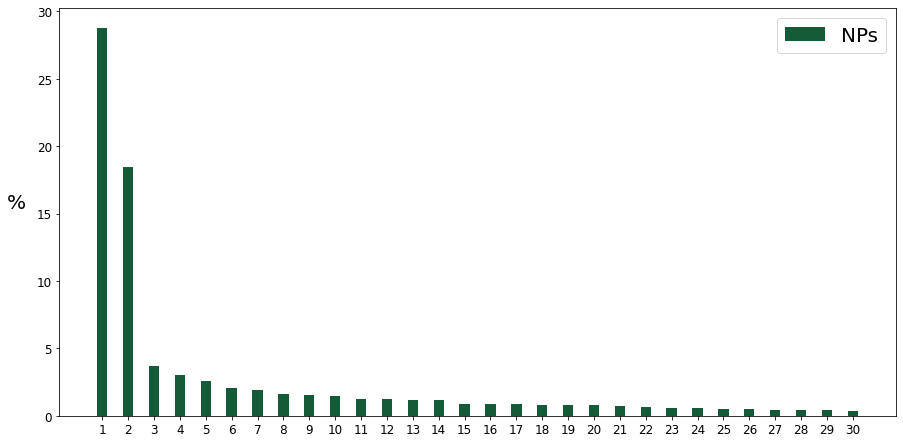

In [60]:
figure, axes = plt.subplots(figsize=(15, 7.5))

NP_heights_fraction = npRings_Stereo['nMol_stereoID'].astype(int).head(30)/269226*100
bins = np.linspace(1,30,30)

# set x-axis here and adapt it if needed
x_axis = list(range(1,31))

axes.bar(bins,NP_heights_fraction,0.4,label='NPs',color='#145c37')
axes.tick_params(labelsize=12)
axes.set_ylabel('%', rotation=0, labelpad=20, fontsize=20)
axes.set_xticks(x_axis)
# axes.set_xlim(left=-1, right=30)  # set the limit of the x-axis here
axes.legend(fontsize=20)
#plt.savefig('/data/local/ringsys/202112_figures/his_compare_prevalance.png')
plt.show()

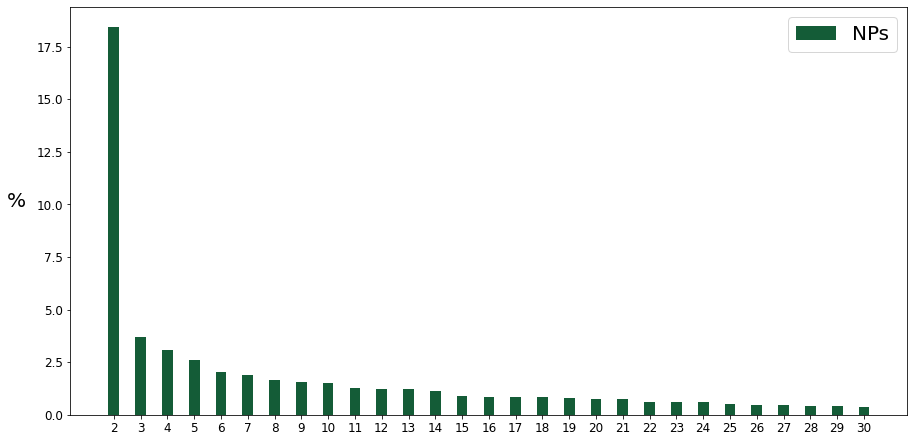

In [58]:
figure, axes = plt.subplots(figsize=(15, 7.5))

NP_heights_fraction = npRings_Stereo['nMol_stereoID'].astype(int).head(30)/269226*100
bins = np.linspace(2,30,29)

# set x-axis here and adapt it if needed
x_axis = list(range(2,31))

axes.bar(bins,NP_heights_fraction[1:],0.4,label='NPs',color='#145c37')
axes.tick_params(labelsize=12)
axes.set_ylabel('%', rotation=0, labelpad=20, fontsize=20)
axes.set_xticks(x_axis)
# axes.set_xlim(left=-1, right=30)  # set the limit of the x-axis here
axes.legend(fontsize=20)
#plt.savefig('/data/local/ringsys/202112_figures/his_compare_prevalance.png')
plt.show()

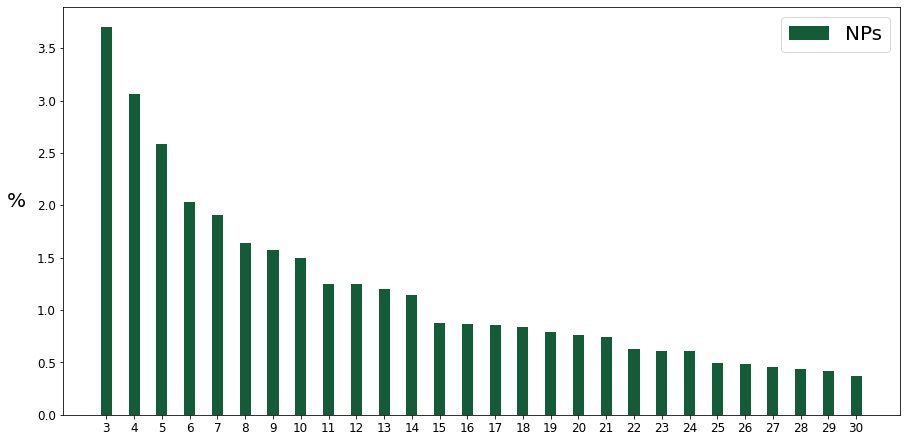

In [61]:
figure, axes = plt.subplots(figsize=(15, 7.5))

NP_heights_fraction = npRings_Stereo['nMol_stereoID'].astype(int).head(30)/269226*100
bins = np.linspace(3,30,28)

# set x-axis here and adapt it if needed
x_axis = list(range(3,31))

axes.bar(bins,NP_heights_fraction[2:],0.4,label='NPs',color='#145c37')
axes.tick_params(labelsize=12)
axes.set_ylabel('%', rotation=0, labelpad=20, fontsize=20)
axes.set_xticks(x_axis)
# axes.set_xlim(left=-1, right=30)  # set the limit of the x-axis here
axes.legend(fontsize=20)
#plt.savefig('/data/local/ringsys/202112_figures/his_compare_prevalance.png')
plt.show()

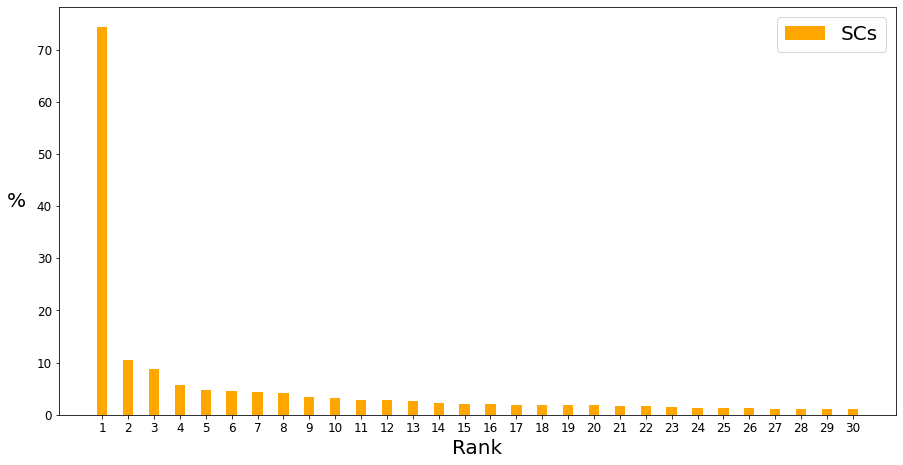

In [62]:
figure, axes = plt.subplots(figsize=(15, 7.5))

SC_heights_fraction = zincRings_Stereo['nMol_stereoID'].astype(int).head(30)/8790153*100
bins = np.linspace(1,30,30)

# set x-axis here and adapt it if needed
x_axis = list(range(1,31))

axes.bar(bins,SC_heights_fraction,0.4,label='SCs',color='#ffa600')
axes.tick_params(labelsize=12)
axes.set_ylabel('%', rotation=0, labelpad=20, fontsize=20)
axes.set_xlabel('Rank', fontsize=20)
axes.set_xticks(x_axis)
# axes.set_xlim(left=-1, right=30)  # set the limit of the x-axis here
axes.legend(fontsize=20)
#plt.savefig('/data/local/ringsys/202112_figures/his_compare_prevalance.png')
plt.show()

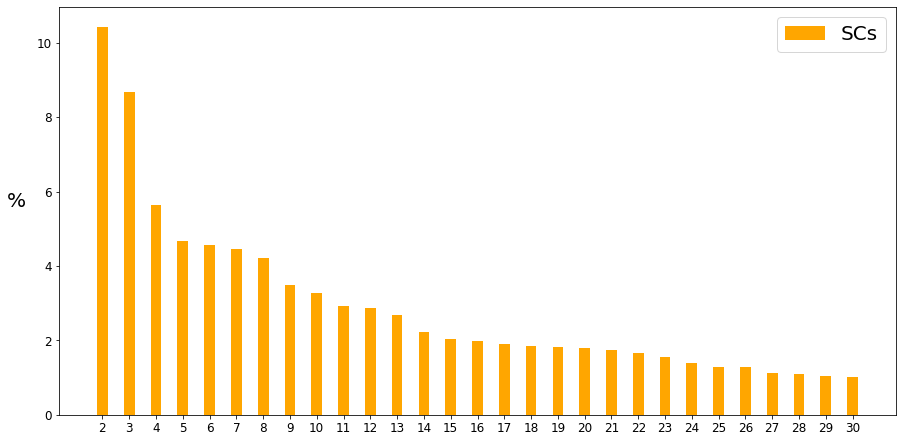

In [63]:
figure, axes = plt.subplots(figsize=(15, 7.5))

SC_heights_fraction = zincRings_Stereo['nMol_stereoID'].astype(int).head(30)/8790153*100
bins = np.linspace(2,30,29)

# set x-axis here and adapt it if needed
x_axis = list(range(2,31))

axes.bar(bins,SC_heights_fraction[1:],0.4,label='SCs',color='#ffa600')
axes.tick_params(labelsize=12)
axes.set_ylabel('%', rotation=0, labelpad=20, fontsize=20)
#axes.set_xlabel('Rank', fontsize=20)
axes.set_xticks(x_axis)
# axes.set_xlim(left=-1, right=30)  # set the limit of the x-axis here
axes.legend(fontsize=20)
#plt.savefig('/data/local/ringsys/202112_figures/his_compare_prevalance.png')
plt.show()

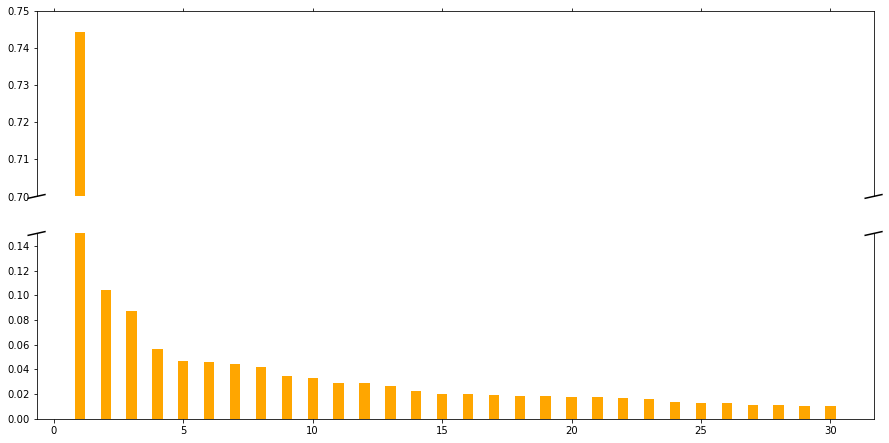

In [41]:
figure, (ax,ax2) = plt.subplots(2,1, sharex=True, figsize=(15, 7.5))

SC_heights_fraction = zincRings_Stereo['nMol_stereoID'].astype(int).head(30)/8790153
bins = np.linspace(1,30,30)

# set x-axis here and adapt it if needed
x_axis = list(range(1,31))

ax.bar(bins,SC_heights_fraction,0.4,label='SCs',color='#ffa600')
ax2.bar(bins,SC_heights_fraction,0.4,label='SCs',color='#ffa600')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(0.7,0.75)
ax2.set_ylim(0,0.15)

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


axes.tick_params(labelsize=12)
axes.set_ylabel('Percentage', fontsize=20)
axes.set_xlabel('Rank', fontsize=20)
axes.set_xticks(x_axis)
# axes.set_xlim(left=-1, right=30)  # set the limit of the x-axis here
axes.legend(fontsize=20)
#plt.savefig('/data/local/ringsys/202112_figures/his_compare_prevalance.png')
plt.show()

## histogram to compare precentages

In [134]:
np_sc_merge = npRings_Stereo.merge(zincRings_Stereo,on='RingSmiles')

RingSmiles ring_stereoID_x  \
0                                            c1ccccc1           p1_10   
1                                            C1CCOCC1           p1_67   
2                                    O=c1ccoc2ccccc12          p1_147   
3                                             C1CCOC1           p1_63   
4                                            C1CCCCC1          p1_161   
5                                             c1ccoc1           p1_35   
6                                             C1CCCC1          p1_132   
7                                    c1ccc2[nH]ccc2c1          p1_162   
8                                          O=C1C=CCO1          p1_145   
9                                            c1ccncc1          p2_276   
10                                         c1cc[nH]c1          p2_146   
11                                              C1CO1           p1_36   
12                                          C1=CCCCC1           p1_62   
13                                   O=C1CCOc2ccccc21          p1_148   
14                                   c1ccc2c(c1)CCCO2           p3_10   
15                                         c1c[nH]cn1          p6_213   
16                                   O=c1ccc2ccccc2o1          p2_277   
17                                    c1ccc2c(c1)OCO2          p3_126   
18                                          O=C1CCCO1           p2_85   
19                                     c1ccc2ccccc2c1          p10_23   
20                                            C1CCNC1           p3_68   
21  C1=C2[C@@H](CC[C@H]3CCCC[C@@H]23)[C@@H]2CC[C@H...           p7_28   
22                                           C1CCNCC1          p4_344   
23                         O=C1c2ccccc2C(=O)c2ccccc21           p6_75   
24                             O=c1c2ccccc2oc2ccccc12          p5_101   
25                                         O=c1cccco1          p1_146   
26                                    c1ccc2c(c1)CCO2          p3_247   
27                                        O=C1C=CCCC1          p1_149   
28                                        O=C1C=CCCO1          p1_323   
29  C1CC[C@@H]2CC[C@H]3[C@@H]4CCC[C@H]4CC[C@@H]3[C...          p2_203   

    nMol_stereoID_x pMol_stereoID_x  \
0             77523          28.79%   
1             49694          18.46%   
2              9983           3.71%   
3              8237           3.06%   
4              6974           2.59%   
5              5484           2.04%   
6              5133           1.91%   
7              4429           1.65%   
8              4232           1.57%   
9              4031           1.50%   
10             3369           1.25%   
11             3362           1.25%   
12             3244           1.20%   
13             3085           1.15%   
14             2363           0.88%   
15             2341           0.87%   
16             2302           0.86%   
17             2247           0.83%   
18             2130           0.79%   
19             2057           0.76%   
20             2001           0.74%   
21             1687           0.63%   
22             1644           0.61%   
23             1628           0.60%   
24             1322           0.49%   
25             1302           0.48%   
26             1220           0.45%   
27             1171           0.43%   
28             1131           0.42%   
29              992           0.37%   

                                       ringMolecule_x  rank_x  \
0   <img data-content="rdkit/molecule" src="data:i...       1   
1   <img data-content="rdkit/molecule" src="data:i...       2   
2   <img data-content="rdkit/molecule" src="data:i...       3   
3   <img data-content="rdkit/molecule" src="data:i...       4   
4   <img data-content="rdkit/molecule" src="data:i...       5   
5   <img data-content="rdkit/molecule" src="data:i...       6   
6   <img data-content="rdkit/molecule" src="data:i...       7   
7   <img data-content="rdkit/molecule" src="data:
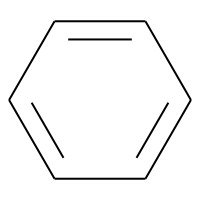
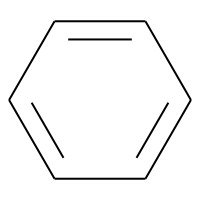
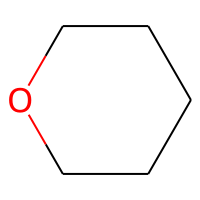
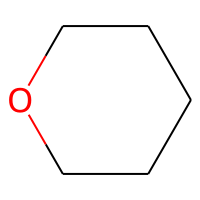
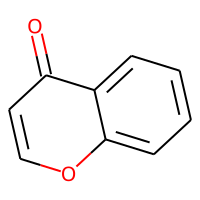
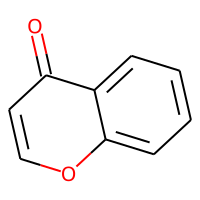
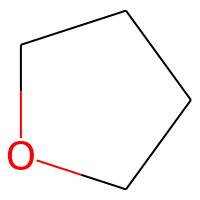
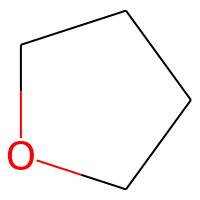
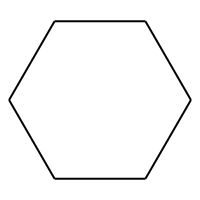
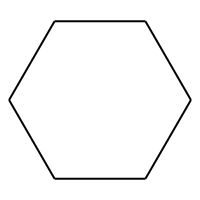
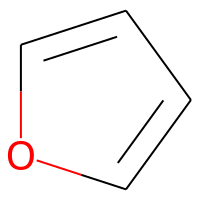
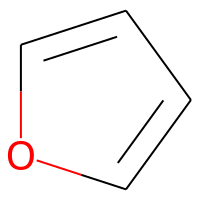
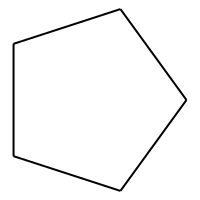
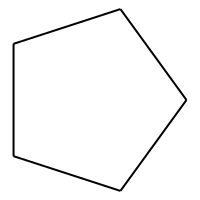
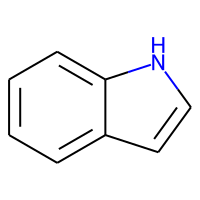
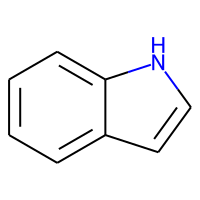
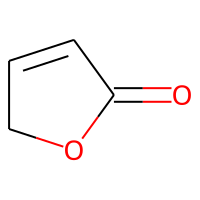
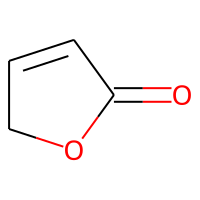
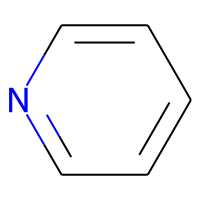
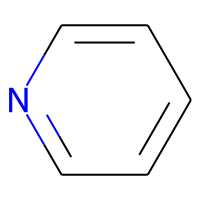
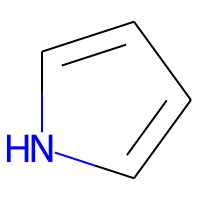
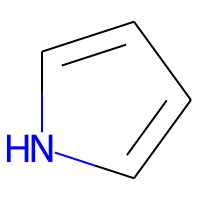
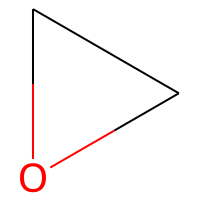
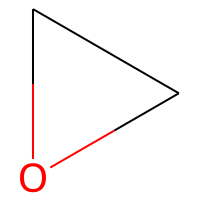
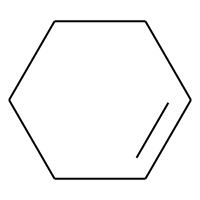
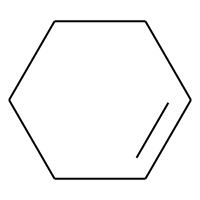
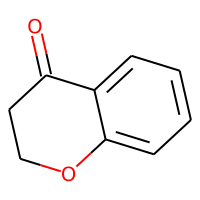
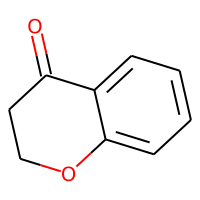
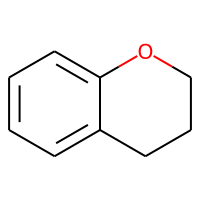
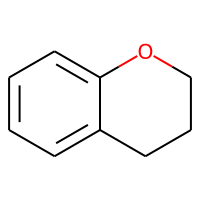
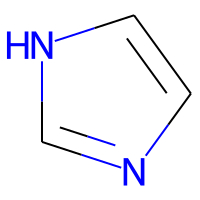
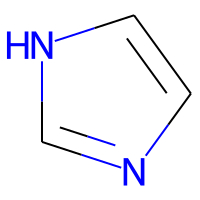
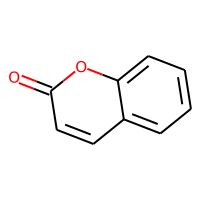
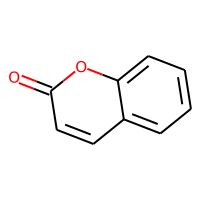
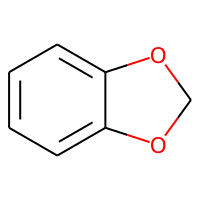
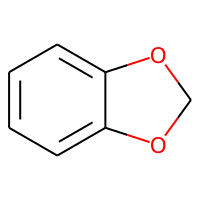
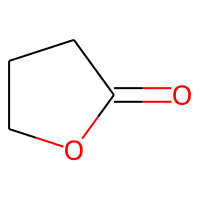
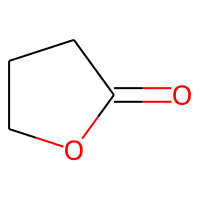
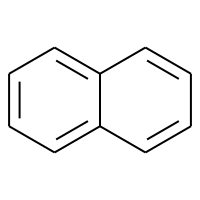
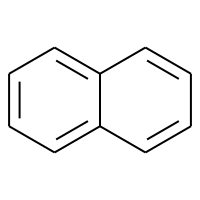
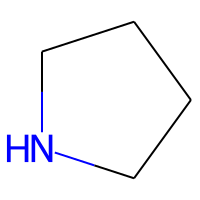
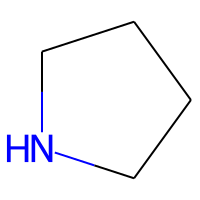
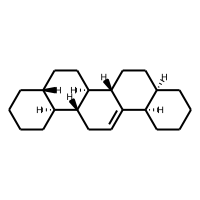
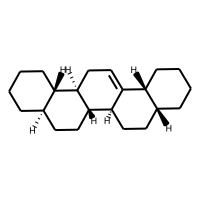
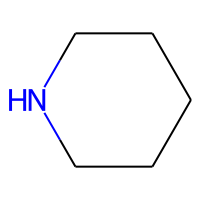
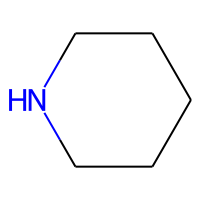
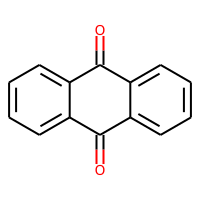
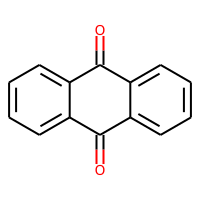
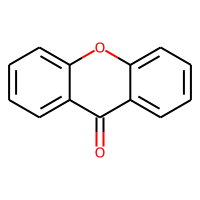
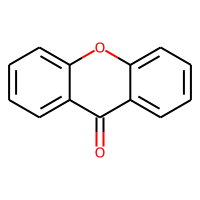
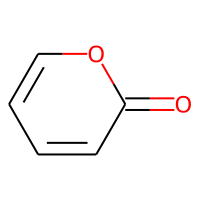
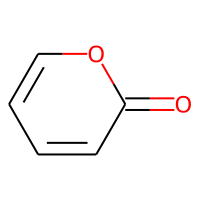
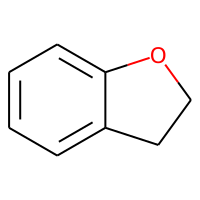
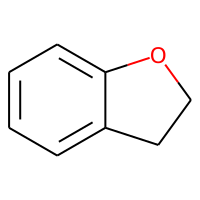
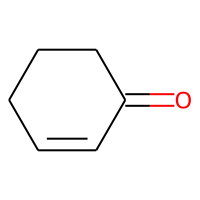
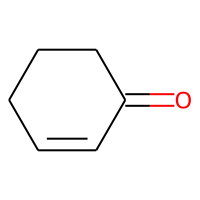
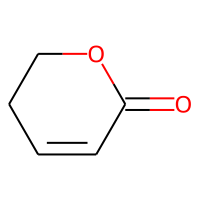
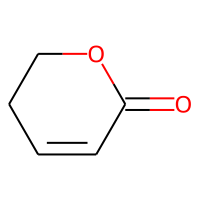
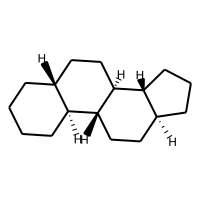
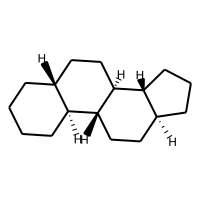

In [135]:
np_sc_merge.head(30)

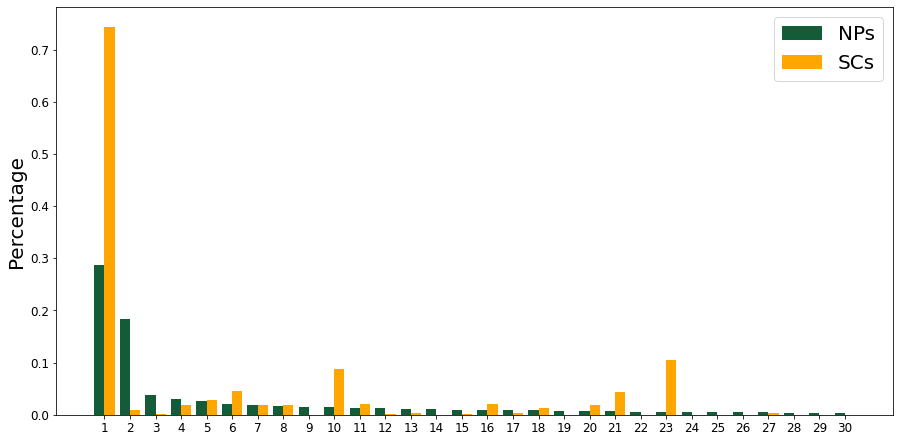

In [199]:
figure, axes = plt.subplots(figsize=(15, 7.5))

NP_heights_fraction = np_sc_merge['nMol_stereoID_x'].astype(int).head(30)/269226
ZINC_heights_fraction = np_sc_merge['nMol_stereoID_y'].astype(int).head(30)/8790153
bins = np.linspace(1,30,30)

# set x-axis here and adapt it if needed
x_axis = list(range(1,31))

axes.bar(bins-0.4/2,NP_heights_fraction,0.4,label='NPs',color='#145c37')
axes.bar(bins+0.4/2,ZINC_heights_fraction,0.4,label='SCs',color='#ffa600')
axes.tick_params(labelsize=12)
axes.set_ylabel('Percentage', fontsize=20)
axes.set_xticks(x_axis)
# axes.set_xlim(left=-1, right=30)  # set the limit of the x-axis here
axes.legend(fontsize=20)
#plt.savefig('/data/local/ringsys/202112_figures/his_compare_prevalance.png')
plt.show()

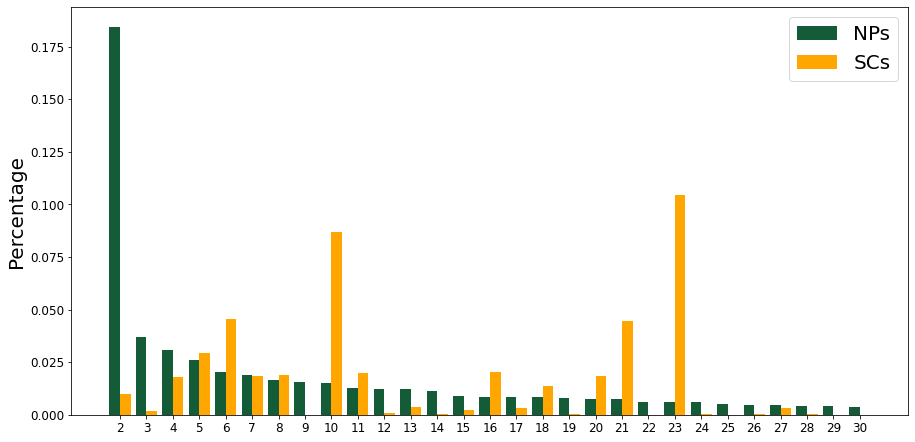

In [206]:
figure, axes = plt.subplots(figsize=(15, 7.5))

NP_heights_fraction = np_sc_merge['nMol_stereoID_x'].astype(int).head(30)/269226
ZINC_heights_fraction = np_sc_merge['nMol_stereoID_y'].astype(int).head(30)/8790153
bins = np.linspace(2,30,29)

# set x-axis here and adapt it if needed
x_axis = list(range(2,31))

axes.bar(bins-0.4/2,NP_heights_fraction[1:],0.4,label='NPs',color='#145c37')
axes.bar(bins+0.4/2,ZINC_heights_fraction[1:],0.4,label='SCs',color='#ffa600')
axes.tick_params(labelsize=12)
axes.set_ylabel('Percentage', fontsize=20)
axes.set_xticks(x_axis)
# axes.set_xlim(left=-1, right=30)  # set the limit of the x-axis here
axes.legend(fontsize=20)
#plt.savefig('/data/local/ringsys/202112_figures/his_compare_prevalance.png')
plt.show()

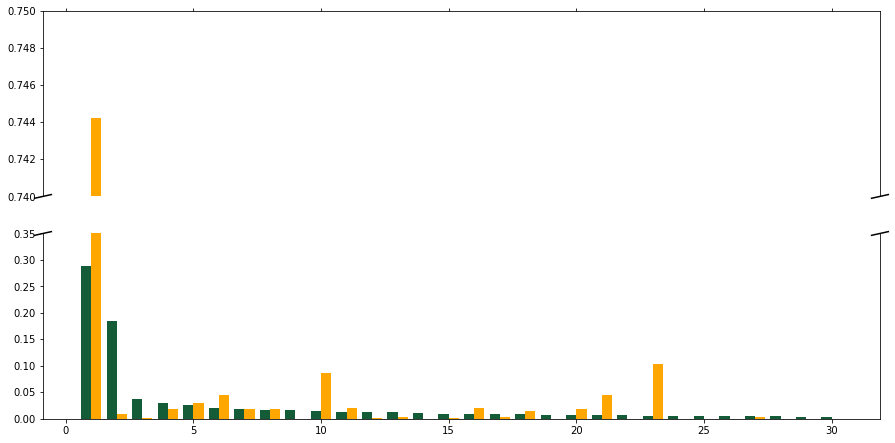

In [204]:
figure, (ax,ax2) = plt.subplots(2,1, sharex=True, figsize=(15, 7.5))

NP_heights_fraction = np_sc_merge['nMol_stereoID_x'].astype(int).head(30)/269226
ZINC_heights_fraction = np_sc_merge['nMol_stereoID_y'].astype(int).head(30)/8790153
bins = np.linspace(1,30,30)

# set x-axis here and adapt it if needed
x_axis = list(range(1,31))

ax.bar(bins-0.4/2,NP_heights_fraction,0.4,label='NPs',color='#145c37')
ax.bar(bins+0.4/2,ZINC_heights_fraction,0.4,label='SCs',color='#ffa600')
ax2.bar(bins-0.4/2,NP_heights_fraction,0.4,label='NPs',color='#145c37')
ax2.bar(bins+0.4/2,ZINC_heights_fraction,0.4,label='SCs',color='#ffa600')

# zoom-in / limit the view to different portions of the data
ax.set_ylim(0.74,0.75)
ax2.set_ylim(0,0.35)

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .01  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal


##not set properly
axes.tick_params(labelsize=12)
axes.set_ylabel('Percentage', fontsize=20)
axes.set_xticks(x_axis)
# axes.set_xlim(left=-1, right=30)  # set the limit of the x-axis here
axes.legend(fontsize=20)
#plt.savefig('/data/local/ringsys/202112_figures/his_compare_prevalance.png')
plt.show()